In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
cd ~/bmi_dynamics_code

/Users/preeyakhanna/bmi_dynamics_code


In [3]:
import ssm
from online_analysis import generate_models, generate_models_utils, util_fcns
import analysis_config

In [4]:
%matplotlib notebook

In [5]:
pdb

Automatic pdb calling has been turned ON


Xlims: -0.08, 0.16
Ylims: 0.02, 0.26
Bin Curson kin Size 20
199 (15, 7)


/Users/preeyakhanna/bmi_dynamics_code/online_analysis/generate_models_utils.py:394: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  tmp = np.array([np.zeros(( bin_spk[x].shape[0])) + ix + trl_off for ix, x in enumerate(ix_mod)])


new trial offset 199, total trls in this blk 199
Xlims: -0.08, 0.16
Ylims: 0.02, 0.26
Bin Curson kin Size 20
171 (46, 7)
Len Obs Targs [1 2 3 4 5 6 8 9]
REMOVING A TRIAL: Animal jeev, TargIx -1.0
REMOVING A TRIAL: Animal jeev, TargIx 1.0
REMOVING A TRIAL: Animal jeev, TargIx 1.0
REMOVING A TRIAL: Animal jeev, TargIx 1.0
REMOVING A TRIAL: Animal jeev, TargIx 1.0
REMOVING A TRIAL: Animal jeev, TargIx 1.0
REMOVING A TRIAL: Animal jeev, TargIx 1.0
REMOVING A TRIAL: Animal jeev, TargIx 1.0
REMOVING A TRIAL: Animal jeev, TargIx 1.0
REMOVING A TRIAL: Animal jeev, TargIx 1.0
REMOVING A TRIAL: Animal jeev, TargIx 1.0
REMOVING A TRIAL: Animal jeev, TargIx 1.0
new trial offset 358, total trls in this blk 159


/Users/preeyakhanna/conda/envs/mountainlab/lib/python3.6/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Animal jeev, tsk 0, N = 2859
Tsk 0, Trg 0.00, N = 307
Tsk 0, Trg 1.00, N = 339
Tsk 0, Trg 2.00, N = 445
Tsk 0, Trg 3.00, N = 429
Tsk 0, Trg 4.00, N = 337
Tsk 0, Trg 5.00, N = 294
Tsk 0, Trg 6.00, N = 342
Tsk 0, Trg 7.00, N = 366
Animal jeev, tsk 1, N = 5181
Tsk 1, Trg 2.10, N = 624
Tsk 1, Trg 3.00, N = 573
Tsk 1, Trg 4.00, N = 1103
Tsk 1, Trg 5.10, N = 607
Tsk 1, Trg 6.00, N = 164
Tsk 1, Trg 6.10, N = 830
Tsk 1, Trg 8.00, N = 587
Tsk 1, Trg 9.10, N = 693


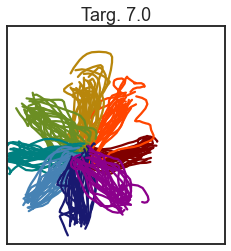

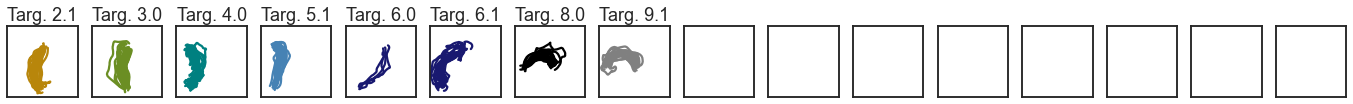

In [15]:
### By default returns standard binned spike counts
animal = 'jeev'; ndays=4; i_d =0; 

history_bins_max = 1; 
within_bin_shuffle = False; 
keep_bin_spk_zsc = False; 
null_pred = False 

### order
order_dict = analysis_config.data_params['%s_ordered_input_type'%animal]
order_dict = [order_dict[i] for i in range(ndays)]
order_d = order_dict[i_d]

input_type = analysis_config.data_params['%s_input_type'%animal]
input_type = [input_type[i] for i in range(ndays)]

### pull spike kinematics
data, data_temp, sub_spikes, sub_spk_temp_all, sub_push_all = generate_models_utils.get_spike_kinematics(animal, 
    input_type[i_d], order_d, history_bins_max, within_bin_shuffle = within_bin_shuffle, 
    keep_bin_spk_zsc = keep_bin_spk_zsc,
    day_ix = i_d, null = null_pred)


In [99]:
type(data)

dict

In [52]:
trls = []
trl_id = data_temp['trl'].to_numpy()

for t in range(300): 
    ix = np.nonzero(trl_id == t)[0]
    trls.append(sub_spikes[ix, :])
trls2 = [] 
for t in range(300, 358): 
    ix = np.nonzero(trl_id == t)[0]
    trls2.append(sub_spikes[ix, :])


In [53]:
D_obs = sub_spikes.shape[1]
num_states = 1; 
n_dim_latent_try = D_obs - 1; 

rslds_lem = ssm.SLDS(D_obs, num_states, n_dim_latent_try,
             transitions="recurrent_only",
             dynamics="gaussian",
             emissions="gaussian",
             single_subspace=True)

# Initialize the model with the observed data.  It is important
# to call this before constructing the variational posterior since
# the posterior constructor initialization looks at the rSLDS parameters.

rslds_lem.initialize(trls)


> /Users/preeyakhanna/ssm/ssm/emissions.py(206)_initialize_with_pca()
    204         self.ds = np.array(ds)
    205         import pdb; pdb.set_trace()
--> 206         return pca
    207 
    208 

ipdb> c
[[-4.40527767 -4.40527767 -4.40527767 -4.40527767 -4.40527767 -4.40527767
  -4.40527767 -4.40527767 -4.40527767 -4.40527767 -4.40527767 -4.40527767
  -4.40527767 -4.40527767 -4.40527767 -4.40527767 -4.40527767 -4.40527767
  -4.40527767 -4.40527767]]
inv etas


In [55]:
#rslds_lem.emissions.inv_etas

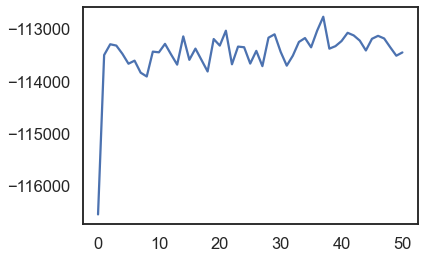

In [110]:
plt.plot(q_elbos_lem)

In [56]:
#############
# Train sLDS #
############# 
q_elbos_lem, q_lem = rslds_lem.fit(trls, method="laplace_em",
    variational_posterior="structured_meanfield",initialize=False, 
    num_iters=50, alpha=0.0)

  0%|          | 0/50 [00:00<?, ?it/s]

In [23]:
#################
# Test overall ##
#################
_, post_test = rslds_lem.approximate_posterior(trls2, num_iters=50, alpha=0.0)

  0%|          | 0/50 [00:00<?, ?it/s]

In [98]:
##################################
# Test point by point for trls2 ##
##################################
nTrls = len(trls2)
window_size=10

trls_2_pred_training = [];
trls_2_pred_true = []

## iterate through nTrls
for i in range(nTrls): 
    
    trl_i = trls2[i]
    
    ## for each timepoint 
    for t in range(window_size, trl_i.shape[0] - 1): 
        
        trl_i_train = trl_i[t - window_size:t, :]
        trls_2_pred_training.append(trl_i_train)
        trls_2_pred_true.append(trl_i[t+1, :])
        
_, post_test = rslds_lem.approximate_posterior(trls_2_pred_training, num_iters=100, alpha=0.0)

  0%|          | 0/100 [00:00<?, ?it/s]

In [107]:
_, post_test = rslds_lem.approximate_posterior(trls_2_pred_training, num_iters=10, alpha=0.0)

  0%|          | 0/10 [00:00<?, ?it/s]

KeyboardInterrupt: 

> /Users/preeyakhanna/conda/envs/mountainlab/lib/python3.6/site-packages/scipy/linalg/basic.py(350)solve_triangular()
    348         # transposed system is solved since trtrs expects Fortran ordering
    349         x, info = trtrs(a1.T, b1, overwrite_b=overwrite_b, lower=not lower,
--> 350                         trans=not trans, unitdiag=unit_diagonal)
    351 
    352     if info == 0:

ipdb> c


In [100]:
### Now go through and make predictions for each point @#####
xhat_test = post_test.mean_continuous_states

y_pred = []; 
tm = -1; 
for i in range(nTrls): 
    for t in range(window_size, trls2[i].shape[0] - 1): 
        tm += 1; 
        
        # Get out this point
        xh_i = xhat_test[tm]
        
        # Convert to y: 
        y_pred.append(pred_fwd(rslds_lem, xh_i))
        


In [101]:
### Compare y_pred vs. trls_2_pred_true
assert(len(y_pred) == len(trls_2_pred_true))

y_pred = np.vstack((y_pred))
trls_2_pred_true = np.vstack((trls_2_pred_true))

In [102]:
y_pred.shape

(1271, 20)

In [103]:
trls_2_pred_true.shape

(1271, 20)

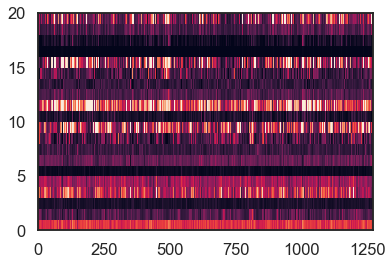

In [104]:
plt.pcolormesh(y_pred.T, vmin=0, vmax=2.)

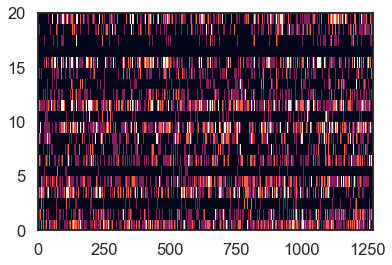

In [105]:
plt.pcolormesh(trls_2_pred_true.T, vmin=0., vmax=3.)

In [106]:
calc_r2(trls_2_pred_true, y_pred)

0.039949494558085386

In [82]:
def pred_fwd(rslds, x_train):
    ### Predict forward:
    Pt = rslds.transitions.log_transition_matrices(x_train, np.zeros((x_train.shape[0], 0)), 
                                                       None, None)
    ## Get z_t
    z_t = np.argmax(Pt[-1, 0, :])

    ## x_{t-1}
    x_tm1 = x_train[-1, :]

    # A_{z_t}
    A = rslds.dynamics.As[z_t, :, :]
    b = rslds.dynamics.bs[z_t, :]
    xhat_pred = np.dot(A, x_tm1) + b

    C = rslds.emissions.Cs[0, :, :]
    d = rslds.emissions.ds[0, :]
    yhat_pred = np.dot(C, xhat_pred) + d
    return yhat_pred


In [75]:
#len(trls_2_pred_training)
len(trls_2_pred_true)

1271

In [5]:
trls2[1].shape

NameError: name 'trls2' is not defined

In [ ]:
#################
# Test trials  ##
#################
y_est = []; window = 10; num_iters = 5; 

Cs = rslds_lem.emissions.Cs; 
ds = rslds_lem.emissions.ds; 

for trl in trls2:
    y_est_i = []
    nT, _ = trl.shape
    for T in range(window, nT): 
        _, post_test = rslds_lem.approximate_posterior([trls[T-window:T, :]], 
                                                       num_iters=num_iters, alpha=0.0)
        x_test = post_test.mean_continuous_states[0]
        y_test = np.dot(Cs[0, :, :], x_test.T).T + ds[0, :][np.newaxis, :])
        
        
        y_est_i.append()

In [58]:
trls2[1].shape

(47, 20)

In [33]:
tmp = post_test.discrete_expectations
Cs = rslds_lem.emissions.Cs; 
ds = rslds_lem.emissions.ds; 

y_est = []
for i_t, t in enumerate(tmp): 
    Ez, Ezzp1, _ = t

    x_test = post_test.mean_continuous_states[i_t]
    y_est.append(np.dot(Cs[0, :, :], x_test.T).T + ds[0, :][np.newaxis, :])


In [40]:
y_est_stack = np.vstack((y_est))
trls2_stack = np.vstack((trls2))

In [12]:
# ### Get a test of the number of states to fit; 
# generate_models.sweep_dim_all(model_set_number = 13, history_bins_max = 1, within_bin_shuffle = False,
#     n_folds = 5, highDsweep = False)

In [43]:
calc_r2(trls2_stack, y_est_stack)

0.9544508810873462

In [42]:
def calc_r2(true, pred): 
    ### Assume Y-true, y_pred are T x N matrices: 
    SSR_i = np.sum(np.square(np.vstack(true) - np.vstack(pred)), axis=0)
    SST_i = np.sum(np.square(np.vstack(true) - np.mean(np.vstack((true)), axis=0)[np.newaxis, :]), axis=0)

    return 1 - np.sum(SSR_i)/np.sum(SST_i)

In [44]:
trls2_stack

array([[0., 0., 0., ..., 2., 0., 1.],
       [1., 0., 0., ..., 0., 1., 1.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [2., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 2., 1.],
       [2., 0., 1., ..., 0., 1., 1.]])

In [45]:
calc_r2(trls2_stack, y_est_stack)

array([[-0.01241151,  0.01906055,  0.67014879, ...,  0.34344103,
         0.00861787,  0.98387651],
       [ 0.89456565,  0.13930179,  0.52330316, ...,  0.09004107,
         1.02389642,  1.01581432],
       [ 0.98084875,  0.1284065 ,  0.44687708, ...,  0.33345403,
         1.07408177,  0.04791858],
       ...,
       [ 2.00989573,  0.15720088,  0.08659719, ...,  0.22028378,
         0.00298101,  0.96877399],
       [ 0.98932137, -0.0155978 ,  0.08625106, ...,  0.30965159,
         1.87639314,  1.0126863 ],
       [ 1.96125495,  0.00207803,  0.19464783, ...,  0.03268979,
         0.99073724,  1.01831564]])

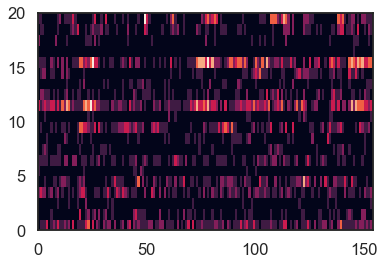

In [47]:
plt.pcolormesh(trls2_stack.T)

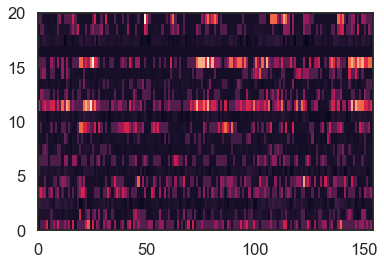

In [48]:
plt.pcolormesh(y_est_stack.T)

Xlims: -0.08, 0.16
Ylims: 0.02, 0.26
Bin Curson kin Size 20
199 (15, 7)


/Users/preeyakhanna/bmi_dynamics_code/online_analysis/generate_models_utils.py:400: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  tmp = np.array([np.zeros(( bin_spk[x].shape[0])) + ix + trl_off for ix, x in enumerate(ix_mod)])


new trial offset 199, total trls in this blk 199
Xlims: -0.08, 0.16
Ylims: 0.02, 0.26
Bin Curson kin Size 20
171 (46, 7)
Len Obs Targs [1 2 3 4 5 6 8 9]
REMOVING A TRIAL: Animal jeev, TargIx -1.0
REMOVING A TRIAL: Animal jeev, TargIx 1.0
REMOVING A TRIAL: Animal jeev, TargIx 1.0
REMOVING A TRIAL: Animal jeev, TargIx 1.0
REMOVING A TRIAL: Animal jeev, TargIx 1.0
REMOVING A TRIAL: Animal jeev, TargIx 1.0
REMOVING A TRIAL: Animal jeev, TargIx 1.0
REMOVING A TRIAL: Animal jeev, TargIx 1.0
REMOVING A TRIAL: Animal jeev, TargIx 1.0
REMOVING A TRIAL: Animal jeev, TargIx 1.0
REMOVING A TRIAL: Animal jeev, TargIx 1.0
REMOVING A TRIAL: Animal jeev, TargIx 1.0
new trial offset 358, total trls in this blk 159


/Users/preeyakhanna/conda/envs/mountainlab/lib/python3.6/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
/Users/preeyakhanna/bmi_dynamics_code/online_analysis/generate_models_utils.py:776: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fco, axco = plt.subplots()


<IPython.core.display.Javascript object>


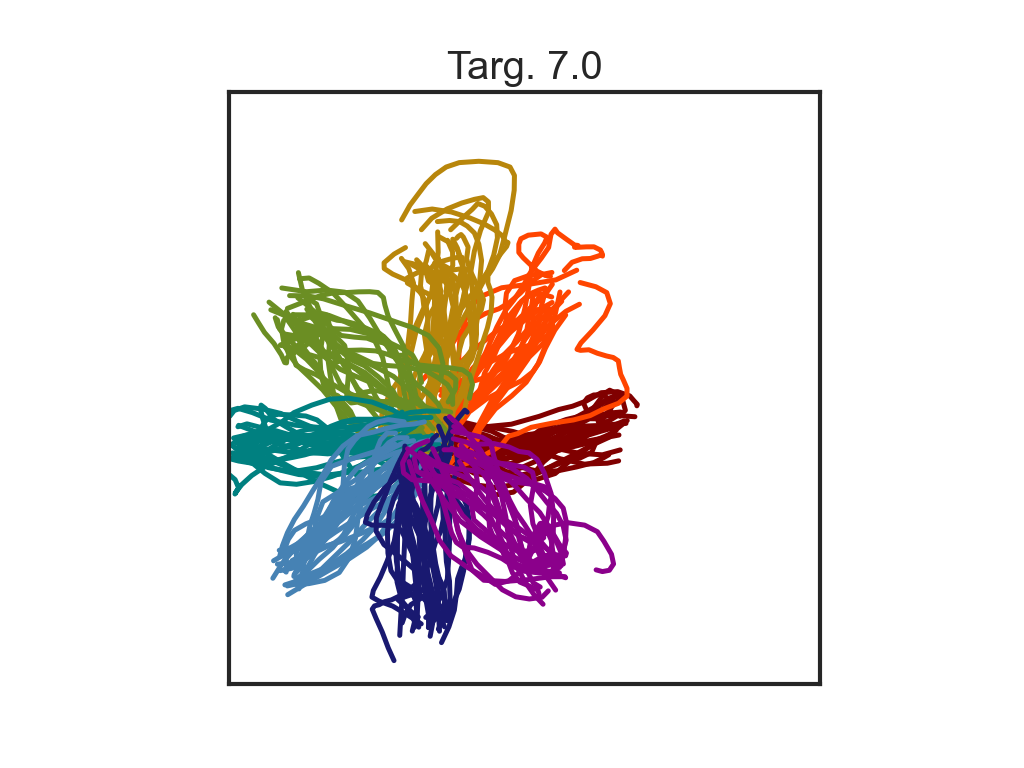

<IPython.core.display.Javascript object>


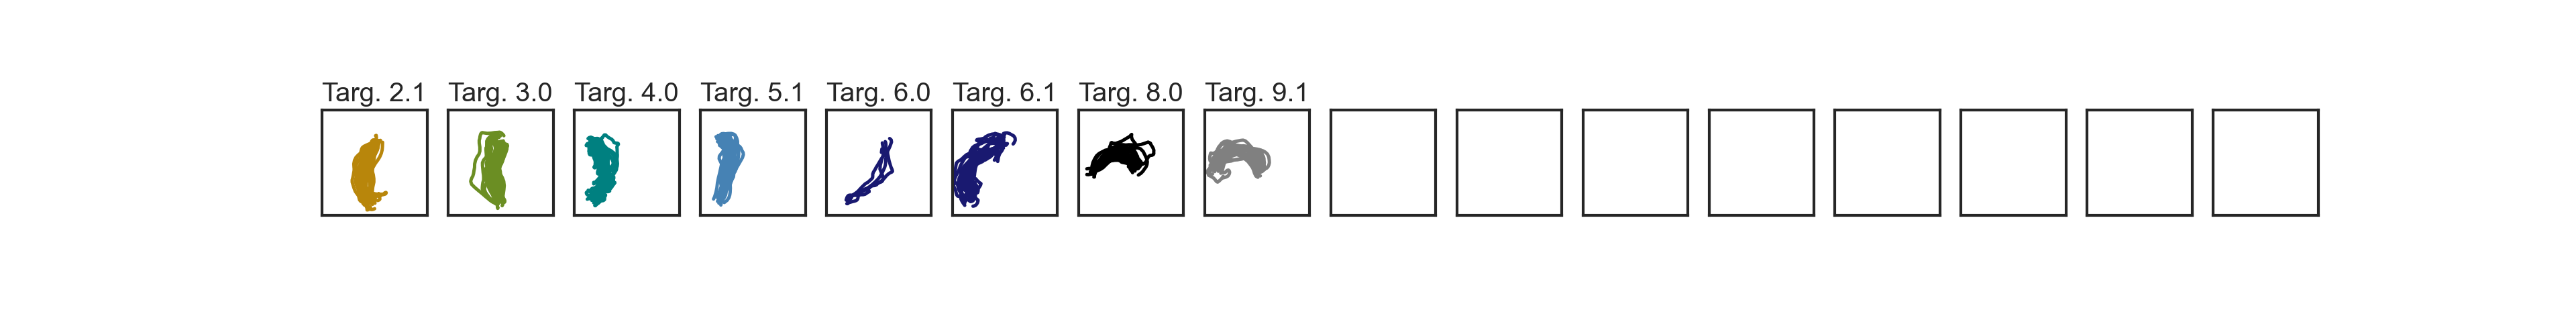

Animal jeev, tsk 0, N = 2859
Tsk 0, Trg 0.00, N = 307
Tsk 0, Trg 1.00, N = 339
Tsk 0, Trg 2.00, N = 445
Tsk 0, Trg 3.00, N = 429
Tsk 0, Trg 4.00, N = 337
Tsk 0, Trg 5.00, N = 294
Tsk 0, Trg 6.00, N = 342
Tsk 0, Trg 7.00, N = 366
Animal jeev, tsk 1, N = 5181
Tsk 1, Trg 2.10, N = 624
Tsk 1, Trg 3.00, N = 573
Tsk 1, Trg 4.00, N = 1103
Tsk 1, Trg 5.10, N = 607
Tsk 1, Trg 6.00, N = 164
Tsk 1, Trg 6.10, N = 830
Tsk 1, Trg 8.00, N = 587
Tsk 1, Trg 9.10, N = 693
n spks in data 20
n spks in trls_train 20
training model ver 1


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

n spks in trls_train 20
training model ver 1


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

n spks in trls_train 20
training model ver 1


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

n spks in trls_train 20
training model ver 1


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

n spks in trls_train 20
training model ver 1


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Xlims: -0.05, 0.13
Ylims: 0.05, 0.23
Bin Curson kin Size 20
16 (38, 7)
new trial offset 16, total trls in this blk 16


/Users/preeyakhanna/bmi_dynamics_code/online_analysis/generate_models_utils.py:400: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  tmp = np.array([np.zeros(( bin_spk[x].shape[0])) + ix + trl_off for ix, x in enumerate(ix_mod)])


Xlims: -0.08, 0.16
Ylims: 0.02, 0.26
Bin Curson kin Size 20
152 (39, 7)
Len Obs Targs [1 2 3 4 5 6 8 9]
REMOVING A TRIAL: Animal jeev, TargIx 1.0
REMOVING A TRIAL: Animal jeev, TargIx 1.0
REMOVING A TRIAL: Animal jeev, TargIx 1.0
REMOVING A TRIAL: Animal jeev, TargIx 1.0
REMOVING A TRIAL: Animal jeev, TargIx 1.0
REMOVING A TRIAL: Animal jeev, TargIx 1.0
REMOVING A TRIAL: Animal jeev, TargIx 1.0
REMOVING A TRIAL: Animal jeev, TargIx 1.0
REMOVING A TRIAL: Animal jeev, TargIx 1.0
REMOVING A TRIAL: Animal jeev, TargIx 1.0
new trial offset 158, total trls in this blk 142


/Users/preeyakhanna/conda/envs/mountainlab/lib/python3.6/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


<IPython.core.display.Javascript object>


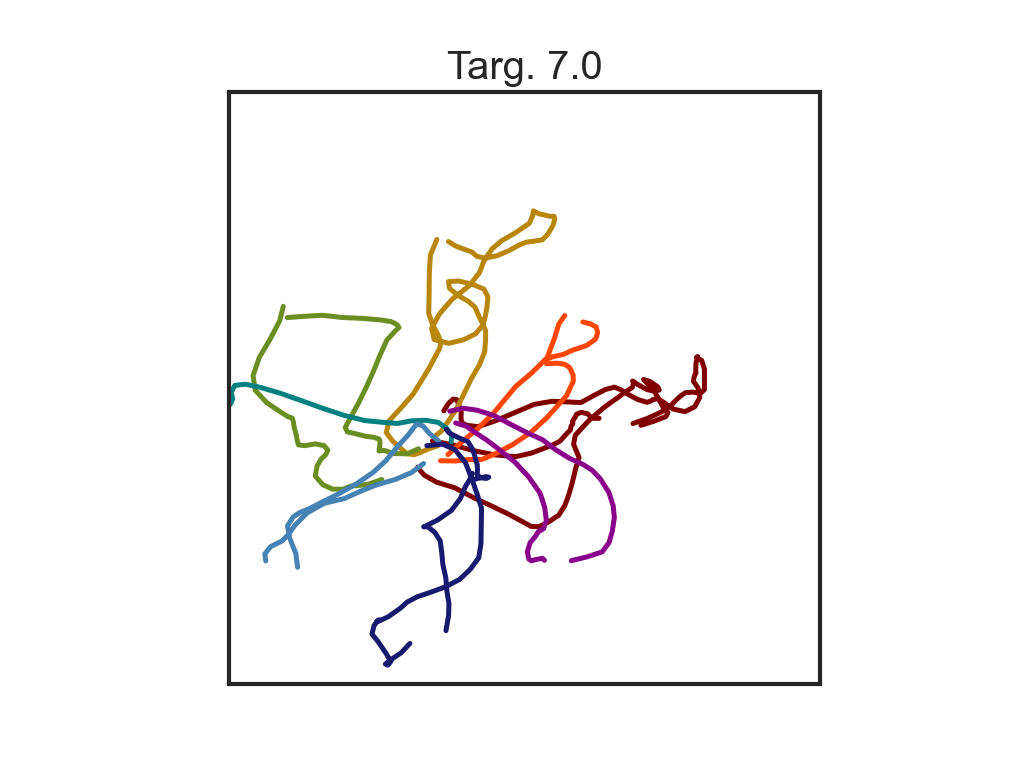

<IPython.core.display.Javascript object>


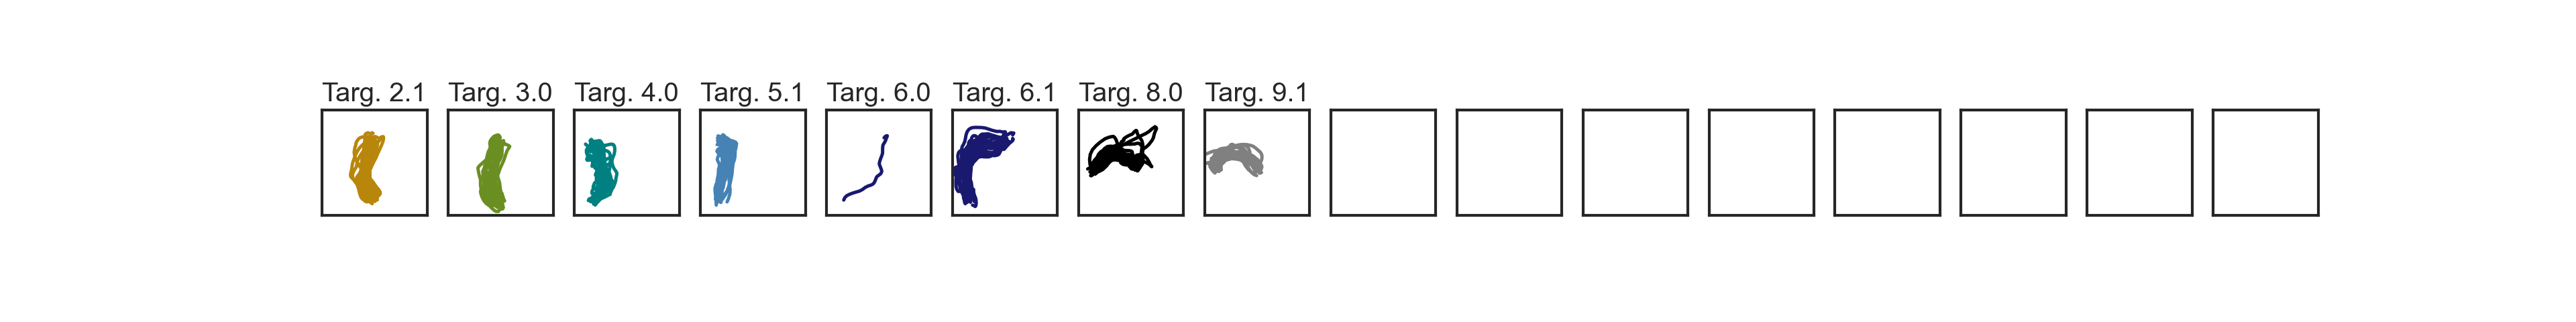

Animal jeev, tsk 0, N = 460
Tsk 0, Trg 0.00, N = 118
Tsk 0, Trg 1.00, N = 39
Tsk 0, Trg 2.00, N = 81
Tsk 0, Trg 3.00, N = 61
Tsk 0, Trg 4.00, N = 20
Tsk 0, Trg 5.00, N = 33
Tsk 0, Trg 6.00, N = 68
Tsk 0, Trg 7.00, N = 40
Animal jeev, tsk 1, N = 4334
Tsk 1, Trg 2.10, N = 550
Tsk 1, Trg 3.00, N = 490
Tsk 1, Trg 4.00, N = 777
Tsk 1, Trg 5.10, N = 490
Tsk 1, Trg 6.00, N = 38
Tsk 1, Trg 6.10, N = 793
Tsk 1, Trg 8.00, N = 616
Tsk 1, Trg 9.10, N = 580
n spks in data 20
n spks in trls_train 20
training model ver 1


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

n spks in trls_train 20
training model ver 1


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

n spks in trls_train 20
training model ver 1


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

n spks in trls_train 20
training model ver 1


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

n spks in trls_train 20
training model ver 1


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

(64,) (64,) (18, 44) 6 (18,)
[0. 1. 2. 3. 4. 5. 6. 7.]
(64,) (64,) (18, 44) 6 (18,)
[0. 1. 2. 3. 4. 5. 6. 7.]
(64,) (64,) (18, 44) 6 (18,)
[0. 1. 2. 3. 4. 5. 6. 7.]
new trial offset 64, total trls in this blk 64


/Users/preeyakhanna/bmi_dynamics_code/online_analysis/generate_models_utils.py:400: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  tmp = np.array([np.zeros(( bin_spk[x].shape[0])) + ix + trl_off for ix, x in enumerate(ix_mod)])


(101,) (101,) (40, 44) 6 (40,)
[0. 1. 2. 3. 4. 5. 6. 7.]
(101,) (101,) (40, 44) 6 (40,)
[0. 1. 2. 3. 4. 5. 6. 7.]
(101,) (101,) (40, 44) 6 (40,)
[0. 1. 2. 3. 4. 5. 6. 7.]
new trial offset 165, total trls in this blk 101
(122,) (122,) (97, 44) 6 (97,)
[0. 1. 2. 3. 4. 5. 6. 7.]
(122,) (122,) (97, 44) 6 (97,)
[0. 1. 2. 3. 4. 5. 6. 7.]
(122,) (122,) (97, 44) 6 (97,)
[0. 1. 2. 3. 4. 5. 6. 7.]
new trial offset 287, total trls in this blk 122


/Users/preeyakhanna/conda/envs/mountainlab/lib/python3.6/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


<IPython.core.display.Javascript object>


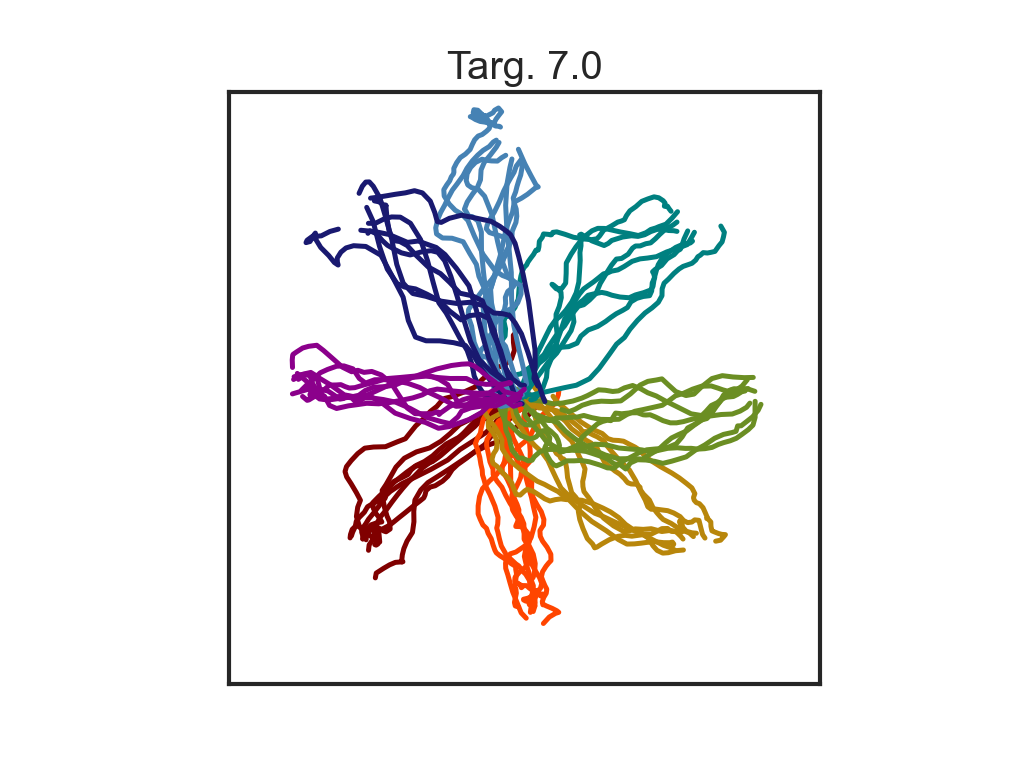

<IPython.core.display.Javascript object>


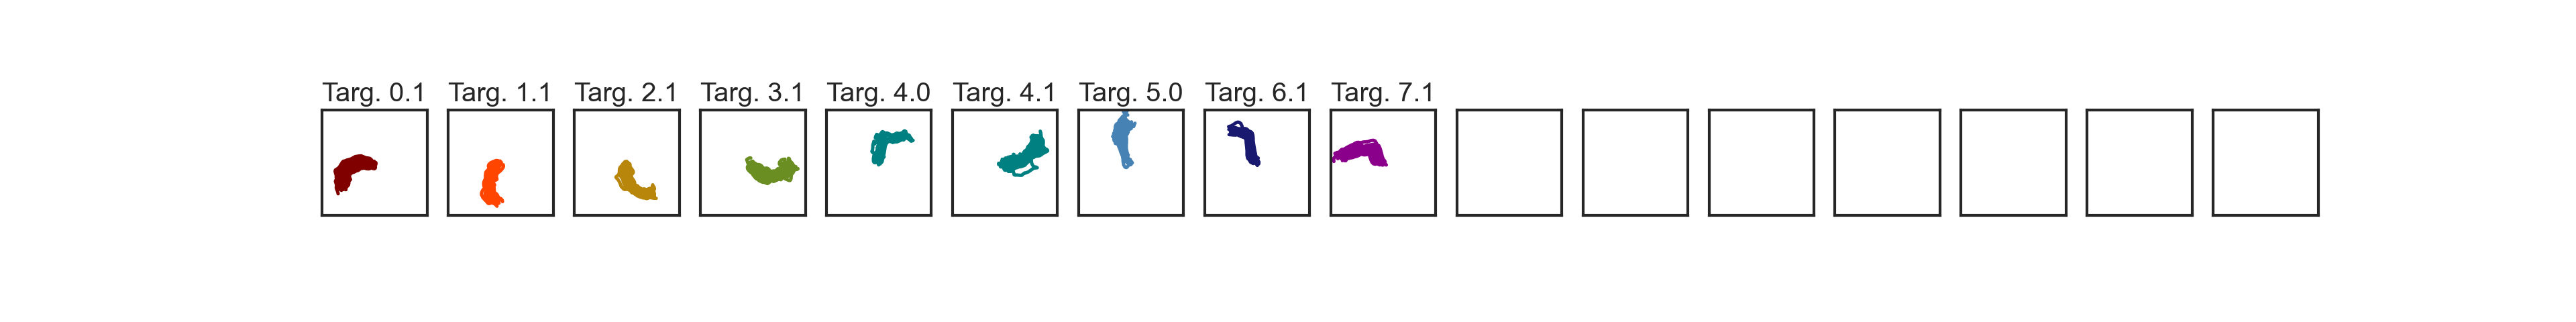

Animal grom, tsk 0, N = 2229
Tsk 0, Trg 0.00, N = 258
Tsk 0, Trg 1.00, N = 337
Tsk 0, Trg 2.00, N = 319
Tsk 0, Trg 3.00, N = 321
Tsk 0, Trg 4.00, N = 308
Tsk 0, Trg 5.00, N = 271
Tsk 0, Trg 6.00, N = 189
Tsk 0, Trg 7.00, N = 226
Animal grom, tsk 1, N = 9168
Tsk 1, Trg 0.10, N = 1028
Tsk 1, Trg 1.10, N = 1067
Tsk 1, Trg 2.10, N = 1241
Tsk 1, Trg 3.10, N = 1471
Tsk 1, Trg 4.00, N = 550
Tsk 1, Trg 4.10, N = 1286
Tsk 1, Trg 5.00, N = 992
Tsk 1, Trg 6.10, N = 699
Tsk 1, Trg 7.10, N = 834
n spks in data 44
n spks in trls_train 44
training model ver 1


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

n spks in trls_train 44
training model ver 1


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

n spks in trls_train 44
training model ver 1


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

n spks in trls_train 44
training model ver 1


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

n spks in trls_train 44
training model ver 1


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

(64,) (64,) (51, 35) 6 (51,)
[0. 1. 2. 3. 4. 5. 6. 7.]
(64,) (64,) (51, 35) 6 (51,)
[0. 1. 2. 3. 4. 5. 6. 7.]
(64,) (64,) (51, 35) 6 (51,)
[0. 1. 2. 3. 4. 5. 6. 7.]
new trial offset 64, total trls in this blk 64


/Users/preeyakhanna/bmi_dynamics_code/online_analysis/generate_models_utils.py:400: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  tmp = np.array([np.zeros(( bin_spk[x].shape[0])) + ix + trl_off for ix, x in enumerate(ix_mod)])


(129,) (129,) (21, 35) 6 (21,)
[0. 1. 2. 3. 4. 5. 6. 7.]
(129,) (129,) (21, 35) 6 (21,)
[0. 1. 2. 3. 4. 5. 6. 7.]
(129,) (129,) (21, 35) 6 (21,)
[0. 1. 2. 3. 4. 5. 6. 7.]
new trial offset 193, total trls in this blk 129


/Users/preeyakhanna/conda/envs/mountainlab/lib/python3.6/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


<IPython.core.display.Javascript object>


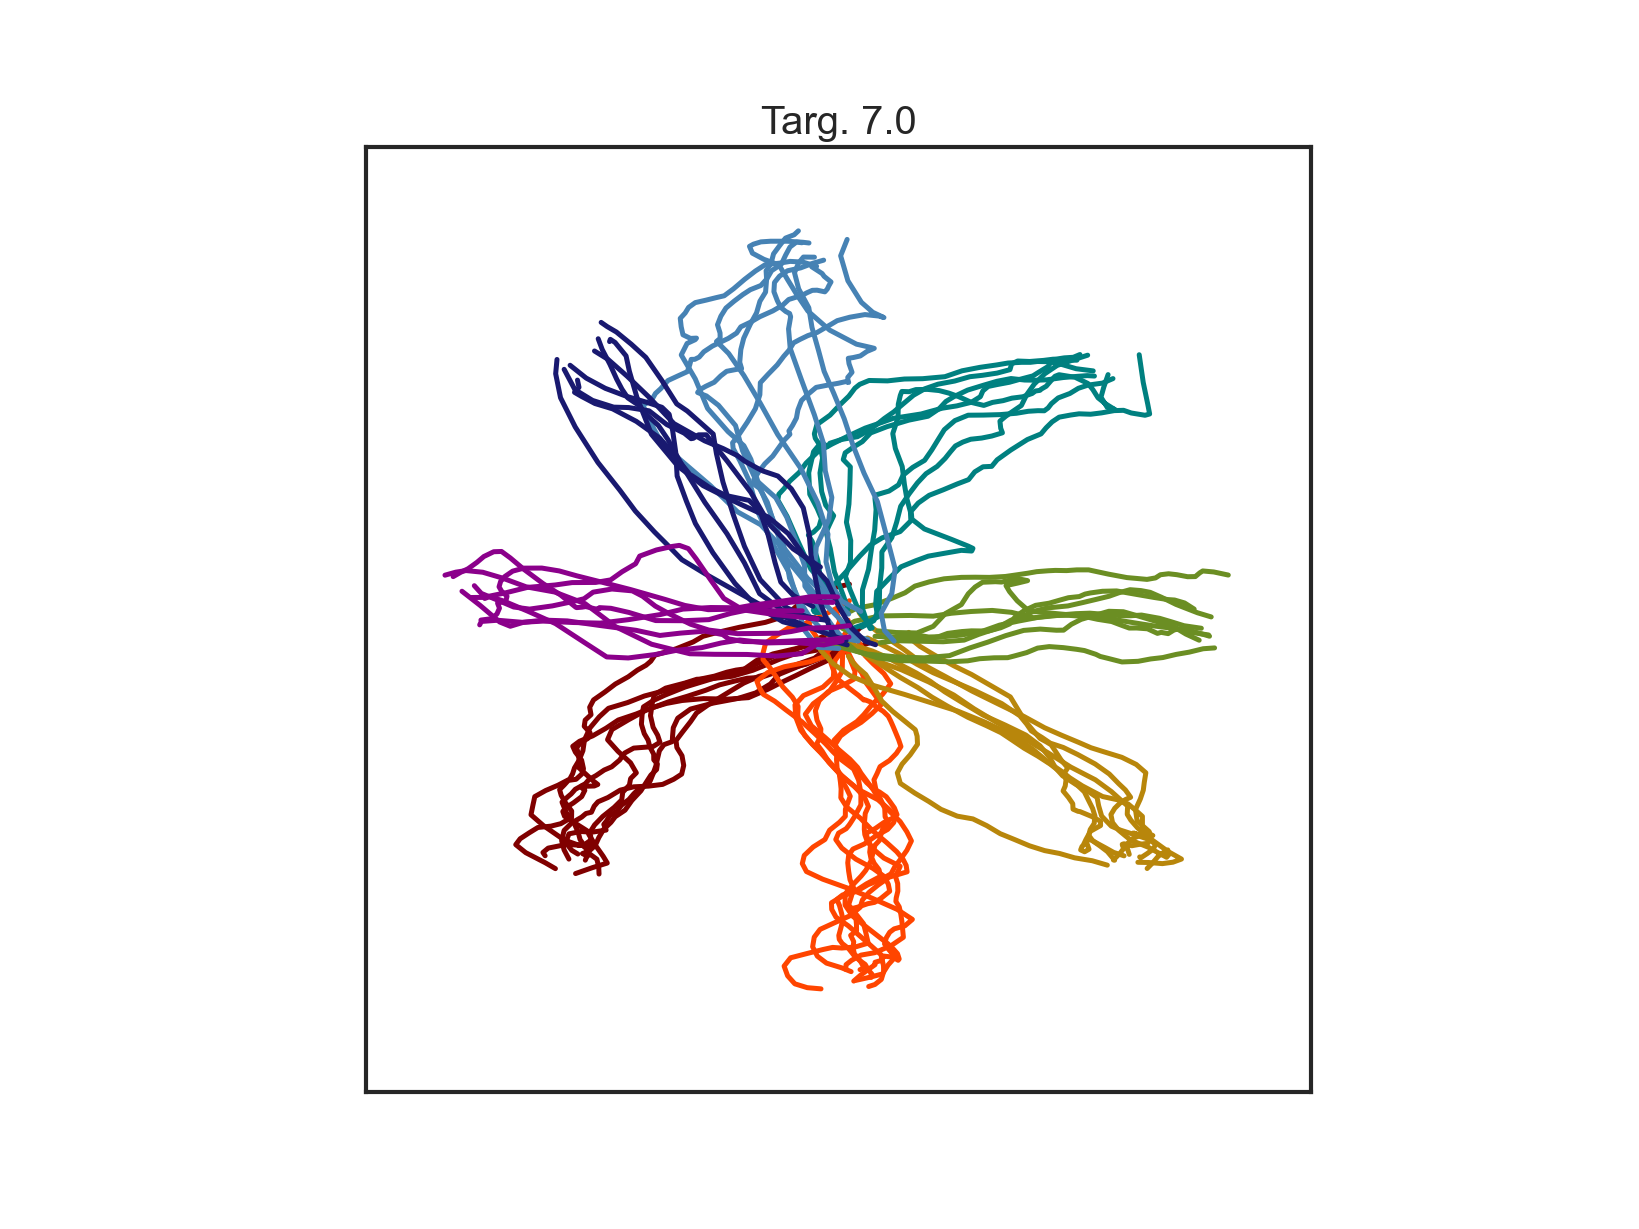

<IPython.core.display.Javascript object>


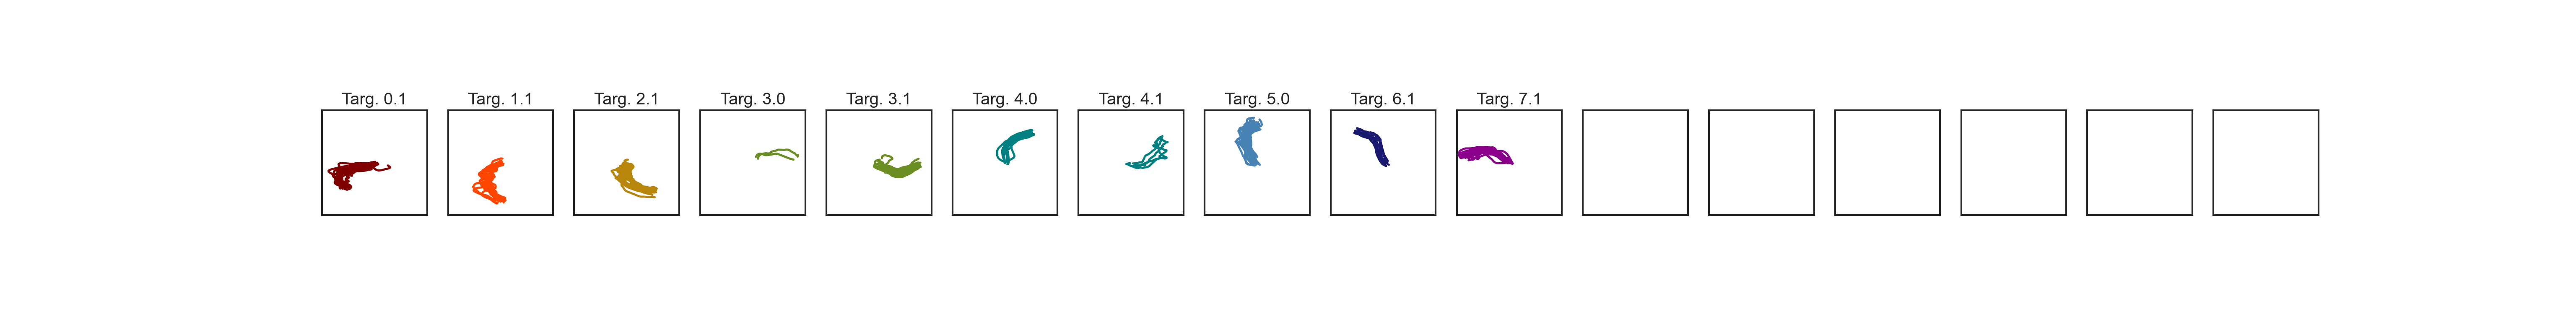

Animal grom, tsk 0, N = 2105
Tsk 0, Trg 0.00, N = 316
Tsk 0, Trg 1.00, N = 401
Tsk 0, Trg 2.00, N = 267
Tsk 0, Trg 3.00, N = 216
Tsk 0, Trg 4.00, N = 310
Tsk 0, Trg 5.00, N = 280
Tsk 0, Trg 6.00, N = 145
Tsk 0, Trg 7.00, N = 170
Animal grom, tsk 1, N = 4761
Tsk 1, Trg 0.10, N = 730
Tsk 1, Trg 1.10, N = 884
Tsk 1, Trg 2.10, N = 777
Tsk 1, Trg 3.00, N = 61
Tsk 1, Trg 3.10, N = 519
Tsk 1, Trg 4.00, N = 303
Tsk 1, Trg 4.10, N = 210
Tsk 1, Trg 5.00, N = 443
Tsk 1, Trg 6.10, N = 261
Tsk 1, Trg 7.10, N = 573
n spks in data 35
n spks in trls_train 35
training model ver 1


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

n spks in trls_train 35
training model ver 1


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

n spks in trls_train 35
training model ver 1


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

n spks in trls_train 35
training model ver 1


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

n spks in trls_train 35
training model ver 1


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [251]:
for animal in ['jeev', 'grom']: 
    for i_d in range(2): 
        generate_models.sweep_slds_params(animal, i_d, mean_sub=True)

In [7]:
### Load and plot sweep3; 
dat = pickle.load(open('slds_sweep3_jeev_0.pkl', 'rb'))

In [8]:
dat.keys()

dict_keys(['save_params_post', 'save_params_model'])

In [12]:
dat['save_params_model']

{(0,
  1,
  20,
  0.1,
  'elbo'): array([-102151.5656452 ,  -74162.71635746,  -74161.28293289,
         -74255.35915992,  -74310.95451435,  -73890.35131031,
         -74127.4817638 ,  -73832.35268248,  -73913.2917507 ,
         -74077.3262241 ,  -73988.25923186,  -74089.76641361,
         -73881.38591963,  -74329.74316348,  -74258.61564269,
         -74000.51865722,  -74288.49654438,  -73826.48342539,
         -74100.61034913,  -73925.28157135,  -74172.04723797]),
 (0,
  2,
  20,
  0.1,
  'elbo'): array([-9.65164540e+09, -7.38537665e+04, -7.43827715e+04, -7.41547009e+04,
        -7.41854557e+04, -7.40481436e+04, -7.39288923e+04, -7.45073788e+04,
        -7.43406949e+04, -7.42407385e+04, -7.45975021e+04, -7.42694678e+04,
        -7.37189915e+04, -7.39952672e+04, -7.44213788e+04, -7.43269798e+04,
        -7.38938711e+04, -7.40118984e+04, -7.44162789e+04, -7.41923315e+04,
        -7.38272496e+04]),
 (1,
  1,
  20,
  0.1,
  'elbo'): array([-76440.11721664, -73464.18121128, -73412.25196263,

<IPython.core.display.Javascript object>


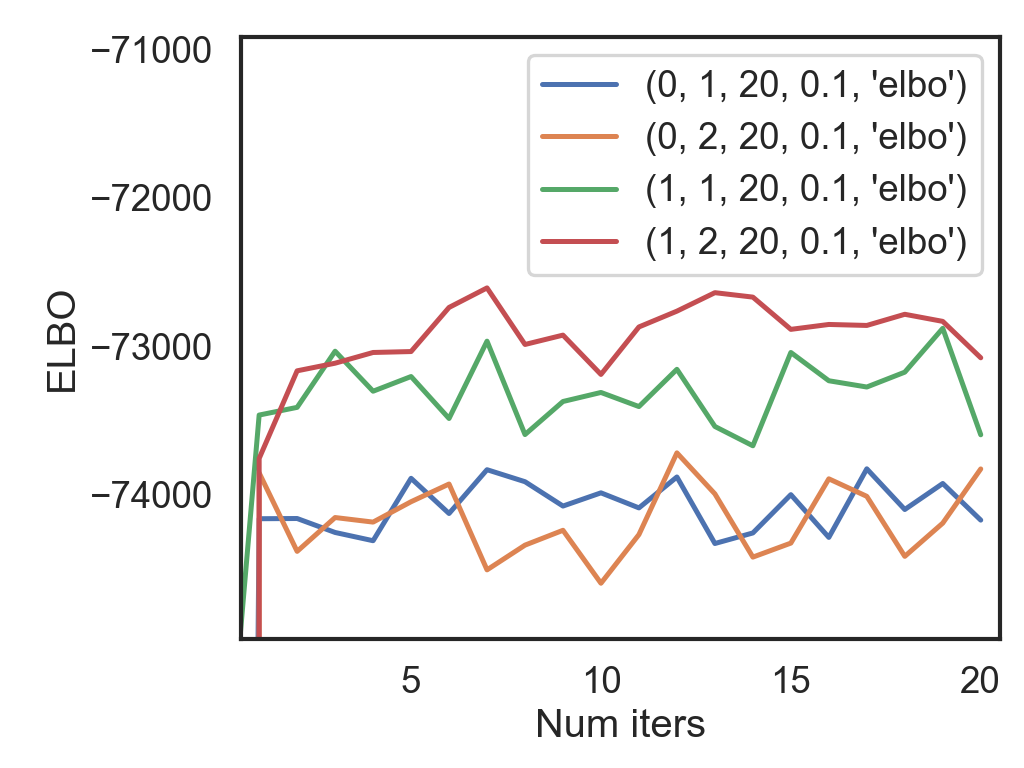

In [37]:
f, ax = plt.subplots()
for i, (k, v) in enumerate(dat['save_params_model'].items()): 
    ax.plot(v, '-', label=str(k))
ax.set_ylim([-100000, -60000])
ax.set_ylabel('ELBO')
ax.set_xlabel('Num iters')
plt.legend()
plt.tight_layout()
# i_fold, k, nit, alph,

<IPython.core.display.Javascript object>


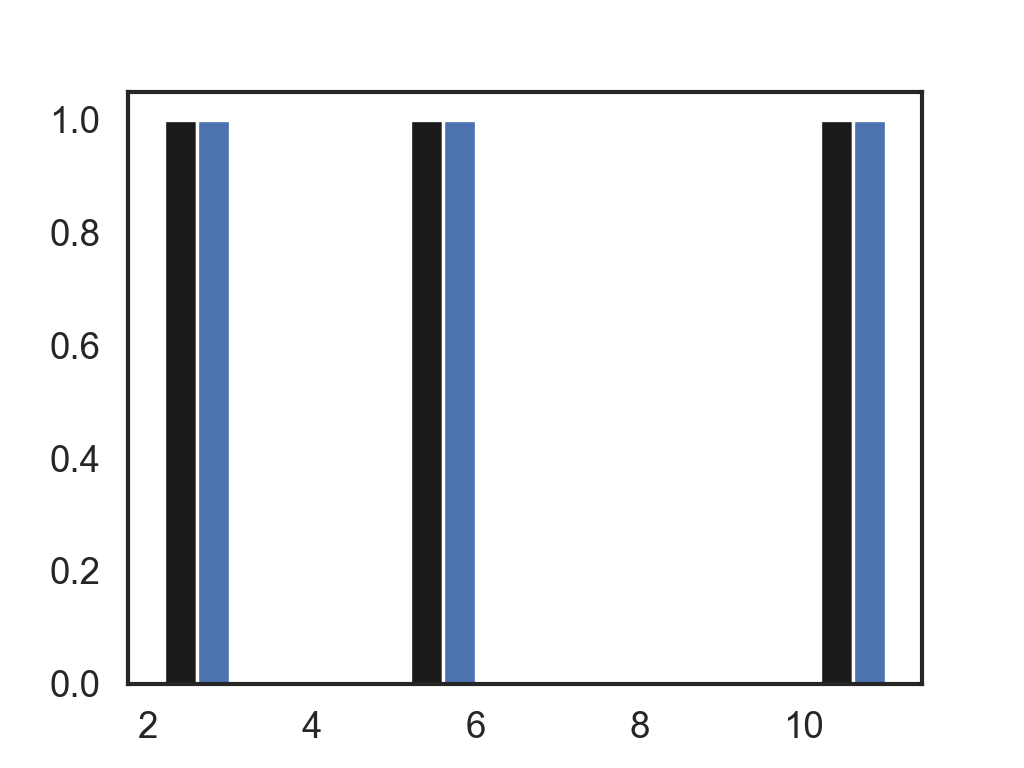

<IPython.core.display.Javascript object>


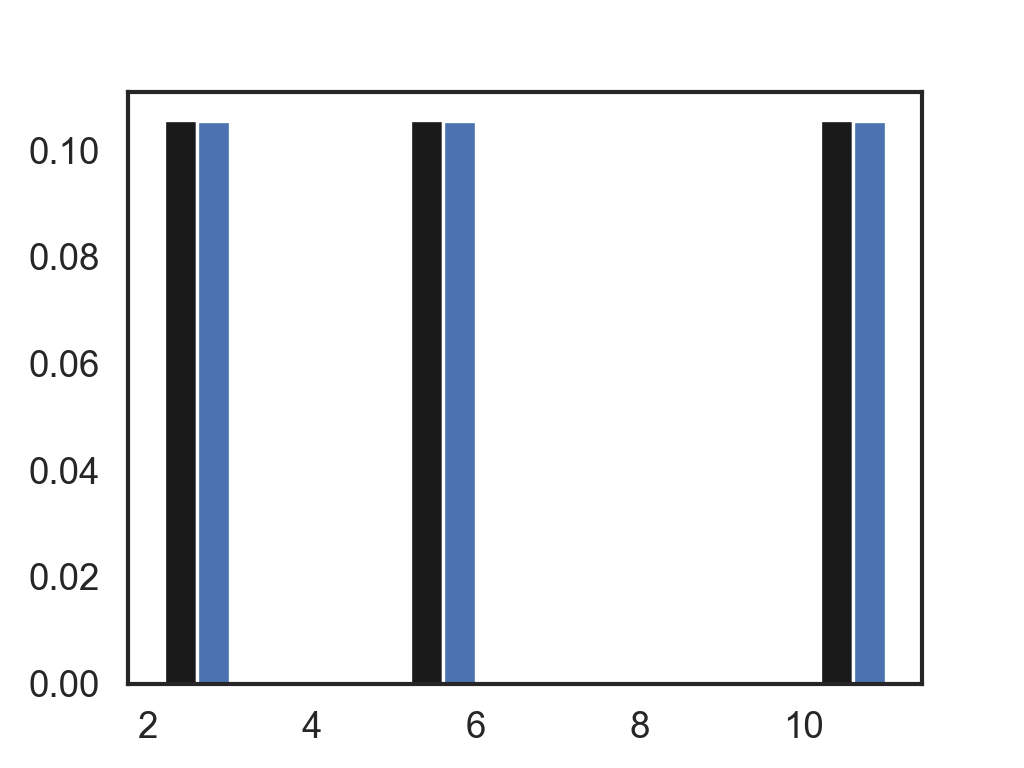

(0, 1, 20, 2, 5, 'r2_pred') 0.10465691836274293
(0, 1, 20, 5, 5, 'r2_pred') 0.10465691468482552
(0, 1, 20, 10, 5, 'r2_pred') 0.10465691468415961
(0, 2, 20, 2, 5, 'r2_pred') 0.10477134062657256
(0, 2, 20, 5, 5, 'r2_pred') 0.10477130342074348
(0, 2, 20, 10, 5, 'r2_pred') 0.10477130316425076
(1, 1, 20, 2, 5, 'r2_pred') 0.10560551486982483
(1, 1, 20, 5, 5, 'r2_pred') 0.105607532886553
(1, 1, 20, 10, 5, 'r2_pred') 0.10560753288156455
(1, 2, 20, 2, 5, 'r2_pred') 0.10547802200906431
(1, 2, 20, 5, 5, 'r2_pred') 0.10547963773323188
(1, 2, 20, 10, 5, 'r2_pred') 0.10547963773036695


In [40]:
f1, ax1 = plt.subplots()
f2, ax2 = plt.subplots()
# i_fold, k, nit, alph, ws, nit_post,

for i, (k, v) in enumerate(dat['save_params_post'].items()): 
    
    if len(k) > 6: 
        ax = ax1; 
        fld, K, _, _, ws, _, _ = k
    else: 
        ax = ax2;
        fld, K, _, ws, _, _ = k
    if K == 1: 
        col = 'k'
    else: 
        col = 'b'
        
    ax.bar(ws + 0.4*K, v, width=.4, color=col)
    if len(k) == 6: 
        print(k, v)

In [26]:
dat['save_params_post'].keys()

dict_keys([(0, 1, 20, 2, 5, 'r2_pred'), (0, 1, 20, 0.1, 2, 5, 'r2_smooth'), (0, 1, 20, 5, 5, 'r2_pred'), (0, 1, 20, 0.1, 5, 5, 'r2_smooth'), (0, 1, 20, 10, 5, 'r2_pred'), (0, 1, 20, 0.1, 10, 5, 'r2_smooth'), (0, 2, 20, 2, 5, 'r2_pred'), (0, 2, 20, 0.1, 2, 5, 'r2_smooth'), (0, 2, 20, 5, 5, 'r2_pred'), (0, 2, 20, 0.1, 5, 5, 'r2_smooth'), (0, 2, 20, 10, 5, 'r2_pred'), (0, 2, 20, 0.1, 10, 5, 'r2_smooth'), (1, 1, 20, 2, 5, 'r2_pred'), (1, 1, 20, 0.1, 2, 5, 'r2_smooth'), (1, 1, 20, 5, 5, 'r2_pred'), (1, 1, 20, 0.1, 5, 5, 'r2_smooth'), (1, 1, 20, 10, 5, 'r2_pred'), (1, 1, 20, 0.1, 10, 5, 'r2_smooth'), (1, 2, 20, 2, 5, 'r2_pred'), (1, 2, 20, 0.1, 2, 5, 'r2_smooth'), (1, 2, 20, 5, 5, 'r2_pred'), (1, 2, 20, 0.1, 5, 5, 'r2_smooth'), (1, 2, 20, 10, 5, 'r2_pred'), (1, 2, 20, 0.1, 10, 5, 'r2_smooth')])

In [42]:
dat = pickle.load(open('slds_sweep4_jeev_0.pkl', 'rb'))

<IPython.core.display.Javascript object>


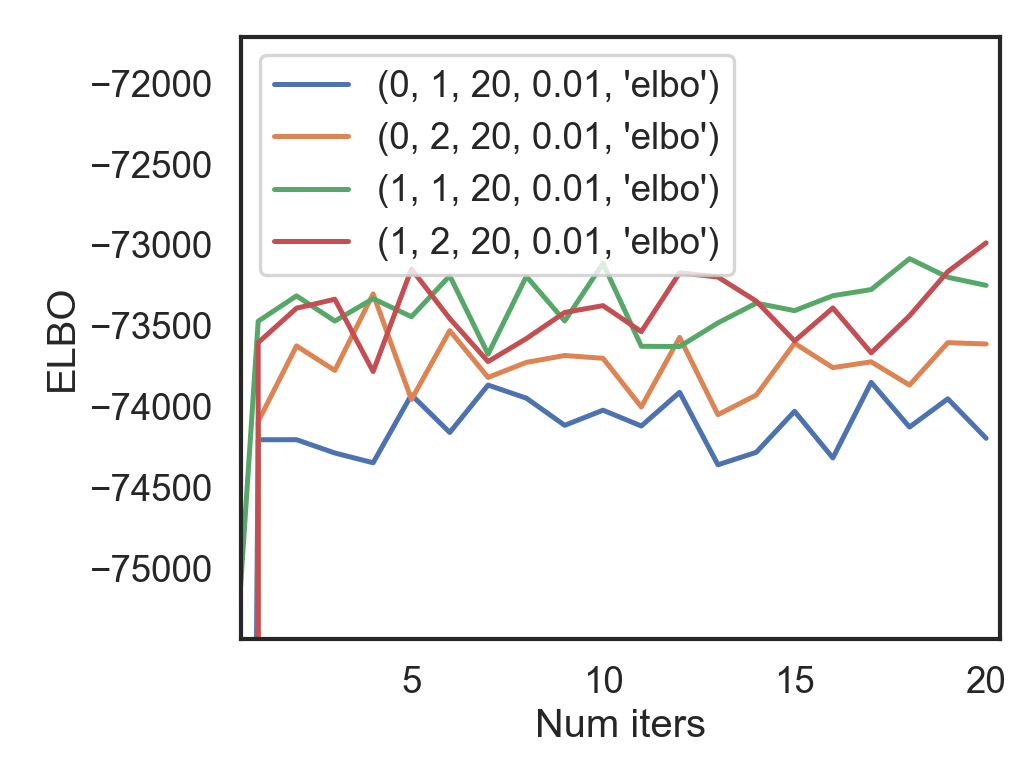

In [43]:
f, ax = plt.subplots()
for i, (k, v) in enumerate(dat['save_params_model'].items()): 
    ax.plot(v, '-', label=str(k))
ax.set_ylim([-100000, -60000])
ax.set_ylabel('ELBO')
ax.set_xlabel('Num iters')
plt.legend()
plt.tight_layout()


<IPython.core.display.Javascript object>


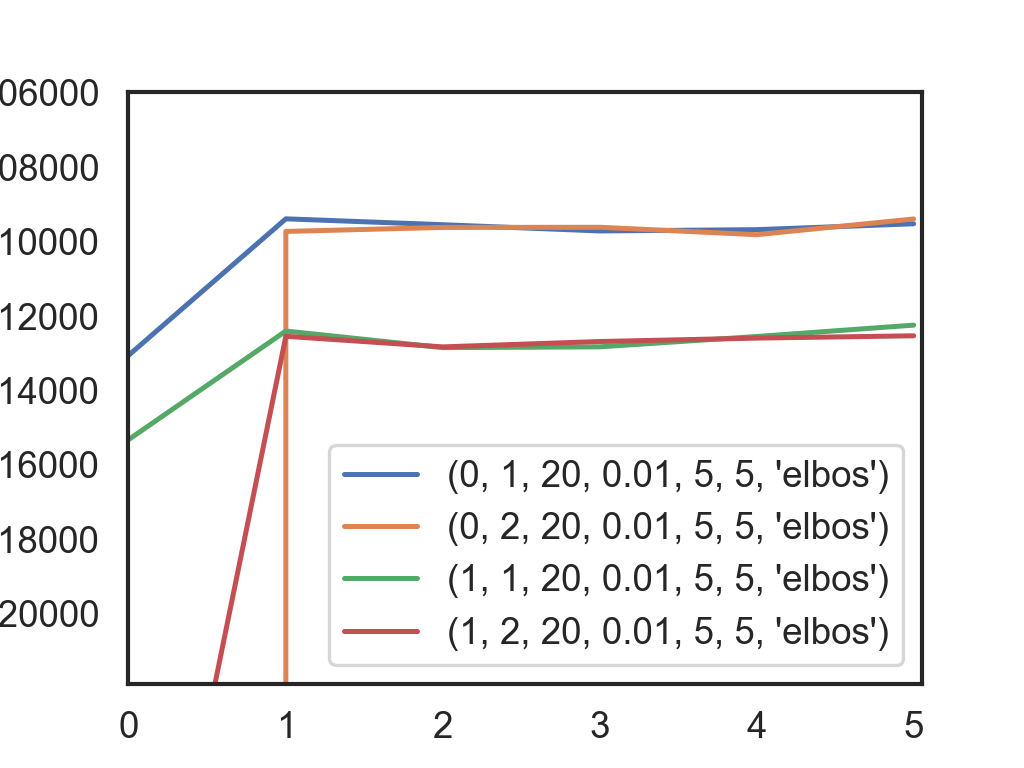

(0, 1, 20, 0.01, 5, 5, 'elbos') [-113047.53584005 -109386.32097653 -109544.94220823 -109712.45696727
 -109677.79324968 -109519.30186418]
(0, 1, 20, 0.01, 5, 5, 'r2_smooth') 0.9985055860050198
(0, 2, 20, 0.01, 5, 5, 'elbos') [-6.97506262e+08 -1.09725909e+05 -1.09617560e+05 -1.09613657e+05
 -1.09812739e+05 -1.09390243e+05]
(0, 2, 20, 0.01, 5, 5, 'r2_smooth') 0.9985348659463322
(1, 1, 20, 0.01, 5, 5, 'elbos') [-115313.6834393  -112401.78872427 -112847.62736685 -112826.8431029
 -112548.98105253 -112243.61366979]
(1, 1, 20, 0.01, 5, 5, 'r2_smooth') 0.9992474866086327
(1, 2, 20, 0.01, 5, 5, 'elbos') [-133226.94496567 -112543.17188367 -112827.9446614  -112683.55090985
 -112591.77145812 -112529.88882498]
(1, 2, 20, 0.01, 5, 5, 'r2_smooth') 0.9993001869324565


In [49]:
f, ax = plt.subplots()
for i, (k, v) in enumerate(dat['save_params_post'].items()): 
    
    fld, K, _, _, ws, _, tmp = k
    
    if 'r2_smooth' in tmp: 
        print(k, v)
    if 'elbo' in tmp: 
        print(k, v)
        plt.plot(v, label=str(k))
plt.legend()

########################################
########################################
########################################
########### STARTING jeev, 0 ############
########################################
########################################
Xlims: -0.08, 0.16
Ylims: 0.02, 0.26
Bin Curson kin Size 20
199 (15, 7)
new trial offset 199, total trls in this blk 199


/Users/preeyakhanna/bmi_dynamics_code/online_analysis/generate_models_utils.py:398: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  tmp = np.array([np.zeros(( bin_spk[x].shape[0])) + ix + trl_off for ix, x in enumerate(ix_mod)])


Xlims: -0.08, 0.16
Ylims: 0.02, 0.26
Bin Curson kin Size 20
171 (46, 7)
Len Obs Targs [1 2 3 4 5 6 8 9]
REMOVING A TRIAL: Animal jeev, TargIx -1.0
REMOVING A TRIAL: Animal jeev, TargIx 1.0
REMOVING A TRIAL: Animal jeev, TargIx 1.0
REMOVING A TRIAL: Animal jeev, TargIx 1.0
REMOVING A TRIAL: Animal jeev, TargIx 1.0
REMOVING A TRIAL: Animal jeev, TargIx 1.0
REMOVING A TRIAL: Animal jeev, TargIx 1.0
REMOVING A TRIAL: Animal jeev, TargIx 1.0
REMOVING A TRIAL: Animal jeev, TargIx 1.0
REMOVING A TRIAL: Animal jeev, TargIx 1.0
REMOVING A TRIAL: Animal jeev, TargIx 1.0
REMOVING A TRIAL: Animal jeev, TargIx 1.0
new trial offset 358, total trls in this blk 159


/Users/preeyakhanna/conda/envs/mountainlab/lib/python3.6/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


<IPython.core.display.Javascript object>


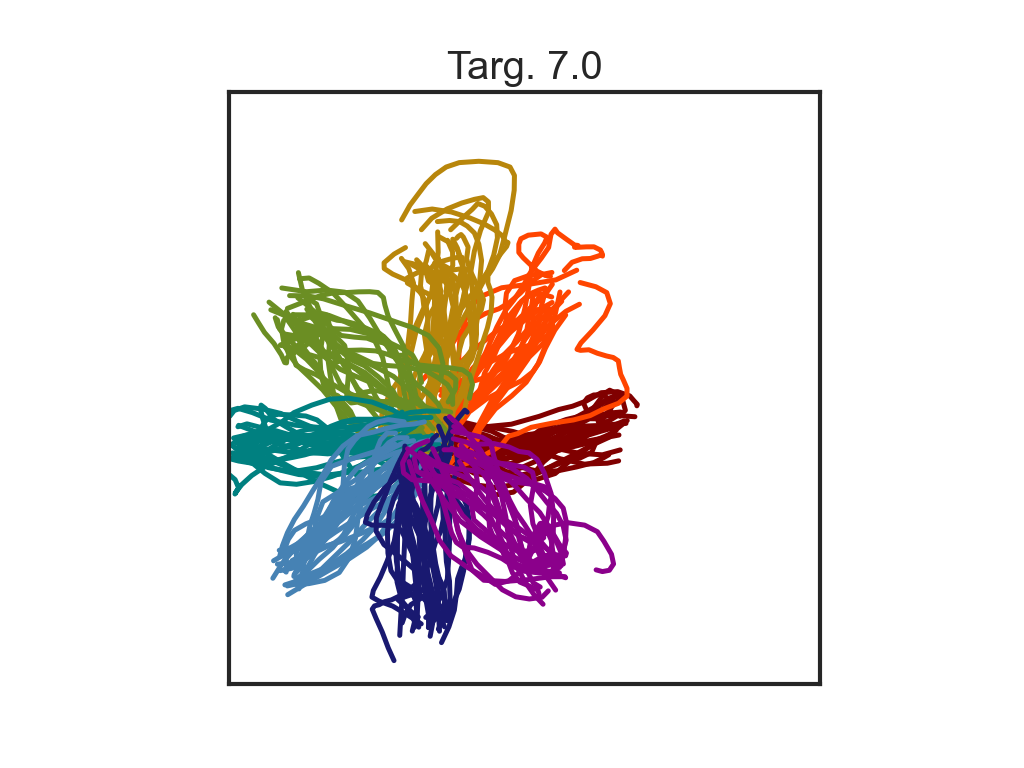

<IPython.core.display.Javascript object>


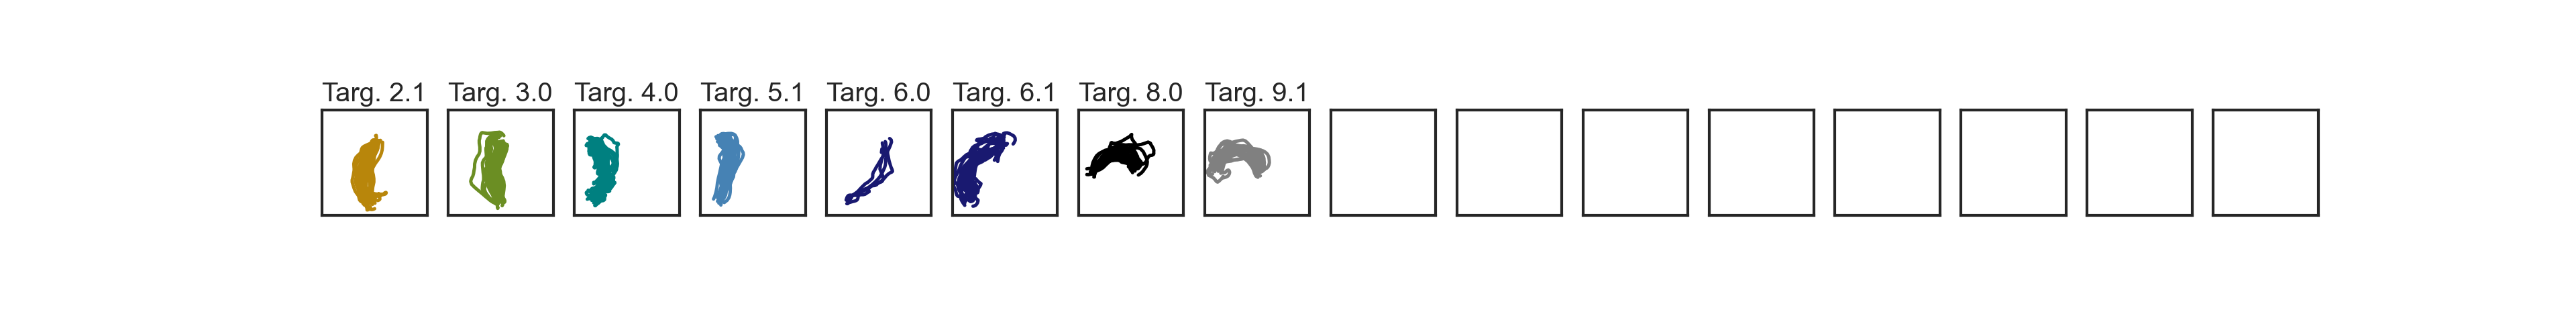

Animal jeev, tsk 0, N = 2859
Tsk 0, Trg 0.00, N = 307
Tsk 0, Trg 1.00, N = 339
Tsk 0, Trg 2.00, N = 445
Tsk 0, Trg 3.00, N = 429
Tsk 0, Trg 4.00, N = 337
Tsk 0, Trg 5.00, N = 294
Tsk 0, Trg 6.00, N = 342
Tsk 0, Trg 7.00, N = 366
Animal jeev, tsk 1, N = 5181
Tsk 1, Trg 2.10, N = 624
Tsk 1, Trg 3.00, N = 573
Tsk 1, Trg 4.00, N = 1103
Tsk 1, Trg 5.10, N = 607
Tsk 1, Trg 6.00, N = 164
Tsk 1, Trg 6.10, N = 830
Tsk 1, Trg 8.00, N = 587
Tsk 1, Trg 9.10, N = 693
n spks in data 20
n spks in trls_train 20


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

n spks in trls_train 20


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

n spks in trls_train 20


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

n spks in trls_train 20


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

n spks in trls_train 20


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

########################################
########################################
########################################
########### STARTING jeev, 1 ############
########################################
########################################
Xlims: -0.05, 0.13
Ylims: 0.05, 0.23
Bin Curson kin Size 20
16 (38, 7)


/Users/preeyakhanna/bmi_dynamics_code/online_analysis/generate_models_utils.py:398: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  tmp = np.array([np.zeros(( bin_spk[x].shape[0])) + ix + trl_off for ix, x in enumerate(ix_mod)])


new trial offset 16, total trls in this blk 16
Xlims: -0.08, 0.16
Ylims: 0.02, 0.26
Bin Curson kin Size 20
152 (39, 7)
Len Obs Targs [1 2 3 4 5 6 8 9]
REMOVING A TRIAL: Animal jeev, TargIx 1.0
REMOVING A TRIAL: Animal jeev, TargIx 1.0
REMOVING A TRIAL: Animal jeev, TargIx 1.0
REMOVING A TRIAL: Animal jeev, TargIx 1.0
REMOVING A TRIAL: Animal jeev, TargIx 1.0
REMOVING A TRIAL: Animal jeev, TargIx 1.0
REMOVING A TRIAL: Animal jeev, TargIx 1.0
REMOVING A TRIAL: Animal jeev, TargIx 1.0
REMOVING A TRIAL: Animal jeev, TargIx 1.0
REMOVING A TRIAL: Animal jeev, TargIx 1.0
new trial offset 158, total trls in this blk 142


/Users/preeyakhanna/conda/envs/mountainlab/lib/python3.6/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


<IPython.core.display.Javascript object>


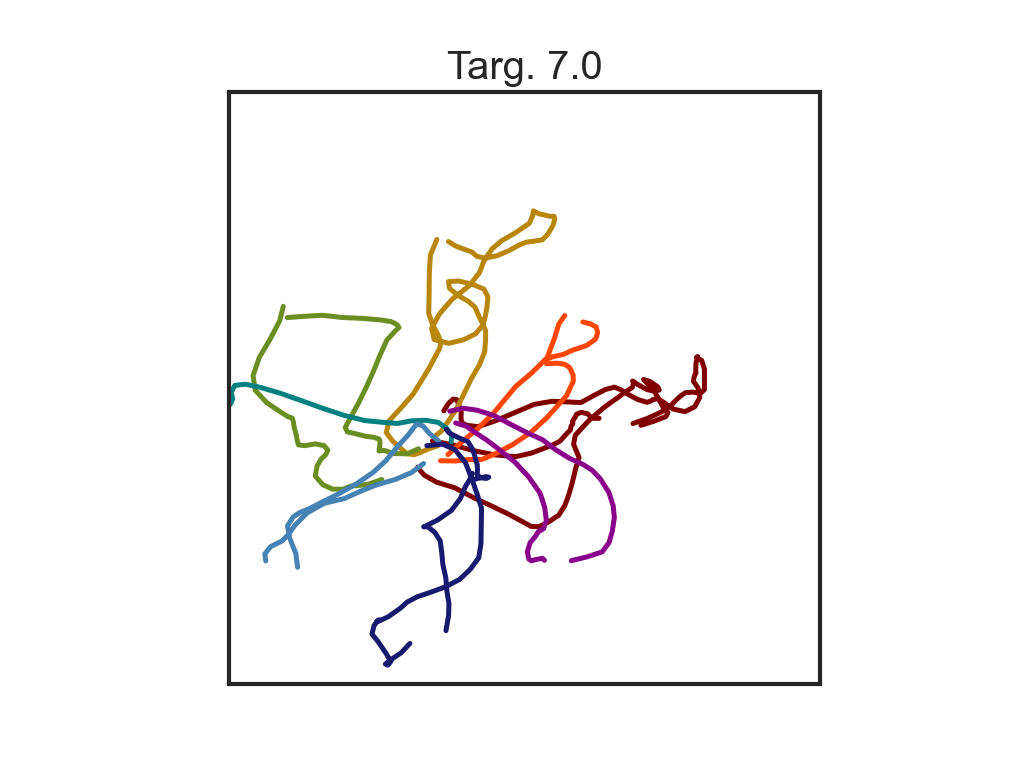

<IPython.core.display.Javascript object>


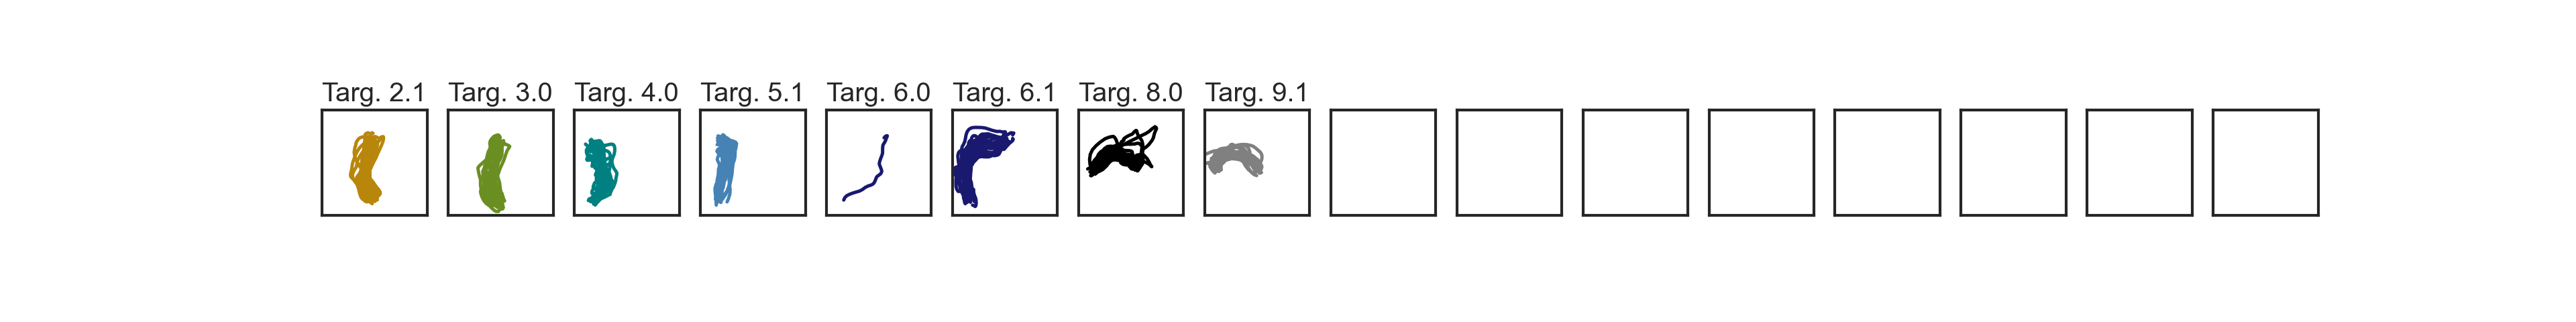

Animal jeev, tsk 0, N = 460
Tsk 0, Trg 0.00, N = 118
Tsk 0, Trg 1.00, N = 39
Tsk 0, Trg 2.00, N = 81
Tsk 0, Trg 3.00, N = 61
Tsk 0, Trg 4.00, N = 20
Tsk 0, Trg 5.00, N = 33
Tsk 0, Trg 6.00, N = 68
Tsk 0, Trg 7.00, N = 40
Animal jeev, tsk 1, N = 4334
Tsk 1, Trg 2.10, N = 550
Tsk 1, Trg 3.00, N = 490
Tsk 1, Trg 4.00, N = 777
Tsk 1, Trg 5.10, N = 490
Tsk 1, Trg 6.00, N = 38
Tsk 1, Trg 6.10, N = 793
Tsk 1, Trg 8.00, N = 616
Tsk 1, Trg 9.10, N = 580
n spks in data 20
n spks in trls_train 20


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

n spks in trls_train 20


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

n spks in trls_train 20


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

n spks in trls_train 20


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

n spks in trls_train 20


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

########################################
########################################
########################################
########### STARTING jeev, 2 ############
########################################
########################################
Xlims: -0.08, 0.16
Ylims: 0.02, 0.26
Bin Curson kin Size 20
90 (16, 7)
new trial offset 90, total trls in this blk 90


/Users/preeyakhanna/bmi_dynamics_code/online_analysis/generate_models_utils.py:398: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  tmp = np.array([np.zeros(( bin_spk[x].shape[0])) + ix + trl_off for ix, x in enumerate(ix_mod)])


Xlims: -0.08, 0.16
Ylims: 0.02, 0.26
Bin Curson kin Size 20
133 (35, 7)
Len Obs Targs [1 2 3 4 5 6 8 9]
REMOVING A TRIAL: Animal jeev, TargIx 1.0
REMOVING A TRIAL: Animal jeev, TargIx 1.0
REMOVING A TRIAL: Animal jeev, TargIx 1.0
REMOVING A TRIAL: Animal jeev, TargIx 1.0
REMOVING A TRIAL: Animal jeev, TargIx 1.0
new trial offset 218, total trls in this blk 128


/Users/preeyakhanna/conda/envs/mountainlab/lib/python3.6/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


<IPython.core.display.Javascript object>


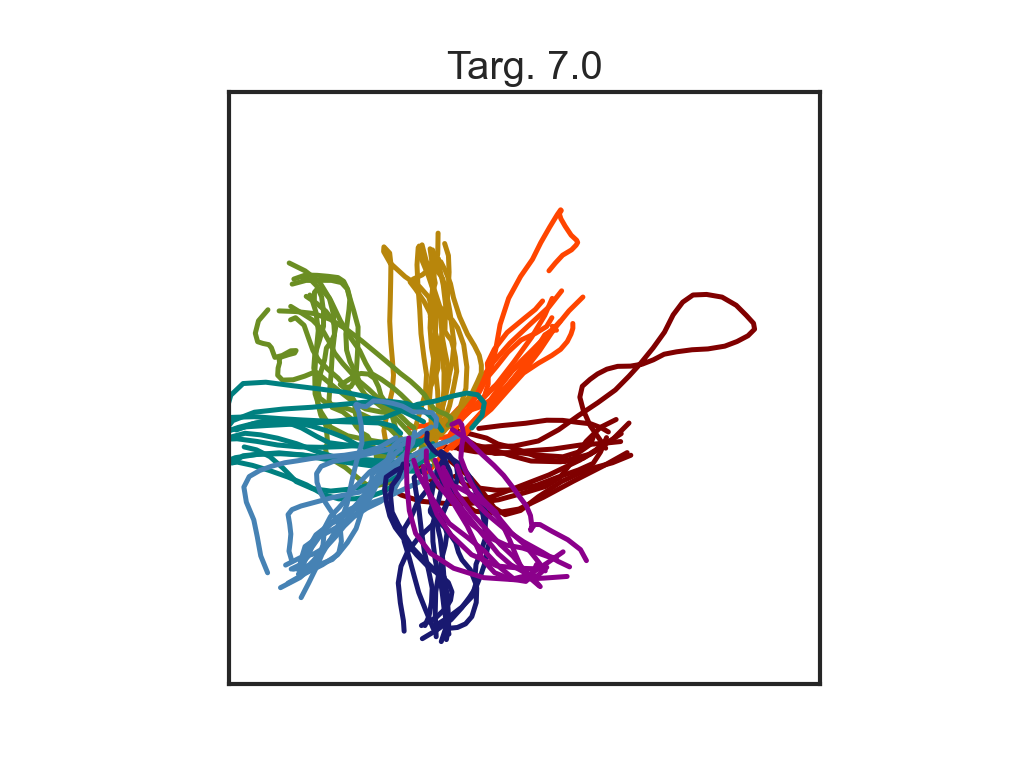

<IPython.core.display.Javascript object>


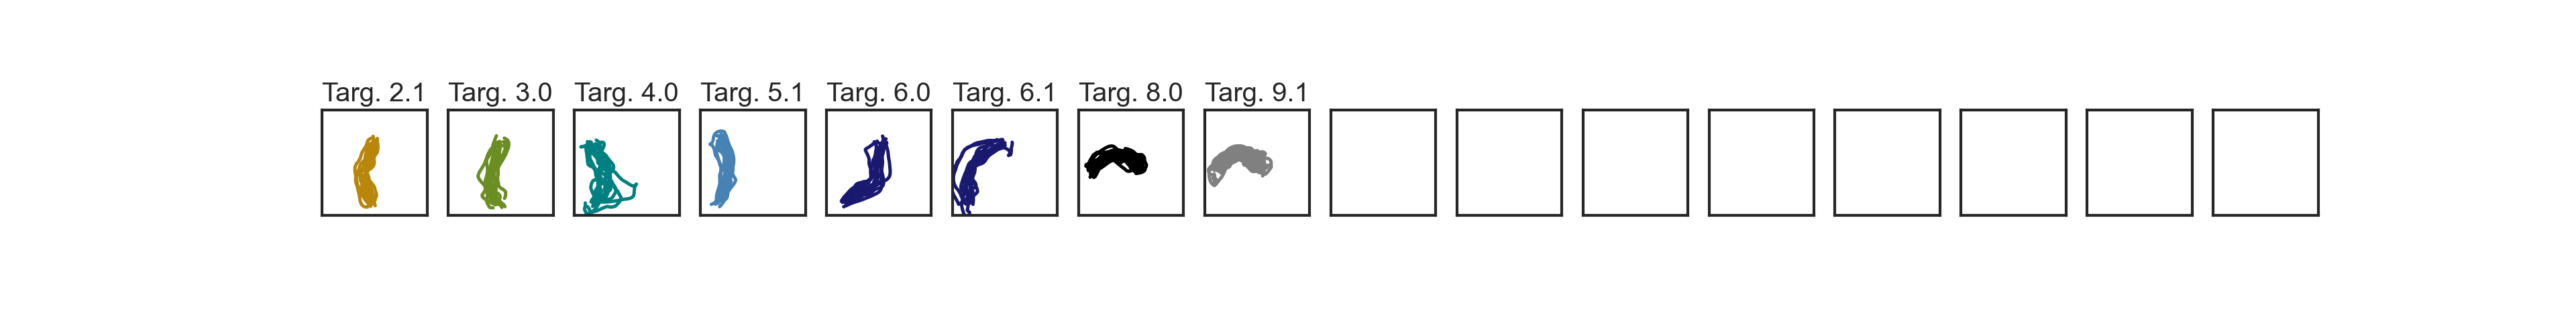

Animal jeev, tsk 0, N = 1382
Tsk 0, Trg 0.00, N = 151
Tsk 0, Trg 1.00, N = 152
Tsk 0, Trg 2.00, N = 172
Tsk 0, Trg 3.00, N = 243
Tsk 0, Trg 4.00, N = 160
Tsk 0, Trg 5.00, N = 201
Tsk 0, Trg 6.00, N = 171
Tsk 0, Trg 7.00, N = 132
Animal jeev, tsk 1, N = 3707
Tsk 1, Trg 2.10, N = 305
Tsk 1, Trg 3.00, N = 313
Tsk 1, Trg 4.00, N = 539
Tsk 1, Trg 5.10, N = 316
Tsk 1, Trg 6.00, N = 433
Tsk 1, Trg 6.10, N = 401
Tsk 1, Trg 8.00, N = 565
Tsk 1, Trg 9.10, N = 835
n spks in data 20
n spks in trls_train 20


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

n spks in trls_train 20


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

n spks in trls_train 20


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

n spks in trls_train 20


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

n spks in trls_train 20


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

########################################
########################################
########################################
########### STARTING jeev, 3 ############
########################################
########################################
Xlims: -0.08, 0.16
Ylims: 0.02, 0.26
Bin Curson kin Size 20
80 (17, 7)
new trial offset 80, total trls in this blk 80


/Users/preeyakhanna/bmi_dynamics_code/online_analysis/generate_models_utils.py:398: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  tmp = np.array([np.zeros(( bin_spk[x].shape[0])) + ix + trl_off for ix, x in enumerate(ix_mod)])


Xlims: -0.08, 0.16
Ylims: 0.02, 0.26
Bin Curson kin Size 20
101 (46, 7)
Len Obs Targs [1 2 3 4 5 6 8 9]
REMOVING A TRIAL: Animal jeev, TargIx 1.0
Keeping JEEV target 2 2.7
Correcting JEEV target 2 -0.4
REMOVING A TRIAL: Animal jeev, TargIx 1.0
Correcting JEEV target 2 0.1
Correcting JEEV target 2 -0.1
REMOVING A TRIAL: Animal jeev, TargIx 1.0
Correcting JEEV target 2 -0.9
Correcting JEEV target 2 -0.0
Correcting JEEV target 2 -0.6
Correcting JEEV target 2 -0.3
REMOVING A TRIAL: Animal jeev, TargIx 1.0
REMOVING A TRIAL: Animal jeev, TargIx 1.0
Correcting JEEV target 2 -0.2
new trial offset 176, total trls in this blk 96


/Users/preeyakhanna/conda/envs/mountainlab/lib/python3.6/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


<IPython.core.display.Javascript object>


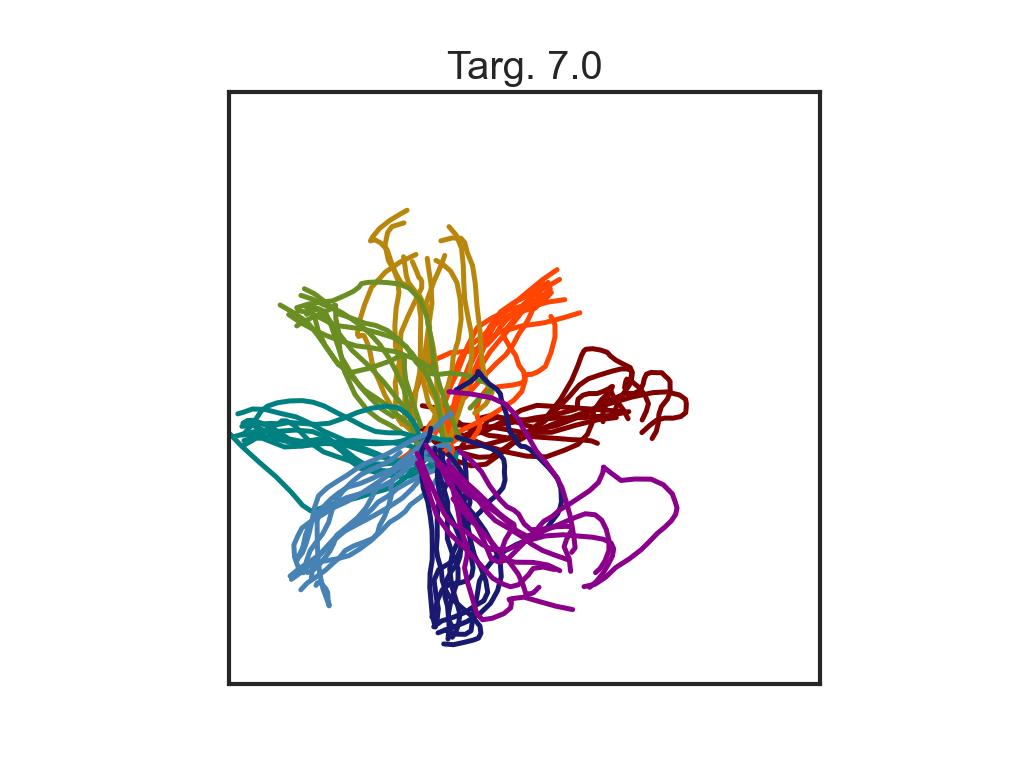

<IPython.core.display.Javascript object>


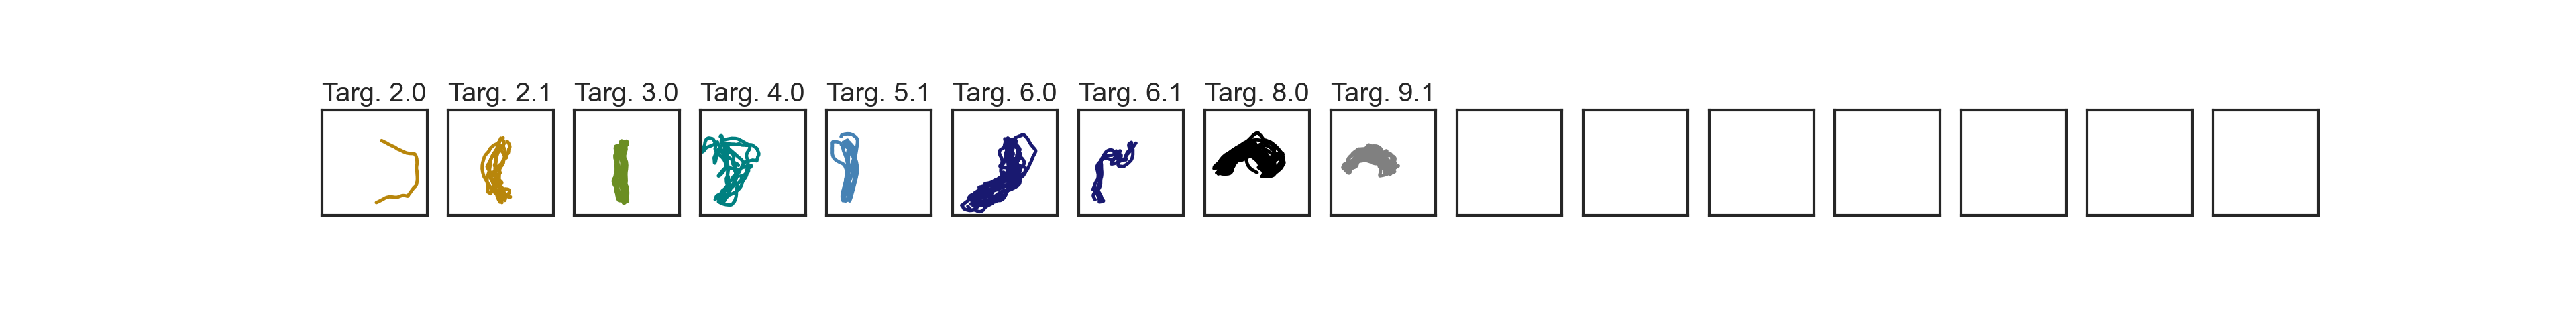

Animal jeev, tsk 0, N = 1532
Tsk 0, Trg 0.00, N = 221
Tsk 0, Trg 1.00, N = 171
Tsk 0, Trg 2.00, N = 154
Tsk 0, Trg 3.00, N = 171
Tsk 0, Trg 4.00, N = 182
Tsk 0, Trg 5.00, N = 200
Tsk 0, Trg 6.00, N = 221
Tsk 0, Trg 7.00, N = 212
Animal jeev, tsk 1, N = 4131
Tsk 1, Trg 2.00, N = 52
Tsk 1, Trg 2.10, N = 352
Tsk 1, Trg 3.00, N = 205
Tsk 1, Trg 4.00, N = 499
Tsk 1, Trg 5.10, N = 201
Tsk 1, Trg 6.00, N = 1119
Tsk 1, Trg 6.10, N = 213
Tsk 1, Trg 8.00, N = 774
Tsk 1, Trg 9.10, N = 716
n spks in data 21
n spks in trls_train 21


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

n spks in trls_train 21


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

n spks in trls_train 21


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

n spks in trls_train 21


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

n spks in trls_train 21


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

########################################
########################################
########################################
########### STARTING grom, 0 ############
########################################
########################################


UnboundLocalError: local variable 'bin_spk_i' referenced before assignment

> /Users/preeyakhanna/bmi_dynamics_code/prelim_analysis.py(467)extract_trials_all()
    465                 all_data['rch_tm'].append(np.zeros((nT, )) + (r-g)*1000./60.)
    466 
--> 467     print(go_ix[keep_ix].shape, rew_ix[keep_ix].shape, bin_spk_i.shape, nbins, hdf_ix_i.shape)
    468     targ_ix = get_target_ix(np.vstack((all_data['targ_i_all'])), animal, all_data['tsk']) #targ_i_all[1:,:])
    469     print(np.unique(targ_ix))

ipdb> c


In [52]:
for animal in ['jeev', 'grom']: 
    for day in range(analysis_config.data_params['%s_ndays'%animal]): 
        print('########################################')
        print('########################################')
        print('########################################')
        print('########### STARTING %s, %d ############'%(animal, day))
        print('########################################')
        print('########################################')
        
        generate_models.sweep_slds_params(animal, day)

In [54]:
##### plot Jeevs ###
with open('slds_sweep_jeev_0.pkl', 'rb') as f: 
    dat = pickle.load(f)

In [55]:
dat.keyseys()

dict_keys(['save_params_post', 'save_params_model'])

<IPython.core.display.Javascript object>


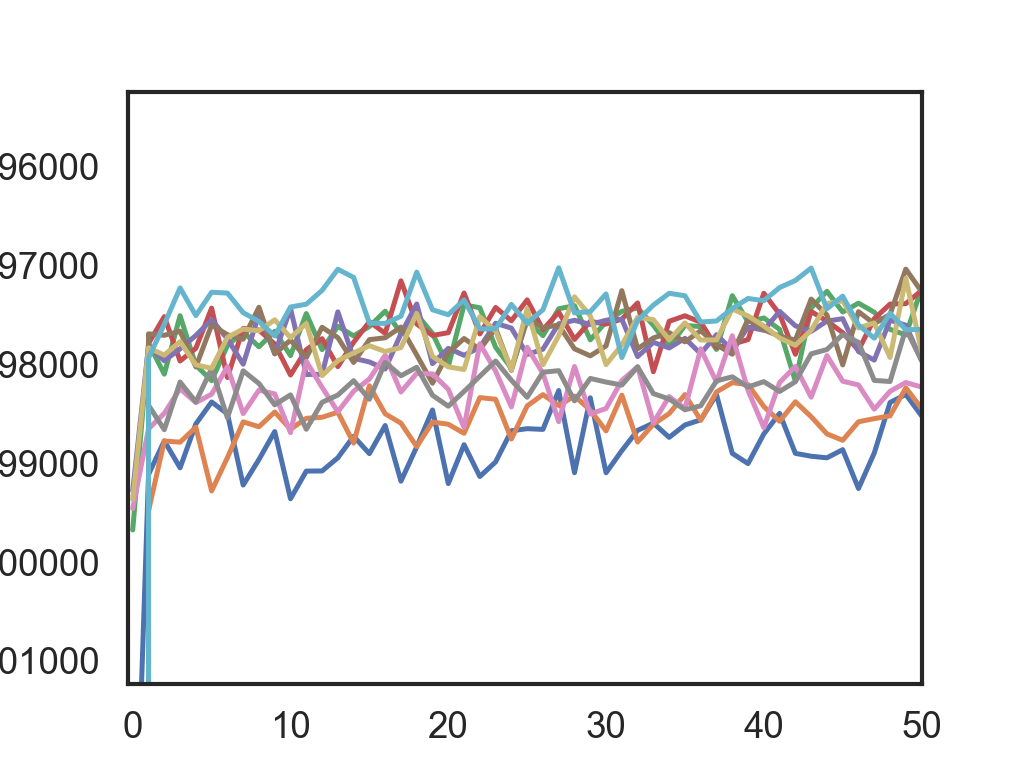

In [61]:
#### PLOT the MODEL ELBOs ###
f, ax = plt.subplots()

for i, (k, v) in enumerate(dat['save_params_model'].items()):
    if len(k) == 5:
        if k[4] == 'elbo': 
            ax.plot(v)

<IPython.core.display.Javascript object>


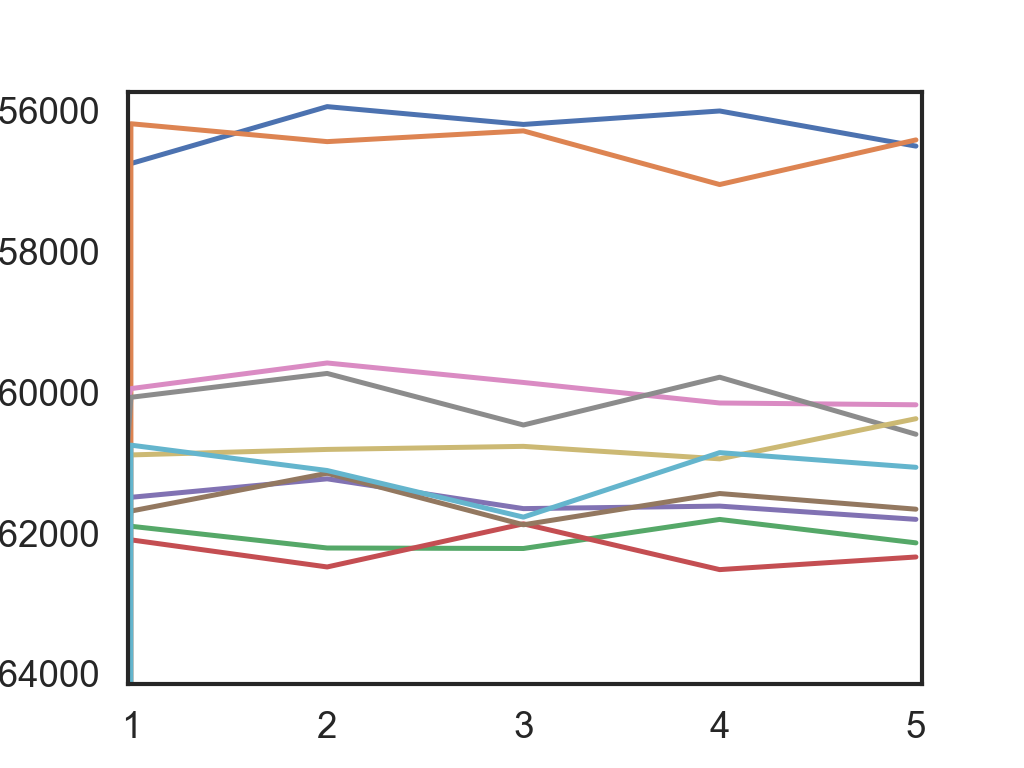

In [64]:
#### PLOT the POST ELBOs ###
f, ax = plt.subplots()

for i, (k, v) in enumerate(dat['save_params_post'].items()):
    if 'elbo' in k[-1]: 
        fld, K, _, _, ws, _, tmp = k
        plt.plot(v, label=str(k))
#plt.legend()

<IPython.core.display.Javascript object>


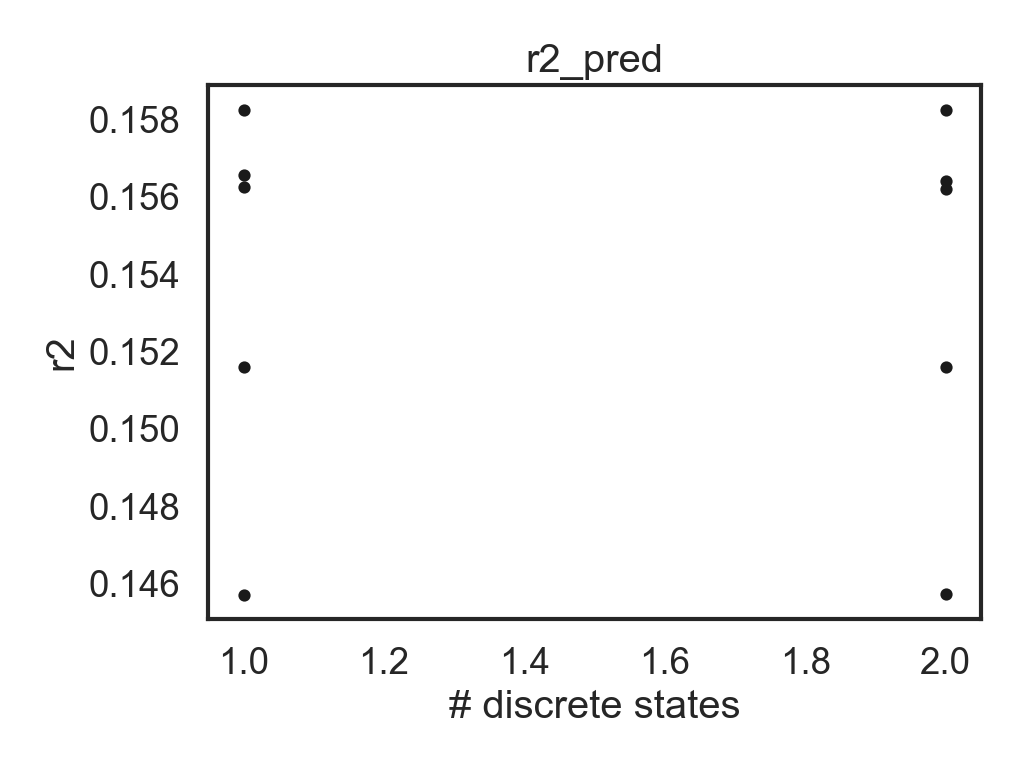

<IPython.core.display.Javascript object>


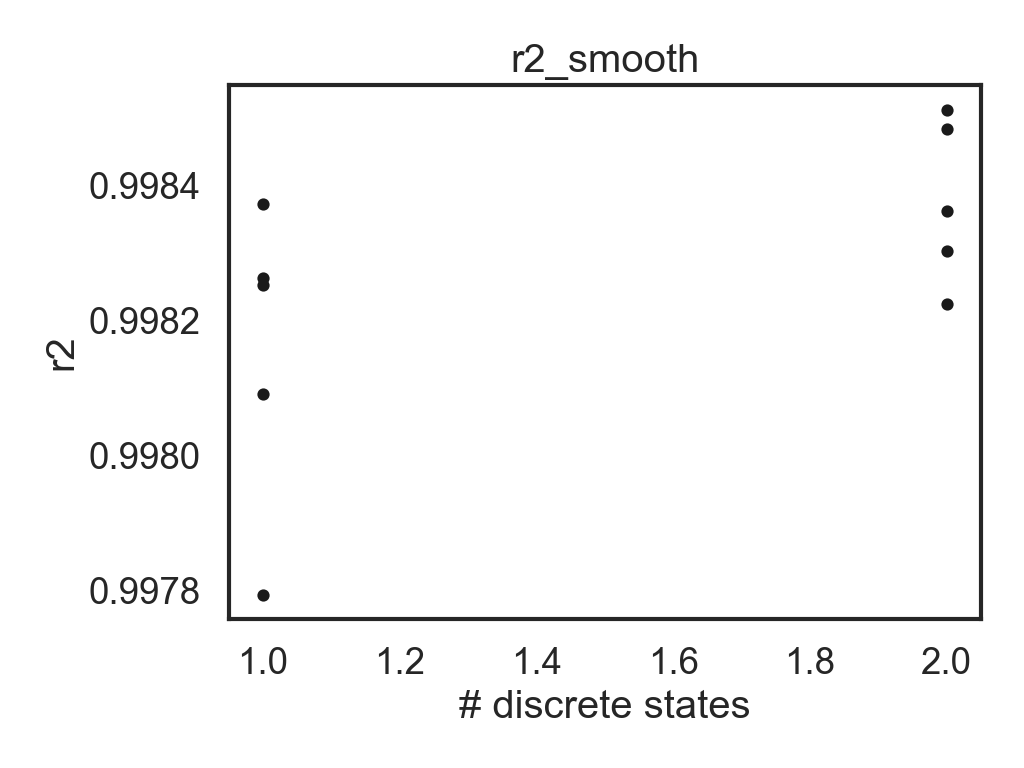

(0, 1, 50, 0.01, 5, 5, 'elbos')
(0, 1, 50, 0.01, 5, 5, 'pred_spks')
(0, 1, 50, 0.01, 5, 5, 'true_spks')
(0, 1, 50, 0.01, 5, 5, 'pred_spks_params')
(0, 2, 50, 0.01, 5, 5, 'elbos')
(0, 2, 50, 0.01, 5, 5, 'pred_spks')
(0, 2, 50, 0.01, 5, 5, 'true_spks')
(0, 2, 50, 0.01, 5, 5, 'pred_spks_params')
(1, 1, 50, 0.01, 5, 5, 'elbos')
(1, 1, 50, 0.01, 5, 5, 'pred_spks')
(1, 1, 50, 0.01, 5, 5, 'true_spks')
(1, 1, 50, 0.01, 5, 5, 'pred_spks_params')
(1, 2, 50, 0.01, 5, 5, 'elbos')
(1, 2, 50, 0.01, 5, 5, 'pred_spks')
(1, 2, 50, 0.01, 5, 5, 'true_spks')
(1, 2, 50, 0.01, 5, 5, 'pred_spks_params')
(2, 1, 50, 0.01, 5, 5, 'elbos')
(2, 1, 50, 0.01, 5, 5, 'pred_spks')
(2, 1, 50, 0.01, 5, 5, 'true_spks')
(2, 1, 50, 0.01, 5, 5, 'pred_spks_params')
(2, 2, 50, 0.01, 5, 5, 'elbos')
(2, 2, 50, 0.01, 5, 5, 'pred_spks')
(2, 2, 50, 0.01, 5, 5, 'true_spks')
(2, 2, 50, 0.01, 5, 5, 'pred_spks_params')
(3, 1, 50, 0.01, 5, 5, 'elbos')
(3, 1, 50, 0.01, 5, 5, 'pred_spks')
(3, 1, 50, 0.01, 5, 5, 'true_spks')
(3, 1, 50, 0.0

In [74]:
f1, ax1 = plt.subplots()
f2, ax2 = plt.subplots()
# i_fold, k, nit, alph, ws, nit_post,

for i, (k, v) in enumerate(dat['save_params_post'].items()): 
    
    ax = None
    if 'r2_pred' in k[-1]:  
        ax = ax1; 
    
    elif 'r2_smooth' in k[-1]: 
        ax = ax2;
    
    
    if ax is None: 
        print(k)
    else: 
        #print(k, v)
        ## Unpack ## 
        fld, K, _, _, ws, _, _ = k
        ax.plot(K, v, 'k.', label='f%d'%fld)
        ax.set_title(k[-1])
        ax.set_ylabel('r2')
        ax.set_xlabel('# discrete states')
for f in [f1, f2]: 
    f.tight_layout()

In [86]:
### Now actually plot 
with open('slds_sweep_jeev_0.pkl', 'rb') as f: 
    dat = pickle.load(f)

for k in [1, 2]: 
    
    pred = []; 
    true = [];
    trl = []; 
    bin_num = []; 

    for i in range(5): 
        pred_spks = np.vstack(( dat['save_params_post'][(i, k, 50, 0.01, 5, 5, 'pred_spks')] ))
        true_spks = np.vstack(( dat['save_params_post'][(i, k, 50, 0.01, 5, 5, 'true_spks')] )) 
        
        ### Params ### 
        params    = np.vstack(( dat['save_params_post'][(i, k, 50, 0.01, 5, 5, 'pred_spks_params')] )) 
        
        pred.append(pred_spks)
        true.append(true_spks)
        trl.append(params[:, 0])
        bin_num.append(params[:, 1])
    
    ## vstack ## 
    pred = np.vstack((pred))
    true = np.vstack((true))
    trl = np.hstack((trl))
    bin_num = np.hstack((bin_num))
    
    ### print r2 ### 
    r2 = util_fcns.get_R2(true, pred, pop = True)
    print(r2)
    
    

0.15494073193488833
0.15490773338707364


In [84]:

from online_analysis import util_fcns

In [287]:
# animal = 'jeev'
# fname = analysis_config.config[animal+'_pref']+'tuning_models_%s_model_set11_task_spec_pls_gen.pkl'%animal
# dat = pickle.load(open(fname))
    

<IPython.core.display.Javascript object>


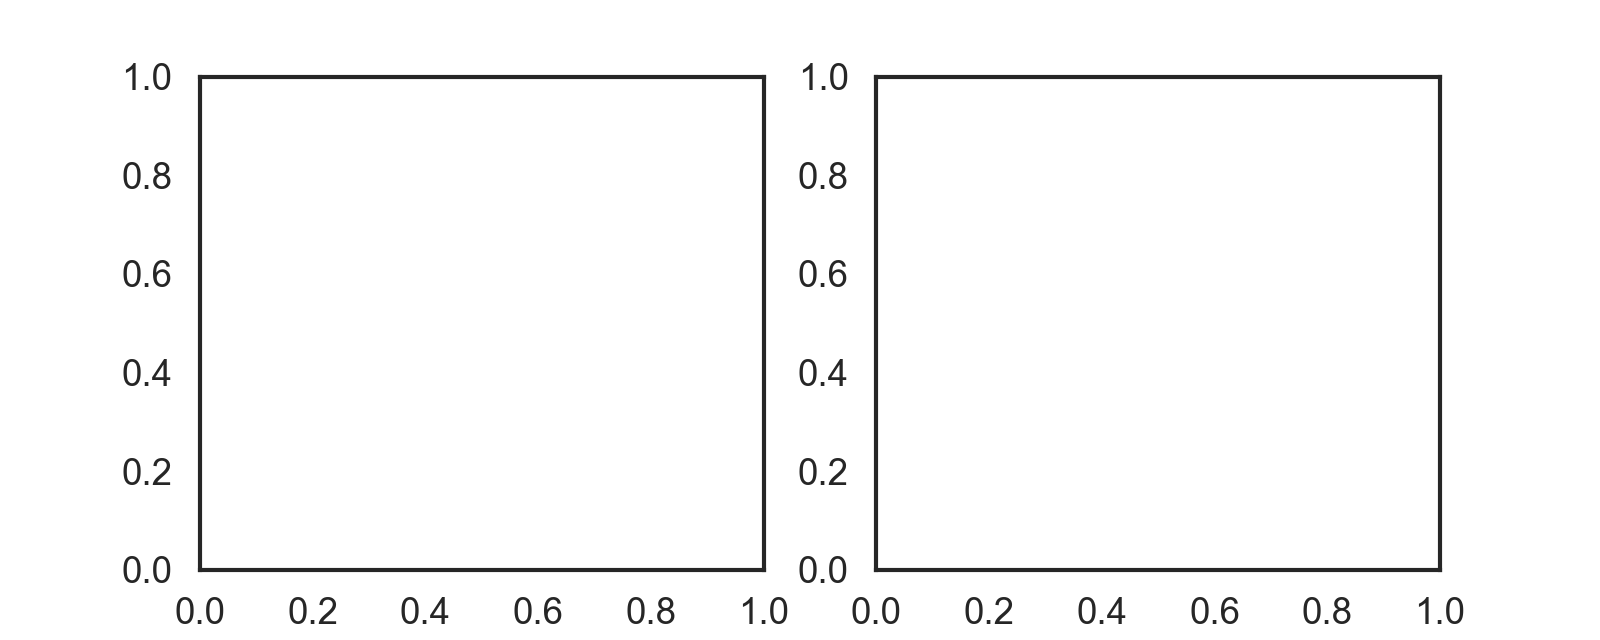

/Users/preeyakhanna/conda/envs/mountainlab/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.linear_model.ridge module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/preeyakhanna/conda/envs/mountainlab/lib/python3.6/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator Ridge from version 0.20.4 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


KeyError: (1, 'hist_1pos_0psh_0spksm_1_spksp_0_latentLDS')

> <ipython-input-45-e2cd164b0c25>(36)<module>()
     34         pred_spks = dat_ridge[day_ix, 'hist_1pos_0psh_0spksm_1_spksp_0'] ## no conditioning
     35         pred_spks_latent = lds_dat[day_ix, 'hist_1pos_0psh_0spksm_1_spksp_0_latentLDS'][:, :, 2] ### only did the condition-general one
---> 36         pred_spks_latent_window = lds_dat_window[day_ix, 'hist_1pos_0psh_0spksm_1_spksp_0_latentLDS'][:, :, 2] ### only did the condition-general one
     37 
     38         ### Quick comparison for now ###

ipdb> c


In [45]:
fig, ax = plt.subplots(ncols = 2, figsize=(10, 4))
pkl_kw = dict(encoding='latin1')
mag_boundaries = pickle.load(open(analysis_config.data_params['mag_bound_file'], 'rb'), **pkl_kw)

for ia, animal in enumerate(['grom', 'jeev']):#, 'jeev']):#, 'jeev']): 
    
    # original fname: backup_4_2022_tuning_models_grom_model_set11_task_spec_pls_gen.pkl
    fname = analysis_config.config[animal+'_pref']+'backup_4_2022_tuning_models_%s_model_set11_task_spec_pls_gen.pkl'%animal
    
    # redo w/ full dimensionality and mean subtraction
    #fname = analysis_config.config[animal+'_pref']+'backup_7_2022_tuning_models_%s_model_set11_task_spec_pls_gen.pkl'%animal
    lds_dat = pickle.load(open(fname, 'rb'), **pkl_kw)
    
    # redo in smm w/ full dimensionality and mean subtraction and window prediction procedure (windowsize=5)
    fname = analysis_config.config[animal+'_pref']+'tuning_models_%s_model_set11_task_spec_pls_gen.pkl'%animal
    lds_dat_window = pickle.load(open(fname, 'rb'), **pkl_kw)
    
    fname2 = analysis_config.config[animal+'_pref']+'tuning_models_%s_model_set6_.pkl'%animal
    dat_ridge = pickle.load(open(fname2, 'rb'), **pkl_kw)

    R2_pred_next_spks = []
    R2_pred_next_command = []
    
    if animal == 'jeev': 
        ndays = np.arange(4)
    else: 
        ndays = np.array([0, 1, 3, 5, 6, 7, 8])
        
    for day_ix in ndays: #analysis_config.data_params['%s_ndays'%animal]): 

        spks      = dat_ridge[day_ix, 'spks']

        ### Figure 5 ###
        pred_spks = dat_ridge[day_ix, 'hist_1pos_0psh_0spksm_1_spksp_0'] ## no conditioning 
        pred_spks_latent = lds_dat[day_ix, 'hist_1pos_0psh_0spksm_1_spksp_0_latentLDS'][:, :, 2] ### only did the condition-general one
        pred_spks_latent_window = lds_dat_window[day_ix, 'hist_1pos_0psh_0spksm_1_spksp_0_latentLDS'][:, :, 2] ### only did the condition-general one

        ### Quick comparison for now ### 
        neural_push = dat_ridge[day_ix, 'np']

        command_bins = util_fcns.commands2bins([neural_push], mag_boundaries, animal, day_ix, 
                                           vel_ix=[0, 1])[0]
        
        ### Get these out for SLDS data comparison ### 
        bin_num = dat_ridge[day_ix, 'bin_num']
        trl = dat_ridge[day_ix, 'trl']
        
        ### load the SLDS data ### 
        with open('slds_sweep_%s_%d_1_mean_sub.pkl'%(animal, day_ix), 'rb') as f: 
            slds_dat_mean_sub = pickle.load(f)
        
        ### gaussian constrained ##
        #with open('slds_sweep_%s_%d.pkl'%(animal, day_ix), 'rb') as f: 
        #    slds_dat = pickle.load(f)

        ### get SLDS data ### _ms
        pred1_ms, true1, trl1, bin_num1 = compile_slds_data(slds_dat_mean_sub, 1, 10)
        pred2_ms, true2, trl2, bin_num2 = compile_slds_data(slds_dat_mean_sub, 2, 10)
        pred5_ms, true5, trl5, bin_num5 = compile_slds_data(slds_dat_mean_sub, 5, 10)
        
        #pred1, true1_2, trl1_2, bin_num1_2 = compile_slds_data(slds_dat, 1)
        #pred2, true2_2, trl2_2, bin_num2_2 = compile_slds_data(slds_dat, 2)
        #pred5, true5_2, trl5_2, bin_num5_2 = compile_slds_data(slds_dat, 5)
        
        assert(np.all(trl1 == trl2))
        assert(np.all(trl1 == trl5))
        #assert(np.all(trl1 == trl1_2))
        
        assert(np.all(bin_num1 == bin_num2))
        assert(np.all(bin_num1 == bin_num5))
        #assert(np.all(bin_num1 == bin_num1_2))
        
        ### Check that these match up ### 
        valid_ix = []; slds_ix = []; 
        
        for tmp, (tr, bn) in enumerate(zip(trl1, bin_num1)): 
            ix_tmp = np.nonzero(np.logical_and(trl == tr, bin_num == bn))[0]
            assert(len(ix_tmp) == 1)
            assert(np.all(true1[tmp, :] == true2[tmp, :]))
            assert(np.all(true1[tmp, :] == true5[tmp, :]))
            assert(np.all(true1[tmp, :] == spks[ix_tmp, :]))
            #assert(np.all(true1[tmp, :] == true1_2[tmp, :]))
            #assert(np.all(true1[tmp, :] == true2_2[tmp, :]))
            
            valid_ix.append(ix_tmp)
            slds_ix.append(tmp) 
            
        valid_ix = np.hstack((valid_ix)); 
        slds_ix = np.hstack((slds_ix))
        
        valid_ix_lte4 = np.nonzero(command_bins[valid_ix, 0] < 4)[0]
        #valid_ix_lat = np.nonzero(pred_spks_latent[valid_ix[valid_ix_lte4], 0] > -100)[0]
        #valid_ix_lat = np.arange(len(valid_ix_lte4))
        
        ## index acceptable indices ### 
        valid_ix = valid_ix[valid_ix_lte4]
        slds_ix = slds_ix[valid_ix_lte4]
                
        ### Maek sure no invalids; 
        assert(np.all(pred_spks_latent[valid_ix, :] > -10))
        assert(np.all(pred_spks_latent_window[valid_ix, :] > -10))
        
        ### Get R2 for predicting next spkes ### 
        r2_spks = util_fcns.get_R2(spks[valid_ix, :], pred_spks[valid_ix, :])
        r2_latent = util_fcns.get_R2(spks[valid_ix, :], pred_spks_latent[valid_ix, :])
        r2_latent_window = util_fcns.get_R2(spks[valid_ix, :], pred_spks_latent_window[valid_ix, :])
        
        r2_slds1_ms = util_fcns.get_R2(spks[valid_ix, :], pred1_ms[slds_ix, :])
        r2_slds2_ms = util_fcns.get_R2(spks[valid_ix, :], pred2_ms[slds_ix, :])
        r2_slds5_ms = util_fcns.get_R2(spks[valid_ix, :], pred5_ms[slds_ix, :])
        
        #r2_slds1 = util_fcns.get_R2(spks[valid_ix, :], pred1[slds_ix, :])
        #r2_slds2 = util_fcns.get_R2(spks[valid_ix, :], pred2[slds_ix, :])
        #r2_slds5 = util_fcns.get_R2(spks[valid_ix, :], pred5[slds_ix, :])
        
        R2_pred_next_spks.append([r2_spks, r2_latent, r2_latent_window, r2_slds1_ms, 
                                 r2_slds2_ms, r2_slds5_ms])#, r2_slds1, r2_slds2])#, r2_slds5])
        
        
        #R2_pred_next_spks.append([r2_spks, r2_latent, r2_slds1, r2_slds2, r2_slds5])#r2_slds1_2, r2_slds2_2])
        ### Get R2 for predicting next command ### 
        
        KG = util_fcns.get_decoder(animal, day_ix)
        r2_spks = util_fcns.get_R2(np.dot(spks[valid_ix, :], KG.T), np.dot(pred_spks[valid_ix, :],
                                                                                   KG.T))
        r2_latent = util_fcns.get_R2(np.dot(spks[valid_ix, :], KG.T), np.dot(pred_spks_latent[valid_ix, :],
                                                                                     KG.T))
        r2_latent_window = util_fcns.get_R2(np.dot(spks[valid_ix, :], KG.T), np.dot(pred_spks_latent_window[valid_ix, :],
                                                                                     KG.T))
        
        r2_slds1_ms = util_fcns.get_R2(np.dot(spks[valid_ix, :], KG.T), np.dot(pred1_ms[slds_ix, :],
                                                                                     KG.T))
        r2_slds2_ms = util_fcns.get_R2(np.dot(spks[valid_ix, :], KG.T), np.dot(pred2_ms[slds_ix, :],
                                                                                     KG.T))
        r2_slds5_ms = util_fcns.get_R2(np.dot(spks[valid_ix, :], KG.T), np.dot(pred5_ms[slds_ix, :],
                                                                                     KG.T))
        
        
        #r2_slds1 = util_fcns.get_R2(np.dot(spks[valid_ix, :], KG.T), np.dot(pred1[slds_ix, :],
        #                                                                             KG.T))
        #r2_slds2 = util_fcns.get_R2(np.dot(spks[valid_ix, :], KG.T), np.dot(pred2[slds_ix, :],
        #                                                                             KG.T))
        #r2_slds5 = util_fcns.get_R2(np.dot(spks[valid_ix, :], KG.T), np.dot(pred5[slds_ix, :],
                                                                                     #KG.T))
        
        R2_pred_next_command.append([r2_spks, r2_latent, r2_latent_window, 
                                     r2_slds1_ms, r2_slds2_ms, r2_slds5_ms])
                                     #r2_slds1, r2_slds2, ])#r2_slds5])
        
        
    offs = 9
    for ir2i, (R2, r2_lab) in enumerate(zip([R2_pred_next_spks, R2_pred_next_command],
                                 ['R2 pred spks', 'R2 pred com'])):   
        R2 = np.vstack((R2))
        ax[ir2i].bar(0+offs*ia, np.mean(R2[:, 0]), color='cyan')
        ax[ir2i].bar(1+offs*ia, np.mean(R2[:, 1]), color='darkgray') # r2_latent
        ax[ir2i].bar(2+offs*ia, np.mean(R2[:, 2]), color='gray') # r2_latent_window
        
        ax[ir2i].bar(3+offs*ia, np.mean(R2[:, 3]), color='purple',alpha=1.) # r2_slds1_ms
        #ax[ir2i].bar(4+offs*ia, np.mean(R2[:, 6]), color='orchid',alpha=1.) # r2_slds1
        
        ax[ir2i].bar(5+offs*ia, np.mean(R2[:, 4]), color='purple',alpha=.7) # r2_slds2_ms
        #ax[ir2i].bar(6+offs*ia, np.mean(R2[:, 7]), color='orchid',alpha=.7) # r2_slds2
        
        ax[ir2i].bar(7+offs*ia, np.mean(R2[:, 5]), color='purple',alpha=.4) # r2_slds5_ms
        #ax[ir2i].bar(8+offs*ia, np.mean(R2[:, 8]), color='orchid',alpha=.4) # r2_slds5
        
        
        for i in range(R2.shape[0]): 
            #r2_ = [R2[i, 0], R2[i, 1], R2[i, 2], R2[i, 3], R2[i, 6], R2[i, 4], R2[i, 7], R2[i, 5]]#, R2[i, 8]]
            r2_ = R2[i, :]
            x_ = np.array([0, 1, 2, 3, 5, 7])
            #x_ = np.arange(len(r2_))
            ## Plot bars ## 
            ax[ir2i].plot(x_+offs*ia, r2_, 'k-', linewidth=.5)
            
        ### labels 
        ax[ir2i].set_ylabel(r2_lab)
        
        #x_ = np.arange(len(r2_))
        x_ = np.array([0, 1, 2, 3, 5, 7])
        ax[ir2i].set_xticks(np.hstack((x_, x_ + offs)))
        
        #labs = ['Rdg', 'LDS', 'LDS-wind', 'SLDS-1-ms', 'SLDS-1', 'SLDS-2-ms', 'SLDS-2', 'SLDS-5-ms']#'SLDS-5']
        labs = ['Rdg', 'LDS', 'LDS-wind', 'SLDS-1-ms', 'SLDS-2-ms', 'SLDS-5-ms']#'SLDS-5']
        labs_all = []
        
        for L in ['G\n', 'J\n']: 
            labs_all.extend([L+l for l in labs])
            
        ax[ir2i].set_xticklabels(labs_all, 
                                 fontsize=8, rotation = 20) 
# for axi in ax: 
#     axi.set_xlim([-1, 8])
# fig.tight_layout()

<IPython.core.display.Javascript object>


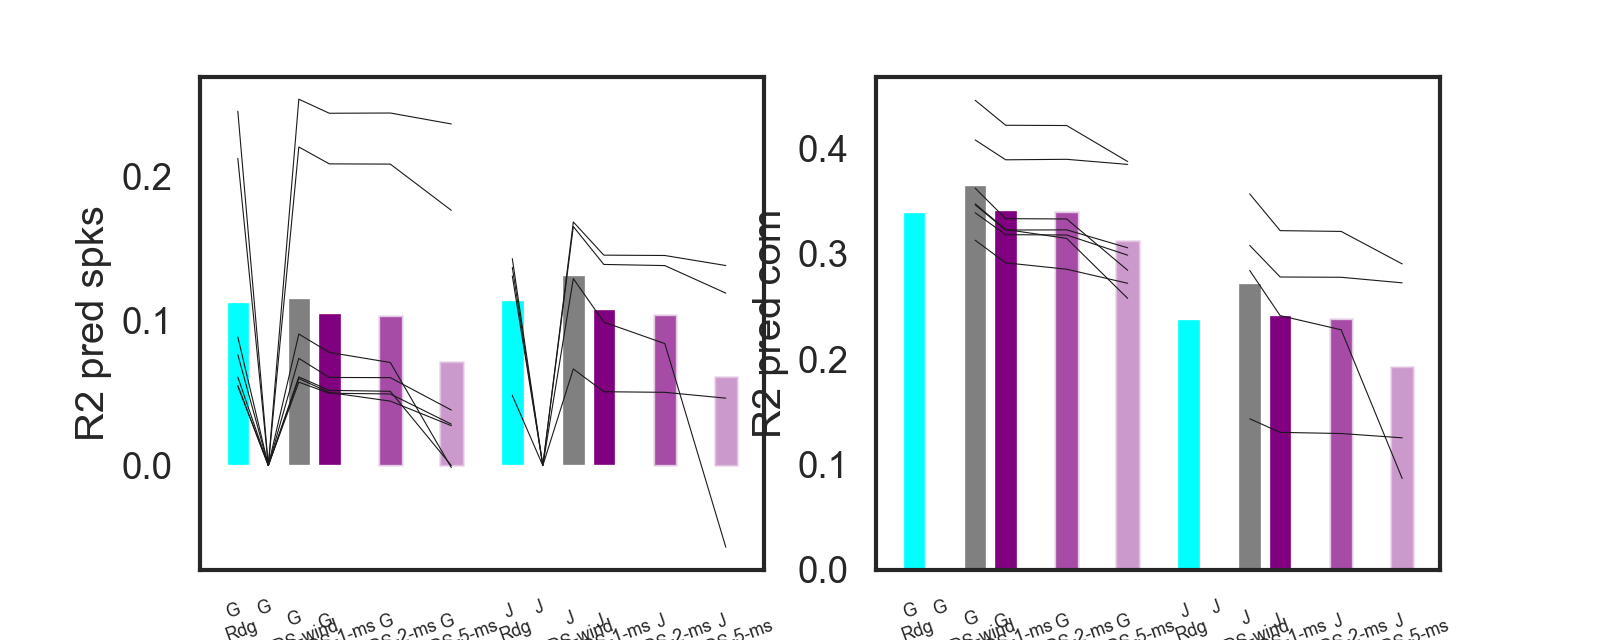

/Users/preeyakhanna/conda/envs/mountainlab/lib/python3.6/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator Ridge from version 0.20.4 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/Users/preeyakhanna/conda/envs/mountainlab/lib/python3.6/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator Ridge from version 0.20.4 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [47]:
fig, ax = plt.subplots(ncols = 2, figsize=(10, 4))
pkl_kw = dict(encoding='latin1')
mag_boundaries = pickle.load(open(analysis_config.data_params['mag_bound_file'], 'rb'), **pkl_kw)

for ia, animal in enumerate(['grom', 'jeev']):#, 'jeev']):#, 'jeev']): 
    
    # original fname: backup_4_2022_tuning_models_grom_model_set11_task_spec_pls_gen.pkl
    #fname = analysis_config.config[animal+'_pref']+'backup_4_2022_tuning_models_%s_model_set11_task_spec_pls_gen.pkl'%animal
    
    # redo w/ full dimensionality and mean subtraction
    #fname = analysis_config.config[animal+'_pref']+'backup_7_2022_tuning_models_%s_model_set11_task_spec_pls_gen.pkl'%animal
    #lds_dat = pickle.load(open(fname, 'rb'), **pkl_kw)
    
    # redo in smm w/ full dimensionality and mean subtraction and window prediction procedure (windowsize=5)
    fname = analysis_config.config[animal+'_pref']+'tuning_models_%s_model_set11_task_spec_pls_gen.pkl'%animal
    lds_dat_window = pickle.load(open(fname, 'rb'), **pkl_kw)
    
    fname2 = analysis_config.config[animal+'_pref']+'tuning_models_%s_model_set6_.pkl'%animal
    dat_ridge = pickle.load(open(fname2, 'rb'), **pkl_kw)

    R2_pred_next_spks = []
    R2_pred_next_command = []
    
    if animal == 'jeev': 
        ndays = np.arange(4)
    else: 
        ndays = np.array([0, 1, 3, 5, 6, 7, 8])
        
    for day_ix in ndays: #analysis_config.data_params['%s_ndays'%animal]): 

        spks      = dat_ridge[day_ix, 'spks']

        ### Figure 5 ###
        pred_spks = dat_ridge[day_ix, 'hist_1pos_0psh_0spksm_1_spksp_0'] ## no conditioning 
        #pred_spks_latent = lds_dat[day_ix, 'hist_1pos_0psh_0spksm_1_spksp_0_latentLDS'][:, :, 2] ### only did the condition-general one
        pred_spks_latent_window = lds_dat_window[day_ix, 'hist_1pos_0psh_0spksm_1_spksp_0_latentLDS'][:, :, 2] ### only did the condition-general one

        ### Quick comparison for now ### 
        neural_push = dat_ridge[day_ix, 'np']

        command_bins = util_fcns.commands2bins([neural_push], mag_boundaries, animal, day_ix, 
                                           vel_ix=[0, 1])[0]
        
        ### Get these out for SLDS data comparison ### 
        bin_num = dat_ridge[day_ix, 'bin_num']
        trl = dat_ridge[day_ix, 'trl']
        
        ### load the SLDS data ### 
        with open('slds_sweep_%s_%d_1_mean_sub.pkl'%(animal, day_ix), 'rb') as f: 
            slds_dat_mean_sub = pickle.load(f)
        
        ### gaussian constrained ##
        #with open('slds_sweep_%s_%d.pkl'%(animal, day_ix), 'rb') as f: 
        #    slds_dat = pickle.load(f)

        ### get SLDS data ### _ms
        pred1_ms, true1, trl1, bin_num1 = compile_slds_data(slds_dat_mean_sub, 1, 10)
        pred2_ms, true2, trl2, bin_num2 = compile_slds_data(slds_dat_mean_sub, 2, 10)
        pred5_ms, true5, trl5, bin_num5 = compile_slds_data(slds_dat_mean_sub, 5, 10)
        
        #pred1, true1_2, trl1_2, bin_num1_2 = compile_slds_data(slds_dat, 1)
        #pred2, true2_2, trl2_2, bin_num2_2 = compile_slds_data(slds_dat, 2)
        #pred5, true5_2, trl5_2, bin_num5_2 = compile_slds_data(slds_dat, 5)
        
        assert(np.all(trl1 == trl2))
        assert(np.all(trl1 == trl5))
        #assert(np.all(trl1 == trl1_2))
        
        assert(np.all(bin_num1 == bin_num2))
        assert(np.all(bin_num1 == bin_num5))
        #assert(np.all(bin_num1 == bin_num1_2))
        
        ### Check that these match up ### 
        valid_ix = []; slds_ix = []; 
        
        for tmp, (tr, bn) in enumerate(zip(trl1, bin_num1)): 
            ix_tmp = np.nonzero(np.logical_and(trl == tr, bin_num == bn))[0]
            assert(len(ix_tmp) == 1)
            assert(np.all(true1[tmp, :] == true2[tmp, :]))
            assert(np.all(true1[tmp, :] == true5[tmp, :]))
            assert(np.all(true1[tmp, :] == spks[ix_tmp, :]))
            #assert(np.all(true1[tmp, :] == true1_2[tmp, :]))
            #assert(np.all(true1[tmp, :] == true2_2[tmp, :]))
            
            valid_ix.append(ix_tmp)
            slds_ix.append(tmp) 
            
        valid_ix = np.hstack((valid_ix)); 
        slds_ix = np.hstack((slds_ix))
        
        valid_ix_lte4 = np.nonzero(command_bins[valid_ix, 0] < 4)[0]
        #valid_ix_lat = np.nonzero(pred_spks_latent[valid_ix[valid_ix_lte4], 0] > -100)[0]
        #valid_ix_lat = np.arange(len(valid_ix_lte4))
        
        ## index acceptable indices ### 
        valid_ix = valid_ix[valid_ix_lte4]
        slds_ix = slds_ix[valid_ix_lte4]
                
        ### Maek sure no invalids; 
        #assert(np.all(pred_spks_latent[valid_ix, :] > -10))
        assert(np.all(pred_spks_latent_window[valid_ix, :] > -10))
        
        ### Get R2 for predicting next spkes ### 
        r2_spks = util_fcns.get_R2(spks[valid_ix, :], pred_spks[valid_ix, :])
        #r2_latent = util_fcns.get_R2(spks[valid_ix, :], pred_spks_latent[valid_ix, :])
        r2_latent_window = util_fcns.get_R2(spks[valid_ix, :], pred_spks_latent_window[valid_ix, :])
        
        r2_slds1_ms = util_fcns.get_R2(spks[valid_ix, :], pred1_ms[slds_ix, :])
        r2_slds2_ms = util_fcns.get_R2(spks[valid_ix, :], pred2_ms[slds_ix, :])
        r2_slds5_ms = util_fcns.get_R2(spks[valid_ix, :], pred5_ms[slds_ix, :])
        
        #r2_slds1 = util_fcns.get_R2(spks[valid_ix, :], pred1[slds_ix, :])
        #r2_slds2 = util_fcns.get_R2(spks[valid_ix, :], pred2[slds_ix, :])
        #r2_slds5 = util_fcns.get_R2(spks[valid_ix, :], pred5[slds_ix, :])
        
        R2_pred_next_spks.append([r2_spks, r2_latent_window, r2_slds1_ms, 
                                 r2_slds2_ms, r2_slds5_ms])#, r2_slds1, r2_slds2])#, r2_slds5])
        
        
        #R2_pred_next_spks.append([r2_spks, r2_latent, r2_slds1, r2_slds2, r2_slds5])#r2_slds1_2, r2_slds2_2])
        ### Get R2 for predicting next command ### 
        
        KG = util_fcns.get_decoder(animal, day_ix)
        r2_spks = util_fcns.get_R2(np.dot(spks[valid_ix, :], KG.T), np.dot(pred_spks[valid_ix, :],
                                                                                   KG.T))
        #r2_latent = np.nan; 
#         r2_latent = util_fcns.get_R2(np.dot(spks[valid_ix, :], KG.T), np.dot(pred_spks_latent[valid_ix, :],
#                                                                                      KG.T))
        r2_latent_window = util_fcns.get_R2(np.dot(spks[valid_ix, :], KG.T), np.dot(pred_spks_latent_window[valid_ix, :],
                                                                                     KG.T))
        
        r2_slds1_ms = util_fcns.get_R2(np.dot(spks[valid_ix, :], KG.T), np.dot(pred1_ms[slds_ix, :],
                                                                                     KG.T))
        r2_slds2_ms = util_fcns.get_R2(np.dot(spks[valid_ix, :], KG.T), np.dot(pred2_ms[slds_ix, :],
                                                                                     KG.T))
        r2_slds5_ms = util_fcns.get_R2(np.dot(spks[valid_ix, :], KG.T), np.dot(pred5_ms[slds_ix, :],
                                                                                     KG.T))
        
        
        #r2_slds1 = util_fcns.get_R2(np.dot(spks[valid_ix, :], KG.T), np.dot(pred1[slds_ix, :],
        #                                                                             KG.T))
        #r2_slds2 = util_fcns.get_R2(np.dot(spks[valid_ix, :], KG.T), np.dot(pred2[slds_ix, :],
        #                                                                             KG.T))
        #r2_slds5 = util_fcns.get_R2(np.dot(spks[valid_ix, :], KG.T), np.dot(pred5[slds_ix, :],
                                                                                     #KG.T))
        
        R2_pred_next_command.append([r2_spks, r2_latent_window, 
                                     r2_slds1_ms, r2_slds2_ms, r2_slds5_ms])
                                     #r2_slds1, r2_slds2, ])#r2_slds5])
        
        
    offs = 9
    for ir2i, (R2, r2_lab) in enumerate(zip([R2_pred_next_spks, R2_pred_next_command],
                                 ['R2 pred spks', 'R2 pred com'])):   
        R2 = np.vstack((R2))
        ax[ir2i].bar(0+offs*ia, np.mean(R2[:, 0]), color='cyan')
        #ax[ir2i].bar(1+offs*ia, np.mean(R2[:, 1]), color='darkgray') # r2_latent
        ax[ir2i].bar(2+offs*ia, np.mean(R2[:, 2]), color='gray') # r2_latent_window
        
        ax[ir2i].bar(3+offs*ia, np.mean(R2[:, 3]), color='purple',alpha=1.) # r2_slds1_ms
        #ax[ir2i].bar(4+offs*ia, np.mean(R2[:, 6]), color='orchid',alpha=1.) # r2_slds1
        
        ax[ir2i].bar(5+offs*ia, np.mean(R2[:, 4]), color='purple',alpha=.7) # r2_slds2_ms
        #ax[ir2i].bar(6+offs*ia, np.mean(R2[:, 7]), color='orchid',alpha=.7) # r2_slds2
        
        ax[ir2i].bar(7+offs*ia, np.mean(R2[:, 5]), color='purple',alpha=.4) # r2_slds5_ms
        #ax[ir2i].bar(8+offs*ia, np.mean(R2[:, 8]), color='orchid',alpha=.4) # r2_slds5
        
        
        for i in range(R2.shape[0]): 
            #r2_ = [R2[i, 0], R2[i, 1], R2[i, 2], R2[i, 3], R2[i, 6], R2[i, 4], R2[i, 7], R2[i, 5]]#, R2[i, 8]]
            r2_ = R2[i, :]
            x_ = np.array([0, 1, 2, 3, 5, 7])
            #x_ = np.arange(len(r2_))
            ## Plot bars ## 
            ax[ir2i].plot(x_+offs*ia, r2_, 'k-', linewidth=.5)
            
        ### labels 
        ax[ir2i].set_ylabel(r2_lab)
        
        #x_ = np.arange(len(r2_))
        x_ = np.array([0, 1, 2, 3, 5, 7])
        ax[ir2i].set_xticks(np.hstack((x_, x_ + offs)))
        
        #labs = ['Rdg', 'LDS', 'LDS-wind', 'SLDS-1-ms', 'SLDS-1', 'SLDS-2-ms', 'SLDS-2', 'SLDS-5-ms']#'SLDS-5']
        labs = ['Rdg', ' ', 'LDS-wind', 'SLDS-1-ms', 'SLDS-2-ms', 'SLDS-5-ms']#'SLDS-5']
        labs_all = []
        
        for L in ['G\n', 'J\n']: 
            labs_all.extend([L+l for l in labs])
            
        ax[ir2i].set_xticklabels(labs_all, 
                                 fontsize=8, rotation = 20) 
# for axi in ax: 
#     axi.set_xlim([-1, 8])
# fig.tight_layout()

In [6]:
def compile_slds_data(dat, k, niterfit=50): 
    pred = [];  
    true = [];
    trl = []; 
    bin_num = []; 

    for i in range(5): 
        pred_spks = np.vstack(( dat['save_params_post'][(i, k, niterfit, 0.01, 5, 5, 'pred_spks')] ))
        true_spks = np.vstack(( dat['save_params_post'][(i, k, niterfit, 0.01, 5, 5, 'true_spks')] )) 

        ### Params ### 
        params    = np.vstack(( dat['save_params_post'][(i, k, niterfit, 0.01, 5, 5, 'pred_spks_params')] )) 

        pred.append(pred_spks)
        true.append(true_spks)
        trl.append(params[:, 0])
        bin_num.append(params[:, 1])

    ## vstack ## 
    pred = np.vstack((pred))
    true = np.vstack((true))
    trl = np.hstack((trl))
    bin_num = np.hstack((bin_num))

    return pred, true, trl, bin_num

In [31]:
animal = 'grom'
day_ix = 0
# with open('slds_sweep_%s_%d.pkl'%(animal, day_ix), 'rb') as f: 
#     slds_dat_v1 = pickle.load(f)

with open('slds_sweep_%s_%d_1_mean_sub.pkl'%(animal, day_ix), 'rb') as f: 
    slds_dat_v1_mean_sub = pickle.load(f)


In [32]:
SLDS = slds_dat_v1_mean_sub['save_params_model'][0, 1, 10, .01, 'model']

In [33]:
A = SLDS.dynamics.A
b = SLDS.dynamics.b
d = SLDS.emissions.ds

In [34]:
## cp real to backup_tuning_models_%s_model_set11
## generate_models.model_individual_cell_tuning_curves(animal='grom', 
## ndays=1, add_model_to_datafile=True, model_set_number=11, fit_task_spec_and_general=True, 
## fit_intercept=True, latent_dim='full', LDS_skip_task_specific=True, window_size_LDS=5)

### Open up the latent LDS encoding ### 
pkl_kw = dict(encoding='latin1')
fname = analysis_config.config[animal+'_pref']+'tuning_models_%s_model_set11_task_spec_pls_gen.pkl'%animal
latent_lds_dat = pickle.load(open(fname, 'rb'), **pkl_kw)


In [35]:
### model_data[i_d, model_nm, i_fold, type_of_model_index, 'modelA']
model_nm = 'hist_1pos_0psh_0spksm_1_spksp_0_latentLDS'
latent_A = latent_lds_dat[day_ix, model_nm, 0, 2, 'modelA']
latent_W = latent_lds_dat[day_ix, model_nm, 0, 2, 'modelW']

In [38]:
f, ax = plt.subplots(ncols = 2, figsize = (6, 3))

### Actually get LDS model too; 
ax[0].pcolormesh(SLDS.dynamics.As[0, :, :], vmin=-.5, vmax=.5)
ax[0].set_title('SLDS K=1 mean_sub, A matrix', fontsize=10)

ax[1].pcolormesh(latent_A, vmin=-.5, vmax=.5)
ax[1].set_title('LDS w_windowing, A matrix', fontsize=10)

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'LDS w_windowing, A matrix')

<IPython.core.display.Javascript object>


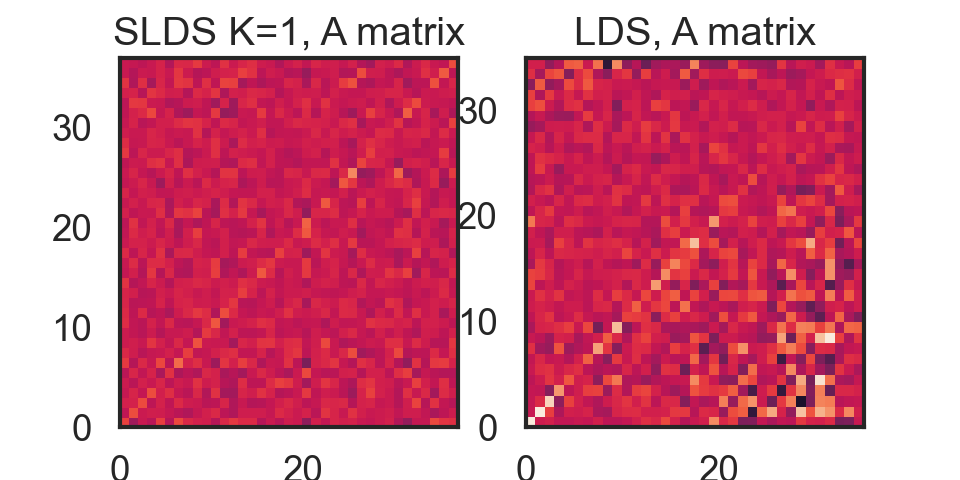

Text(0.5, 1.0, 'LDS, A matrix')

In [39]:

f, ax = plt.subplots(ncols = 2, figsize = (6, 3))

### Actually get LDS model too; 
ax[0].pcolormesh(SLDS.dynamics.As[0, :, :], vmin=-.5, vmax=.5)
ax[0].set_title('SLDS K=1, A matrix')

ax[1].pcolormesh(latent_A, vmin=-.5, vmax=.5)
ax[1].set_title('LDS, A matrix')

In [25]:
# A_aug = np.hstack((A, b[:, np.newaxis]))

# bot = np.zeros((1, len(A)+1))
# bot[-1] = 1;

# A_aug = np.vstack((A_aug, bot))

### eigenvalues ###
evs, evect = scipy.linalg.eig(A)
evs_lds, evect_lds = scipy.linalg.eig(latent_A)

In [26]:
def analyze_eigs(evs): 
    dt = .1
    td = -1/np.log(np.abs(evs))*dt; 
    hz = np.angle(evs)/(2*np.pi*dt)
    return td, hz

<IPython.core.display.Javascript object>


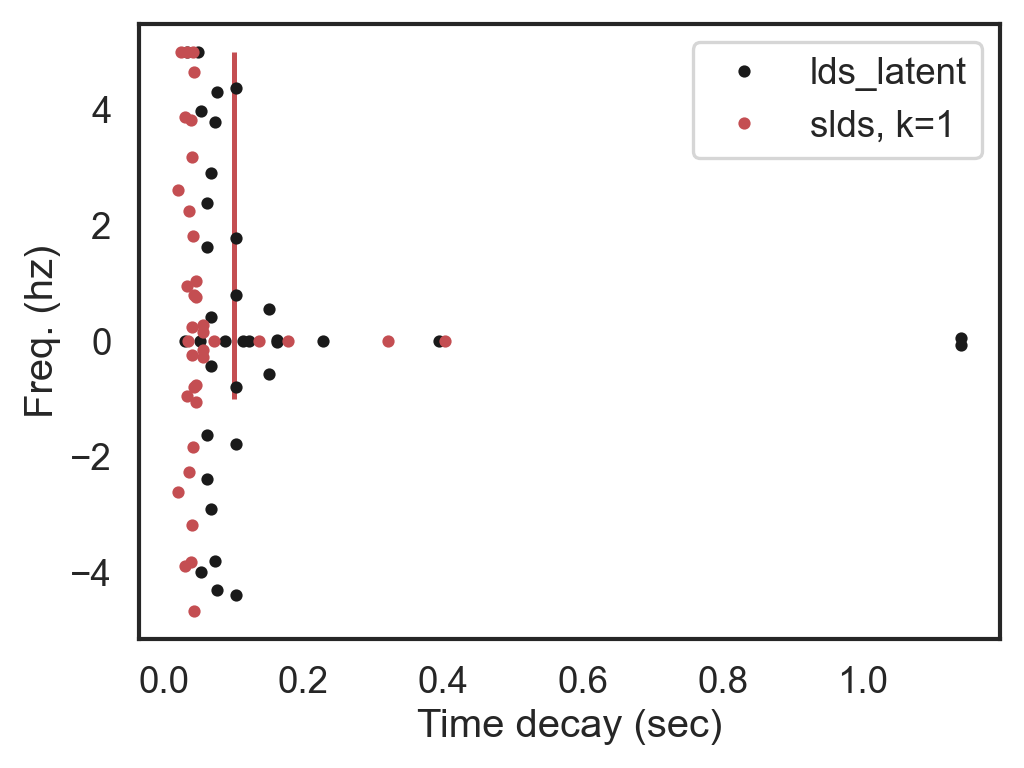

In [40]:
f, ax = plt.subplots()

## Plotting 
td, hz = analyze_eigs(evs_lds)
plt.plot(td, hz, 'k.', label='lds_latent')

td, hz = analyze_eigs(evs)
plt.plot(td, hz, 'r.', label='slds, k=1')


plt.xlabel('Time decay (sec)')
plt.ylabel('Freq. (hz)')
plt.vlines(.1, -1, 5, 'r')
plt.legend()
plt.tight_layout()

In [29]:
#mu = np.mean(true1, axis=0)

<IPython.core.display.Javascript object>


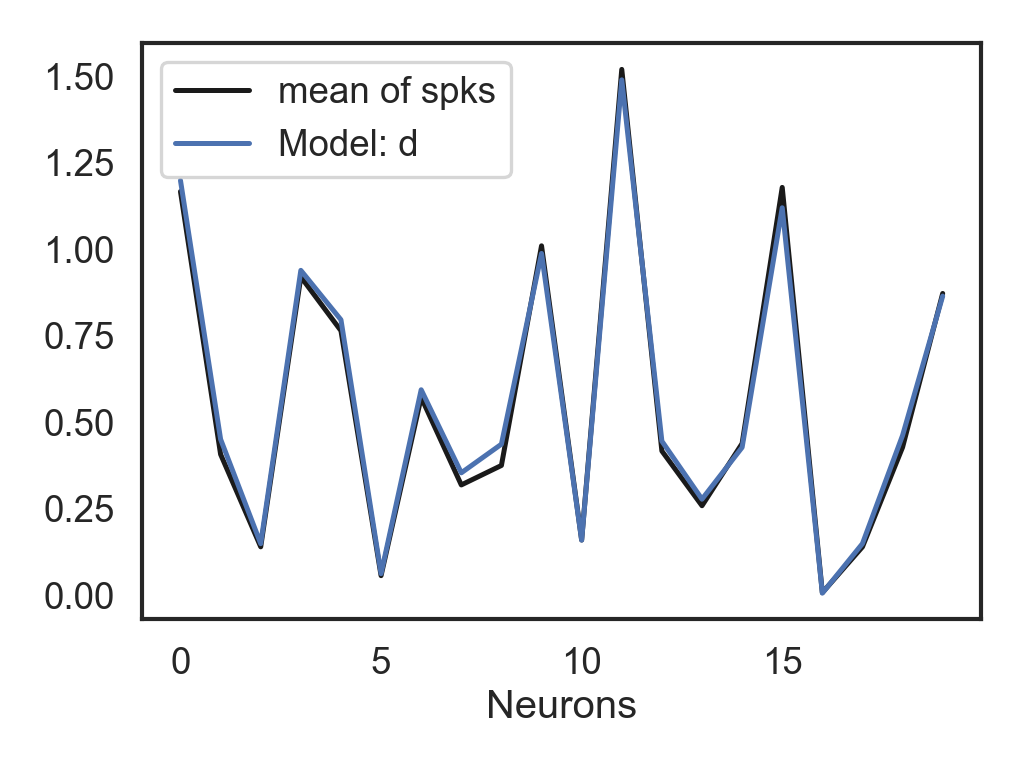

In [149]:
f,ax = plt.subplots()
plt.plot(mu, 'k-', label='mean of spks')
plt.plot(d[0, :], 'b-', label='Model: d')
plt.legend()
plt.xlabel('Neurons')
plt.tight_layout()

In [153]:
SLDS.dynamics.Sigmas.shape

(1, 19, 19)

<IPython.core.display.Javascript object>


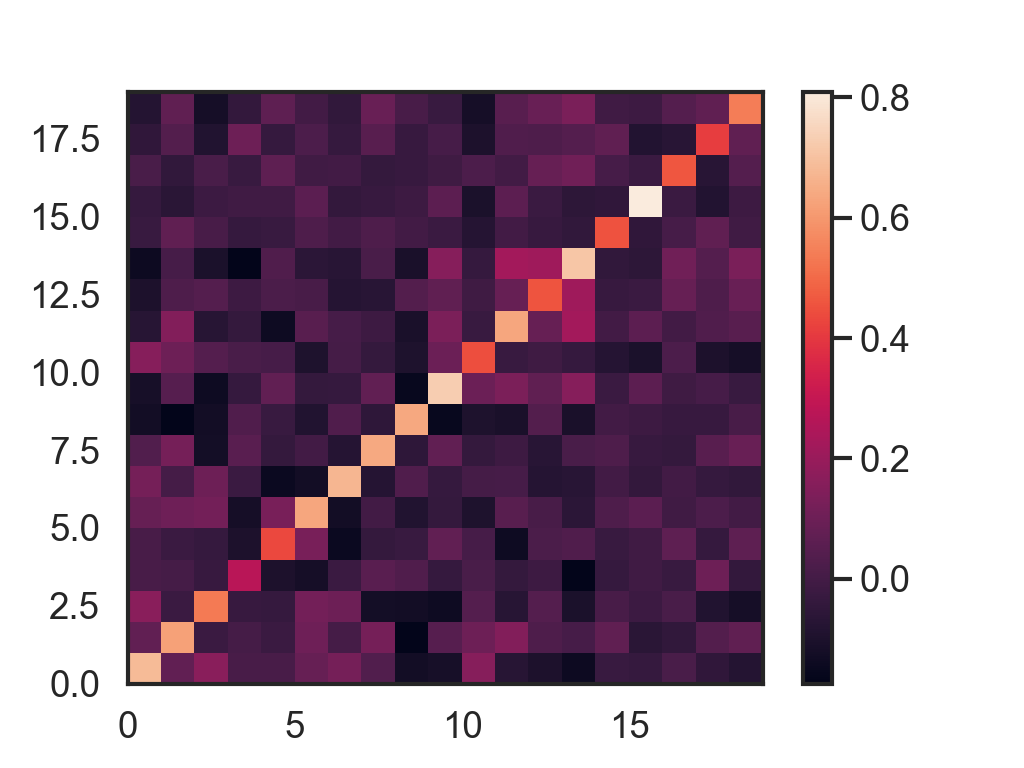

In [156]:
f, ax = plt.subplots()
plt.pcolormesh(SLDS.dynamics.Sigmas[0, :, :])
plt.colorbar()

In [157]:
# dimensionality of C

In [41]:
C = SLDS.emissions.Cs[0, :, :]
latent_C = latent_lds_dat[day_ix, model_nm, 0, 2, 'modelC']

In [42]:
latent_C.shape

(37, 35)

In [43]:
u, s, v = np.linalg.svd(C)
u_, s_, v_ = np.linalg.svd(latent_C)

<IPython.core.display.Javascript object>


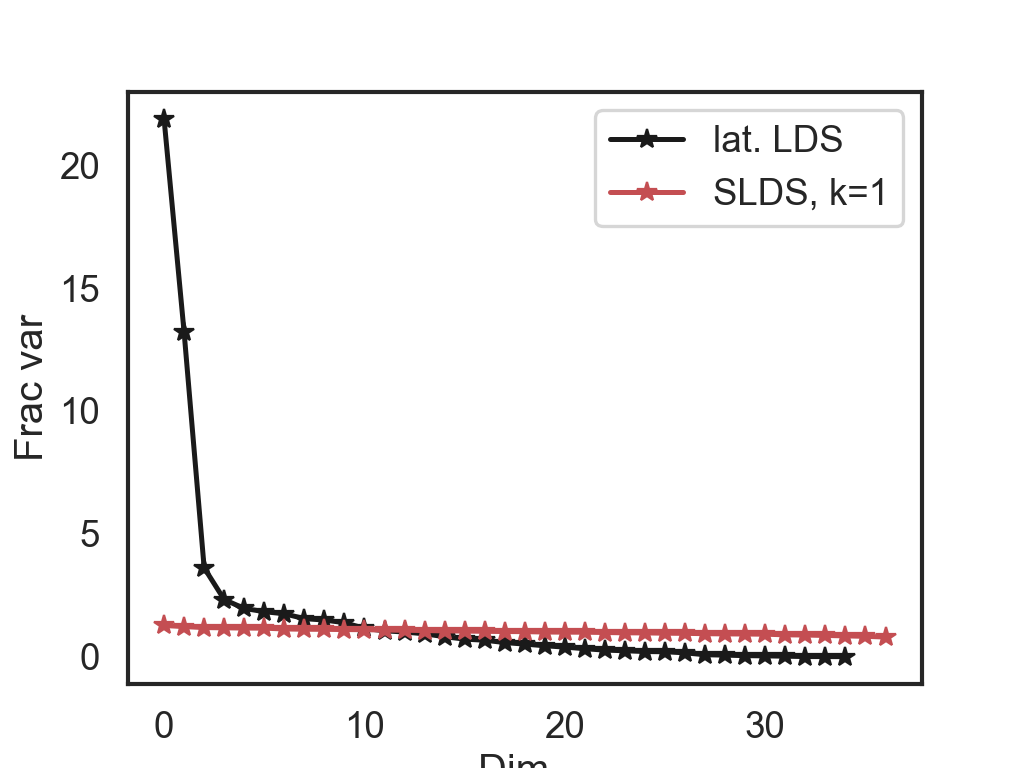

In [44]:
f, ax = plt.subplots()
plt.plot(s_**2, 'k*-', label='lat. LDS')
plt.plot(s**2, 'r*-', label='SLDS, k=1')
plt.xlabel('Dim. ')
plt.ylabel('Frac var')
plt.legend()

In [171]:
SLDS.transitions

In [226]:
### model fitting elbos b/w SLDS gaussian vs. other options; 


<IPython.core.display.Javascript object>


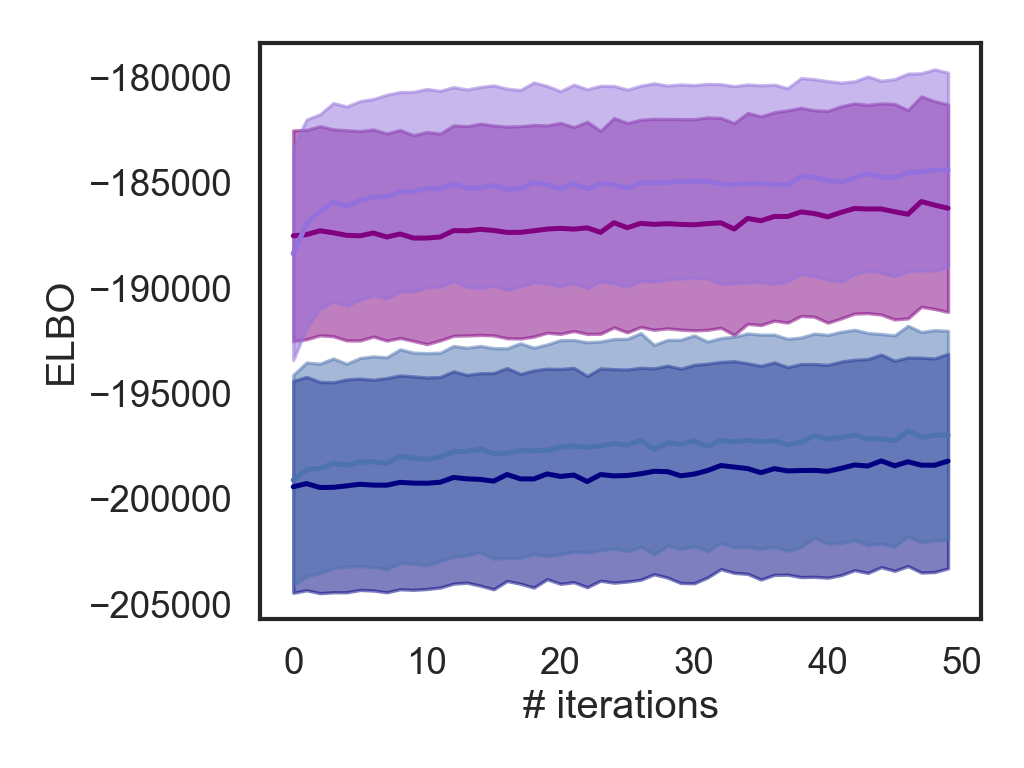

In [268]:
f, ax = plt.subplots()
colors = dict()

### OLD ### 
colors[1, 1] = 'purple'
colors[2, 1] = 'mediumpurple'

# colors[1, 2] = 'b'
# colors[2, 2] = 'lightblue'

### OLD # V1; 
colors[1, 2] = 'navy'
colors[2, 2] = 'b'
colors[5, 2] = 'lightblue'

#slds_dat_v1
#slds_dat_v1_mean_sub

for k in [1, 2]: 
    E = []; 
    E2 = []; 
    
    for i_fold in range(5): 
        
        E.append(slds_dat_v1['save_params_model'][i_fold, k, 50, .01, 'elbo'][1:])
        E2.append(slds_dat_v1_mean_sub['save_params_model'][i_fold, k, 50, .01, 'elbo'][1:])
        
    E = np.vstack((E))
    E2 = np.vstack((E2))
    
    for ie, e in enumerate([E, E2]):
        x = np.arange(E.shape[1])
        util_fcns.plot_mean_and_sem(x, e, ax, color=colors[k, ie+1], array_axis=0)
        
ax.set_xlabel('# iterations')
ax.set_ylabel('ELBO')
plt.tight_layout()

In [ ]:
#Run full SLDS statse; 

In [6]:
for animal in ['grom']:#'jeev', 'grom']: 
    x = np.arange(analysis_config.data_params['%s_ndays'%animal])
    y = [xi for xi in x if np.logical_and(xi > 2, xi != 4)]
    

In [8]:
y

[3, 5, 6, 7, 8]

########################################
########################################
########################################
########### STARTING grom, 3 ############
########################################
########################################
(64,) (64,) (29, 53) 6 (29,)
[0. 1. 2. 3. 4. 5. 6. 7.]
(64,) (64,) (29, 53) 6 (29,)
[0. 1. 2. 3. 4. 5. 6. 7.]
(64,) (64,) (29, 53) 6 (29,)
[0. 1. 2. 3. 4. 5. 6. 7.]
new trial offset 64, total trls in this blk 64


/Users/preeyakhanna/bmi_dynamics_code/online_analysis/generate_models_utils.py:400: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  tmp = np.array([np.zeros(( bin_spk[x].shape[0])) + ix + trl_off for ix, x in enumerate(ix_mod)])


(73,) (73,) (30, 53) 6 (30,)
[0. 1. 2. 3. 4. 5. 6. 7.]
(73,) (73,) (30, 53) 6 (30,)
[0. 1. 2. 3. 4. 5. 6. 7.]
(73,) (73,) (30, 53) 6 (30,)
[0. 1. 2. 3. 4. 5. 6. 7.]
new trial offset 137, total trls in this blk 73
(237,) (237,) (26, 53) 6 (26,)
[0. 1. 2. 3. 4. 5. 6. 7.]
(237,) (237,) (26, 53) 6 (26,)
[0. 1. 2. 3. 4. 5. 6. 7.]
(237,) (237,) (26, 53) 6 (26,)
[0. 1. 2. 3. 4. 5. 6. 7.]
new trial offset 374, total trls in this blk 237
(100,) (100,) (32, 53) 6 (32,)
[0. 1. 2. 3. 4. 5. 6. 7.]
(100,) (100,) (32, 53) 6 (32,)
[0. 1. 2. 3. 4. 5. 6. 7.]
(100,) (100,) (32, 53) 6 (32,)
[0. 1. 2. 3. 4. 5. 6. 7.]
new trial offset 474, total trls in this blk 100


/Users/preeyakhanna/conda/envs/mountainlab/lib/python3.6/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


<IPython.core.display.Javascript object>


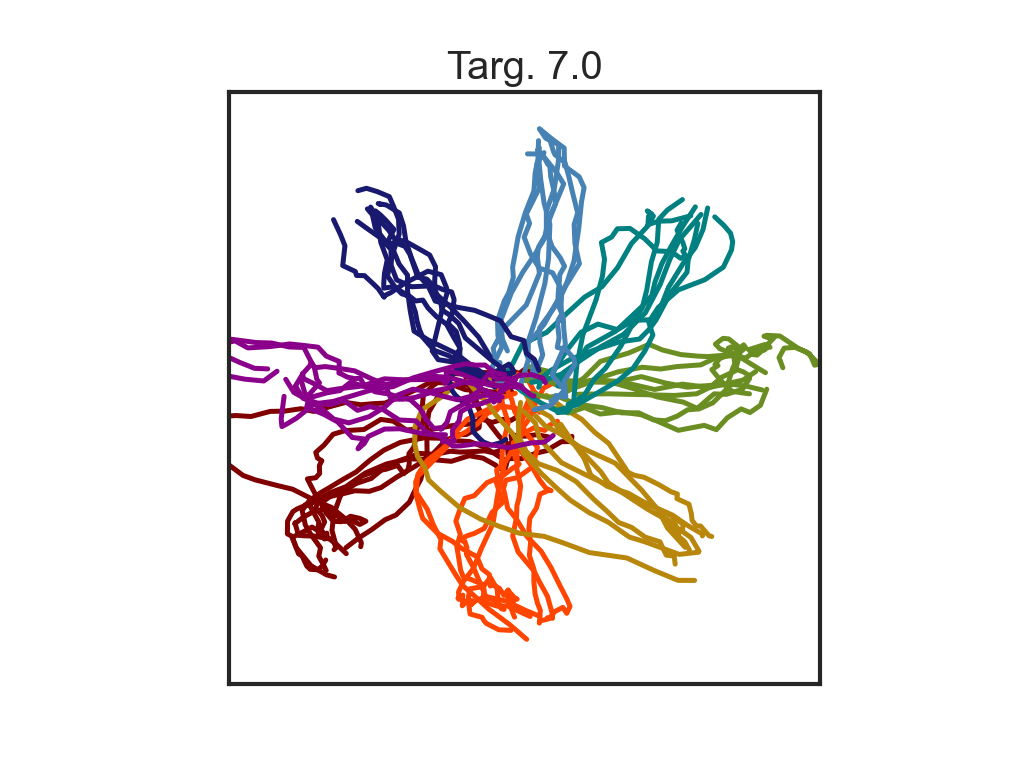

<IPython.core.display.Javascript object>


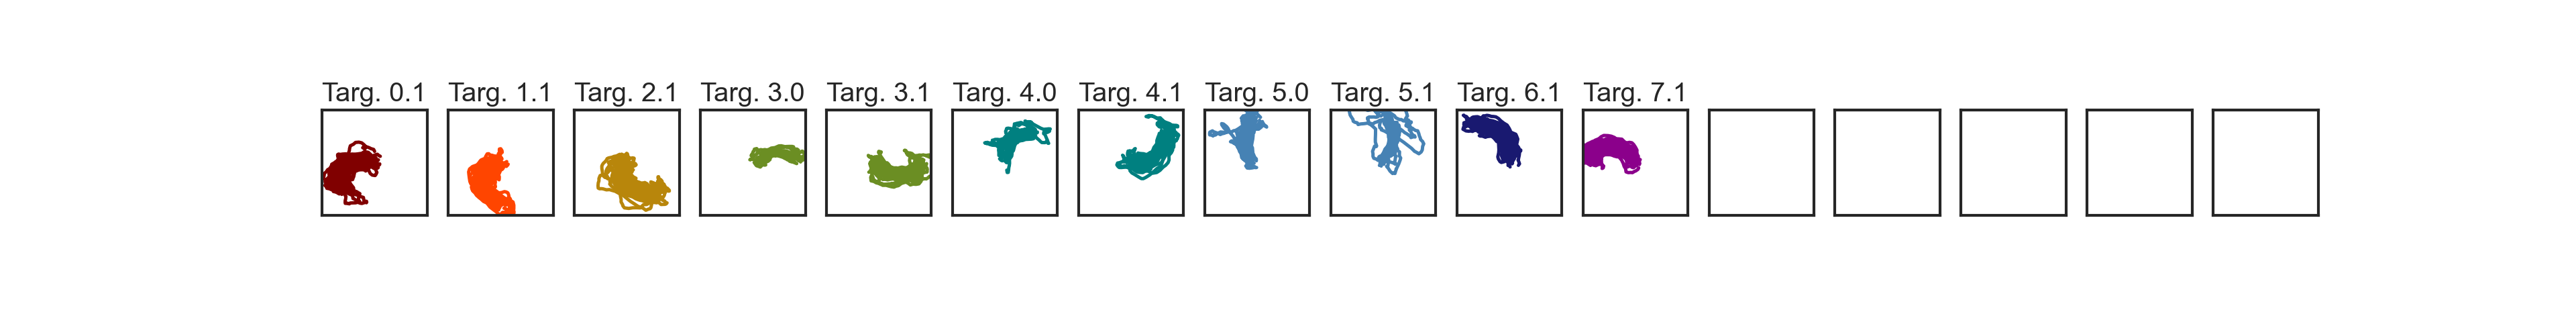

Animal grom, tsk 0, N = 1485
Tsk 0, Trg 0.00, N = 268
Tsk 0, Trg 1.00, N = 249
Tsk 0, Trg 2.00, N = 139
Tsk 0, Trg 3.00, N = 163
Tsk 0, Trg 4.00, N = 130
Tsk 0, Trg 5.00, N = 146
Tsk 0, Trg 6.00, N = 180
Tsk 0, Trg 7.00, N = 210
Animal grom, tsk 1, N = 13437
Tsk 1, Trg 0.10, N = 1971
Tsk 1, Trg 1.10, N = 2097
Tsk 1, Trg 2.10, N = 1608
Tsk 1, Trg 3.00, N = 391
Tsk 1, Trg 3.10, N = 1119
Tsk 1, Trg 4.00, N = 512
Tsk 1, Trg 4.10, N = 993
Tsk 1, Trg 5.00, N = 666
Tsk 1, Trg 5.10, N = 670
Tsk 1, Trg 6.10, N = 1502
Tsk 1, Trg 7.10, N = 1908
n spks in data 53
n spks in trls_train 53
training model ver 1


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

n spks in trls_train 53
training model ver 1


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

n spks in trls_train 53
training model ver 1


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

n spks in trls_train 53
training model ver 1


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

n spks in trls_train 53
training model ver 1


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

########################################
########################################
########################################
########### STARTING grom, 5 ############
########################################
########################################
(63,) (63,) (20, 42) 6 (20,)
[0. 1. 2. 3. 4. 5. 6. 7.]
(63,) (63,) (20, 42) 6 (20,)
[0. 1. 2. 3. 4. 5. 6. 7.]
(63,) (63,) (20, 42) 6 (20,)
[0. 1. 2. 3. 4. 5. 6. 7.]
new trial offset 63, total trls in this blk 63


/Users/preeyakhanna/bmi_dynamics_code/online_analysis/generate_models_utils.py:400: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  tmp = np.array([np.zeros(( bin_spk[x].shape[0])) + ix + trl_off for ix, x in enumerate(ix_mod)])


(64,) (64,) (12, 42) 6 (12,)
[0. 1. 2. 3. 4. 5. 6. 7.]
(64,) (64,) (12, 42) 6 (12,)
[0. 1. 2. 3. 4. 5. 6. 7.]
(64,) (64,) (12, 42) 6 (12,)
[0. 1. 2. 3. 4. 5. 6. 7.]
new trial offset 127, total trls in this blk 64
(97,) (97,) (32, 42) 6 (32,)
[0. 1. 2. 3. 4. 5. 6. 7.]
(97,) (97,) (32, 42) 6 (32,)
[0. 1. 2. 3. 4. 5. 6. 7.]
(97,) (97,) (32, 42) 6 (32,)
[0. 1. 2. 3. 4. 5. 6. 7.]
new trial offset 224, total trls in this blk 97
(174,) (174,) (38, 42) 6 (38,)
[0. 1. 2. 3. 4. 5. 6. 7.]
(174,) (174,) (38, 42) 6 (38,)
[0. 1. 2. 3. 4. 5. 6. 7.]
(174,) (174,) (38, 42) 6 (38,)
[0. 1. 2. 3. 4. 5. 6. 7.]
new trial offset 398, total trls in this blk 174


/Users/preeyakhanna/conda/envs/mountainlab/lib/python3.6/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


<IPython.core.display.Javascript object>


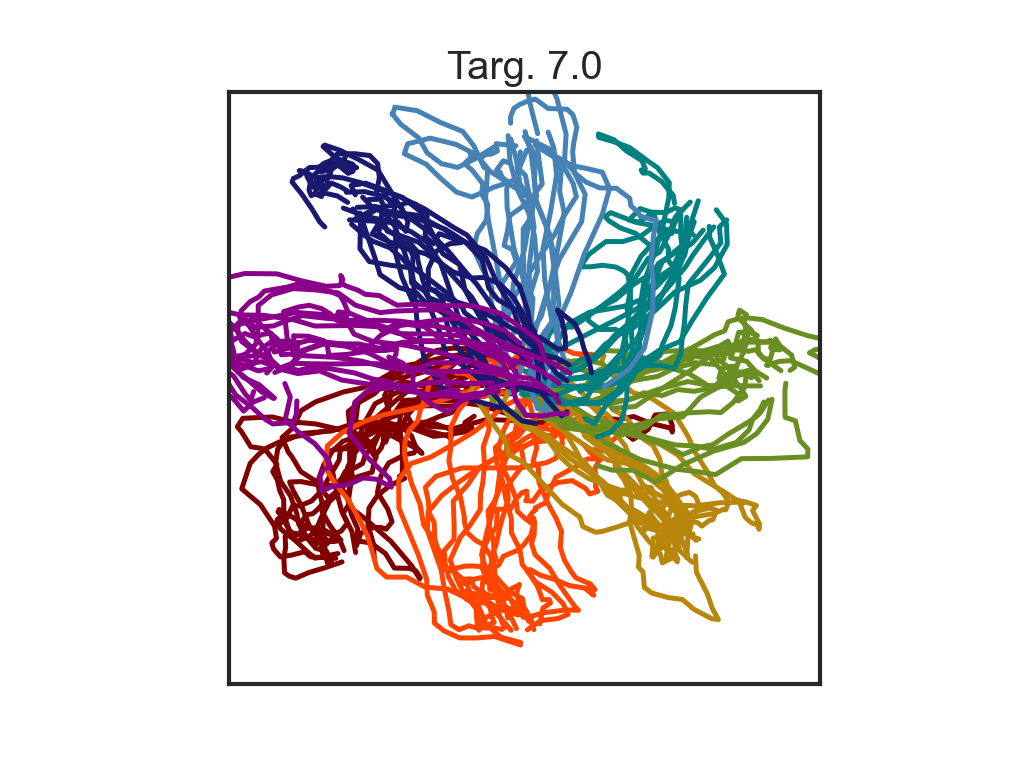

<IPython.core.display.Javascript object>


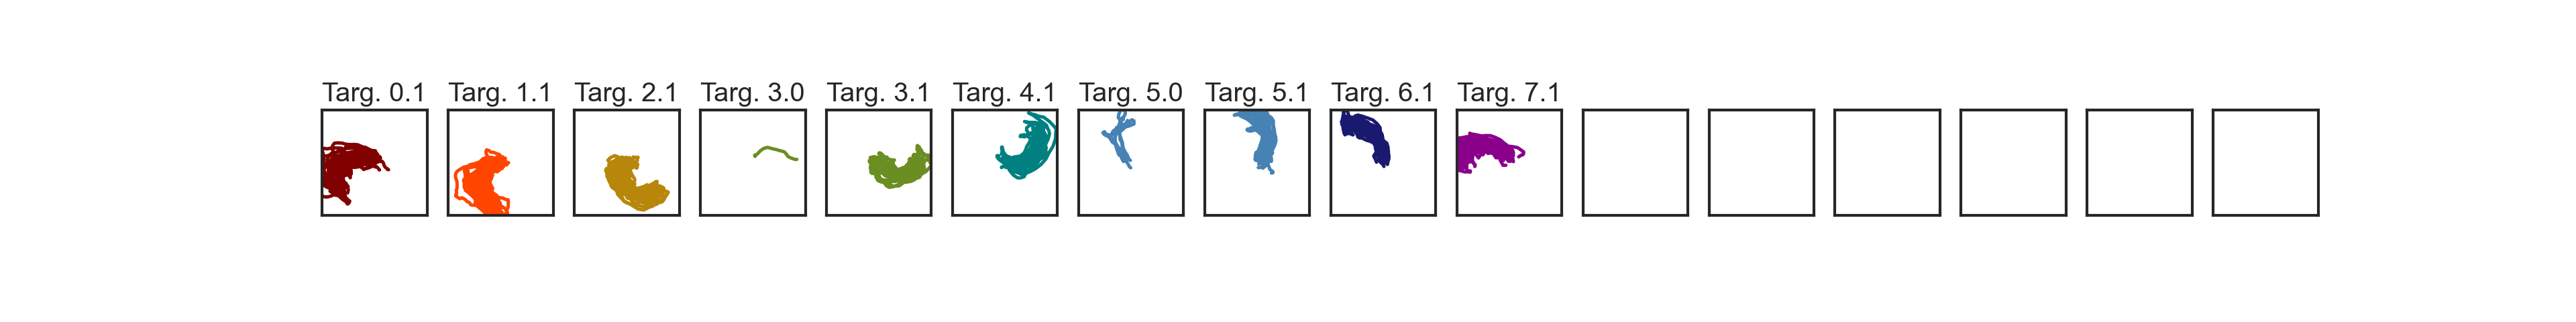

Animal grom, tsk 0, N = 2978
Tsk 0, Trg 0.00, N = 477
Tsk 0, Trg 1.00, N = 490
Tsk 0, Trg 2.00, N = 400
Tsk 0, Trg 3.00, N = 316
Tsk 0, Trg 4.00, N = 279
Tsk 0, Trg 5.00, N = 272
Tsk 0, Trg 6.00, N = 341
Tsk 0, Trg 7.00, N = 403
Animal grom, tsk 1, N = 7922
Tsk 1, Trg 0.10, N = 1224
Tsk 1, Trg 1.10, N = 1210
Tsk 1, Trg 2.10, N = 1131
Tsk 1, Trg 3.00, N = 20
Tsk 1, Trg 3.10, N = 1007
Tsk 1, Trg 4.10, N = 772
Tsk 1, Trg 5.00, N = 138
Tsk 1, Trg 5.10, N = 540
Tsk 1, Trg 6.10, N = 768
Tsk 1, Trg 7.10, N = 1112
n spks in data 42
n spks in trls_train 42
training model ver 1


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

n spks in trls_train 42
training model ver 1


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

n spks in trls_train 42
training model ver 1


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

n spks in trls_train 42
training model ver 1


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

n spks in trls_train 42
training model ver 1


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

########################################
########################################
########################################
########### STARTING grom, 6 ############
########################################
########################################
(63,) (63,) (18, 50) 6 (18,)
[0. 1. 2. 3. 4. 5. 6. 7.]
(63,) (63,) (18, 50) 6 (18,)
[0. 1. 2. 3. 4. 5. 6. 7.]
(63,) (63,) (18, 50) 6 (18,)
[0. 1. 2. 3. 4. 5. 6. 7.]
new trial offset 63, total trls in this blk 63


/Users/preeyakhanna/bmi_dynamics_code/online_analysis/generate_models_utils.py:400: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  tmp = np.array([np.zeros(( bin_spk[x].shape[0])) + ix + trl_off for ix, x in enumerate(ix_mod)])


(29,) (29,) (31, 50) 6 (31,)
[0. 1. 2. 3. 4. 5. 6. 7.]
(29,) (29,) (31, 50) 6 (31,)
[0. 1. 2. 3. 4. 5. 6. 7.]
(29,) (29,) (31, 50) 6 (31,)
[0. 1. 2. 3. 4. 5. 6. 7.]
new trial offset 92, total trls in this blk 29
(64,) (64,) (47, 50) 6 (47,)
[0. 1. 2. 3. 4. 5. 6. 7.]
(64,) (64,) (47, 50) 6 (47,)
[0. 1. 2. 3. 4. 5. 6. 7.]
(64,) (64,) (47, 50) 6 (47,)
[0. 1. 2. 3. 4. 5. 6. 7.]
new trial offset 156, total trls in this blk 64


/Users/preeyakhanna/conda/envs/mountainlab/lib/python3.6/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


<IPython.core.display.Javascript object>


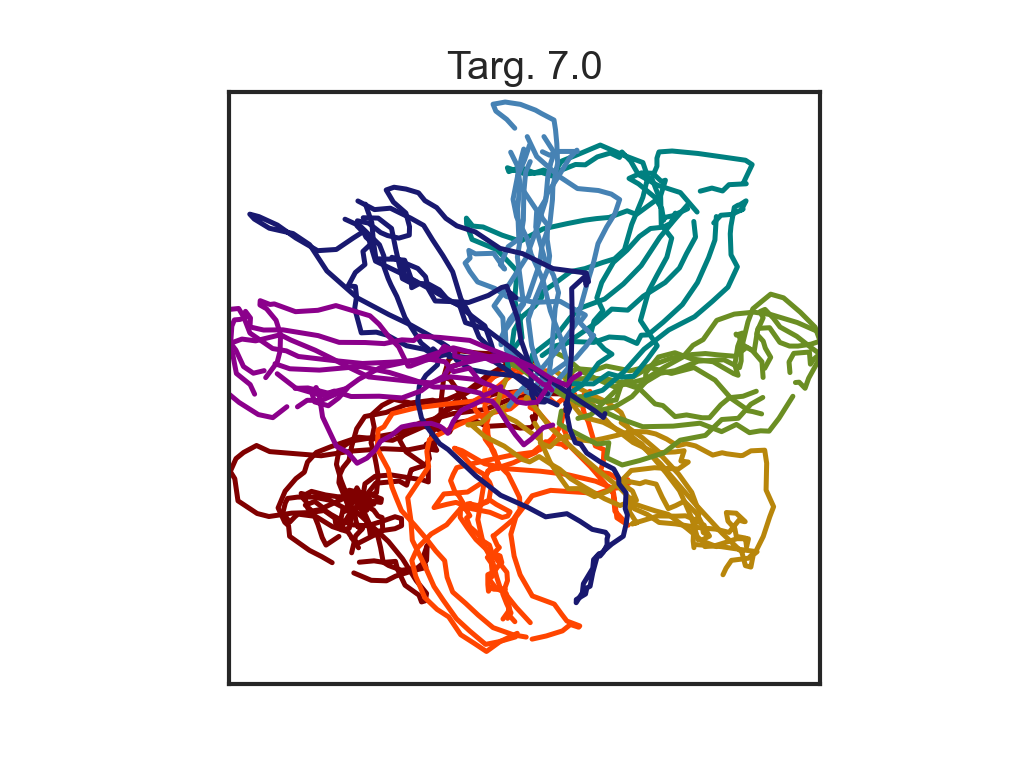

<IPython.core.display.Javascript object>


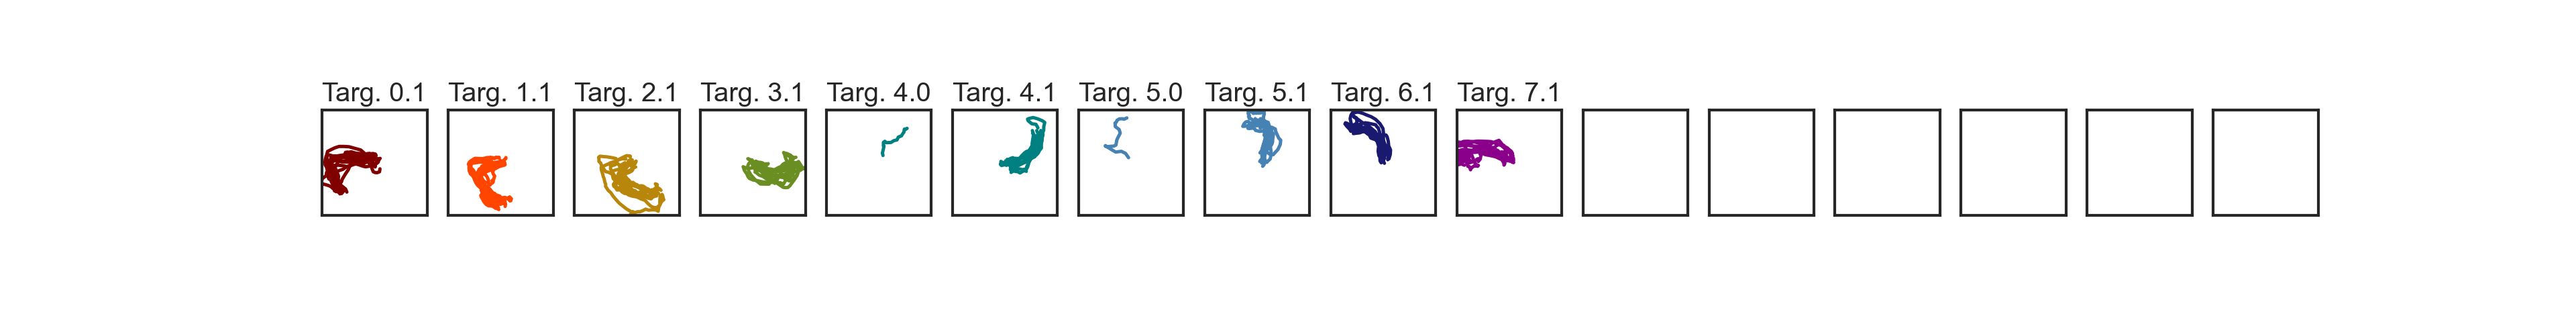

Animal grom, tsk 0, N = 1711
Tsk 0, Trg 0.00, N = 312
Tsk 0, Trg 1.00, N = 274
Tsk 0, Trg 2.00, N = 191
Tsk 0, Trg 3.00, N = 186
Tsk 0, Trg 4.00, N = 183
Tsk 0, Trg 5.00, N = 140
Tsk 0, Trg 6.00, N = 229
Tsk 0, Trg 7.00, N = 196
Animal grom, tsk 1, N = 2513
Tsk 1, Trg 0.10, N = 368
Tsk 1, Trg 1.10, N = 360
Tsk 1, Trg 2.10, N = 378
Tsk 1, Trg 3.10, N = 329
Tsk 1, Trg 4.00, N = 18
Tsk 1, Trg 4.10, N = 224
Tsk 1, Trg 5.00, N = 29
Tsk 1, Trg 5.10, N = 224
Tsk 1, Trg 6.10, N = 233
Tsk 1, Trg 7.10, N = 350
n spks in data 50
n spks in trls_train 50
training model ver 1


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

n spks in trls_train 50
training model ver 1


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

n spks in trls_train 50
training model ver 1


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

n spks in trls_train 50
training model ver 1


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

n spks in trls_train 50
training model ver 1


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

########################################
########################################
########################################
########### STARTING grom, 7 ############
########################################
########################################
(64,) (64,) (35, 48) 6 (35,)
[0. 1. 2. 3. 4. 5. 6. 7.]
(64,) (64,) (35, 48) 6 (35,)
[0. 1. 2. 3. 4. 5. 6. 7.]
(64,) (64,) (35, 48) 6 (35,)
[0. 1. 2. 3. 4. 5. 6. 7.]
new trial offset 64, total trls in this blk 64


/Users/preeyakhanna/bmi_dynamics_code/online_analysis/generate_models_utils.py:400: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  tmp = np.array([np.zeros(( bin_spk[x].shape[0])) + ix + trl_off for ix, x in enumerate(ix_mod)])


(100,) (100,) (48, 48) 6 (48,)
[0. 1. 2. 3. 4. 5. 6. 7.]
(100,) (100,) (48, 48) 6 (48,)
[0. 1. 2. 3. 4. 5. 6. 7.]
(100,) (100,) (48, 48) 6 (48,)
[0. 1. 2. 3. 4. 5. 6. 7.]
new trial offset 164, total trls in this blk 100


/Users/preeyakhanna/conda/envs/mountainlab/lib/python3.6/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


<IPython.core.display.Javascript object>


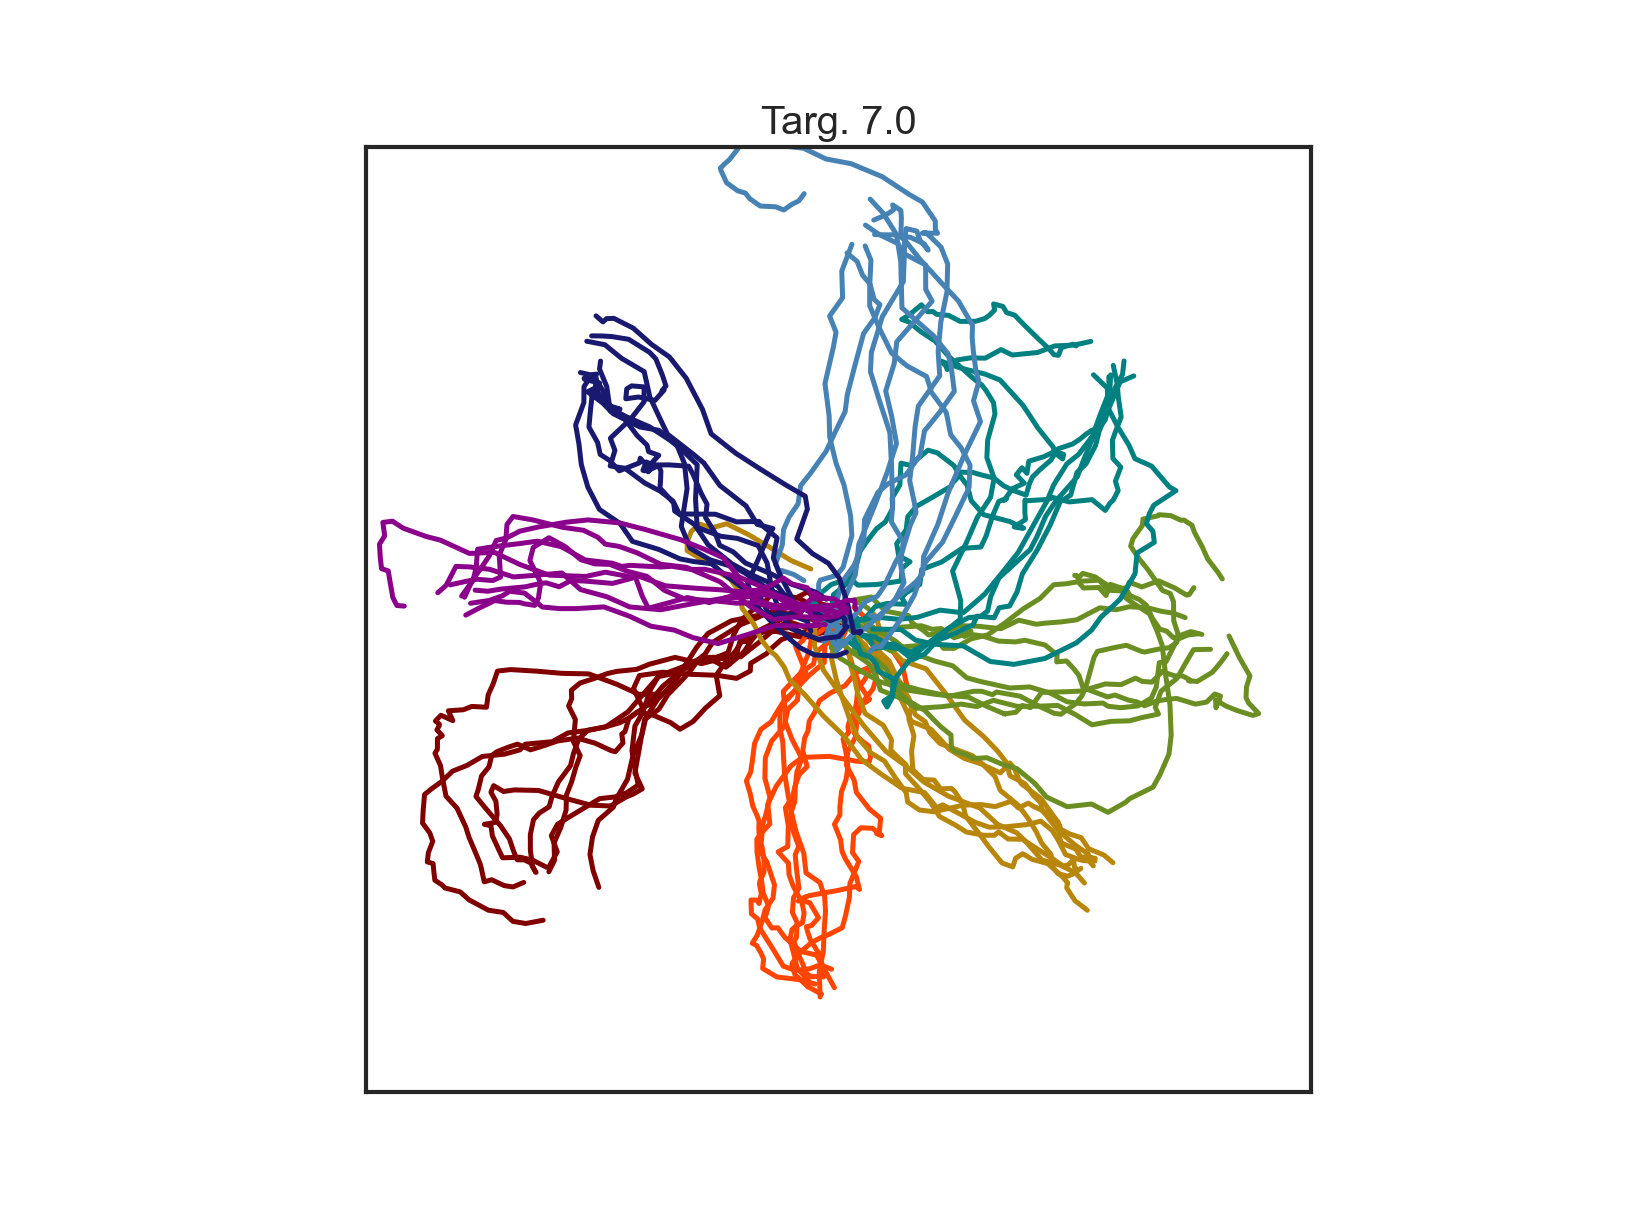

<IPython.core.display.Javascript object>


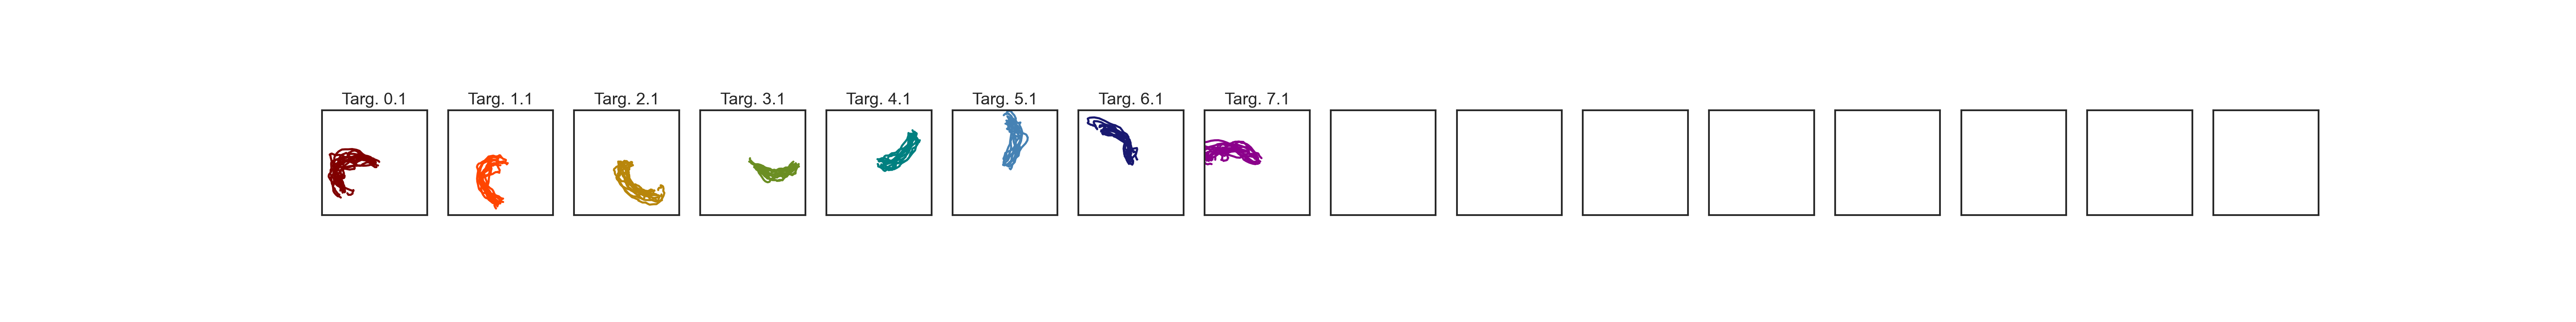

Animal grom, tsk 0, N = 2094
Tsk 0, Trg 0.00, N = 307
Tsk 0, Trg 1.00, N = 296
Tsk 0, Trg 2.00, N = 232
Tsk 0, Trg 3.00, N = 302
Tsk 0, Trg 4.00, N = 307
Tsk 0, Trg 5.00, N = 230
Tsk 0, Trg 6.00, N = 216
Tsk 0, Trg 7.00, N = 204
Animal grom, tsk 1, N = 3270
Tsk 1, Trg 0.10, N = 544
Tsk 1, Trg 1.10, N = 483
Tsk 1, Trg 2.10, N = 453
Tsk 1, Trg 3.10, N = 295
Tsk 1, Trg 4.10, N = 350
Tsk 1, Trg 5.10, N = 355
Tsk 1, Trg 6.10, N = 338
Tsk 1, Trg 7.10, N = 452
n spks in data 48
n spks in trls_train 48
training model ver 1


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

n spks in trls_train 48
training model ver 1


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

n spks in trls_train 48
training model ver 1


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

n spks in trls_train 48
training model ver 1


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

n spks in trls_train 48
training model ver 1


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

########################################
########################################
########################################
########### STARTING grom, 8 ############
########################################
########################################
(64,) (64,) (36, 48) 6 (36,)
[0. 1. 2. 3. 4. 5. 6. 7.]
(64,) (64,) (36, 48) 6 (36,)
[0. 1. 2. 3. 4. 5. 6. 7.]
(64,) (64,) (36, 48) 6 (36,)
[0. 1. 2. 3. 4. 5. 6. 7.]
new trial offset 64, total trls in this blk 64


/Users/preeyakhanna/bmi_dynamics_code/online_analysis/generate_models_utils.py:400: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  tmp = np.array([np.zeros(( bin_spk[x].shape[0])) + ix + trl_off for ix, x in enumerate(ix_mod)])


(75,) (75,) (32, 48) 6 (32,)
[0. 1. 2. 3. 4. 5. 6. 7.]
(75,) (75,) (32, 48) 6 (32,)
[0. 1. 2. 3. 4. 5. 6. 7.]
(75,) (75,) (32, 48) 6 (32,)
[0. 1. 2. 3. 4. 5. 6. 7.]
new trial offset 139, total trls in this blk 75


/Users/preeyakhanna/conda/envs/mountainlab/lib/python3.6/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


<IPython.core.display.Javascript object>


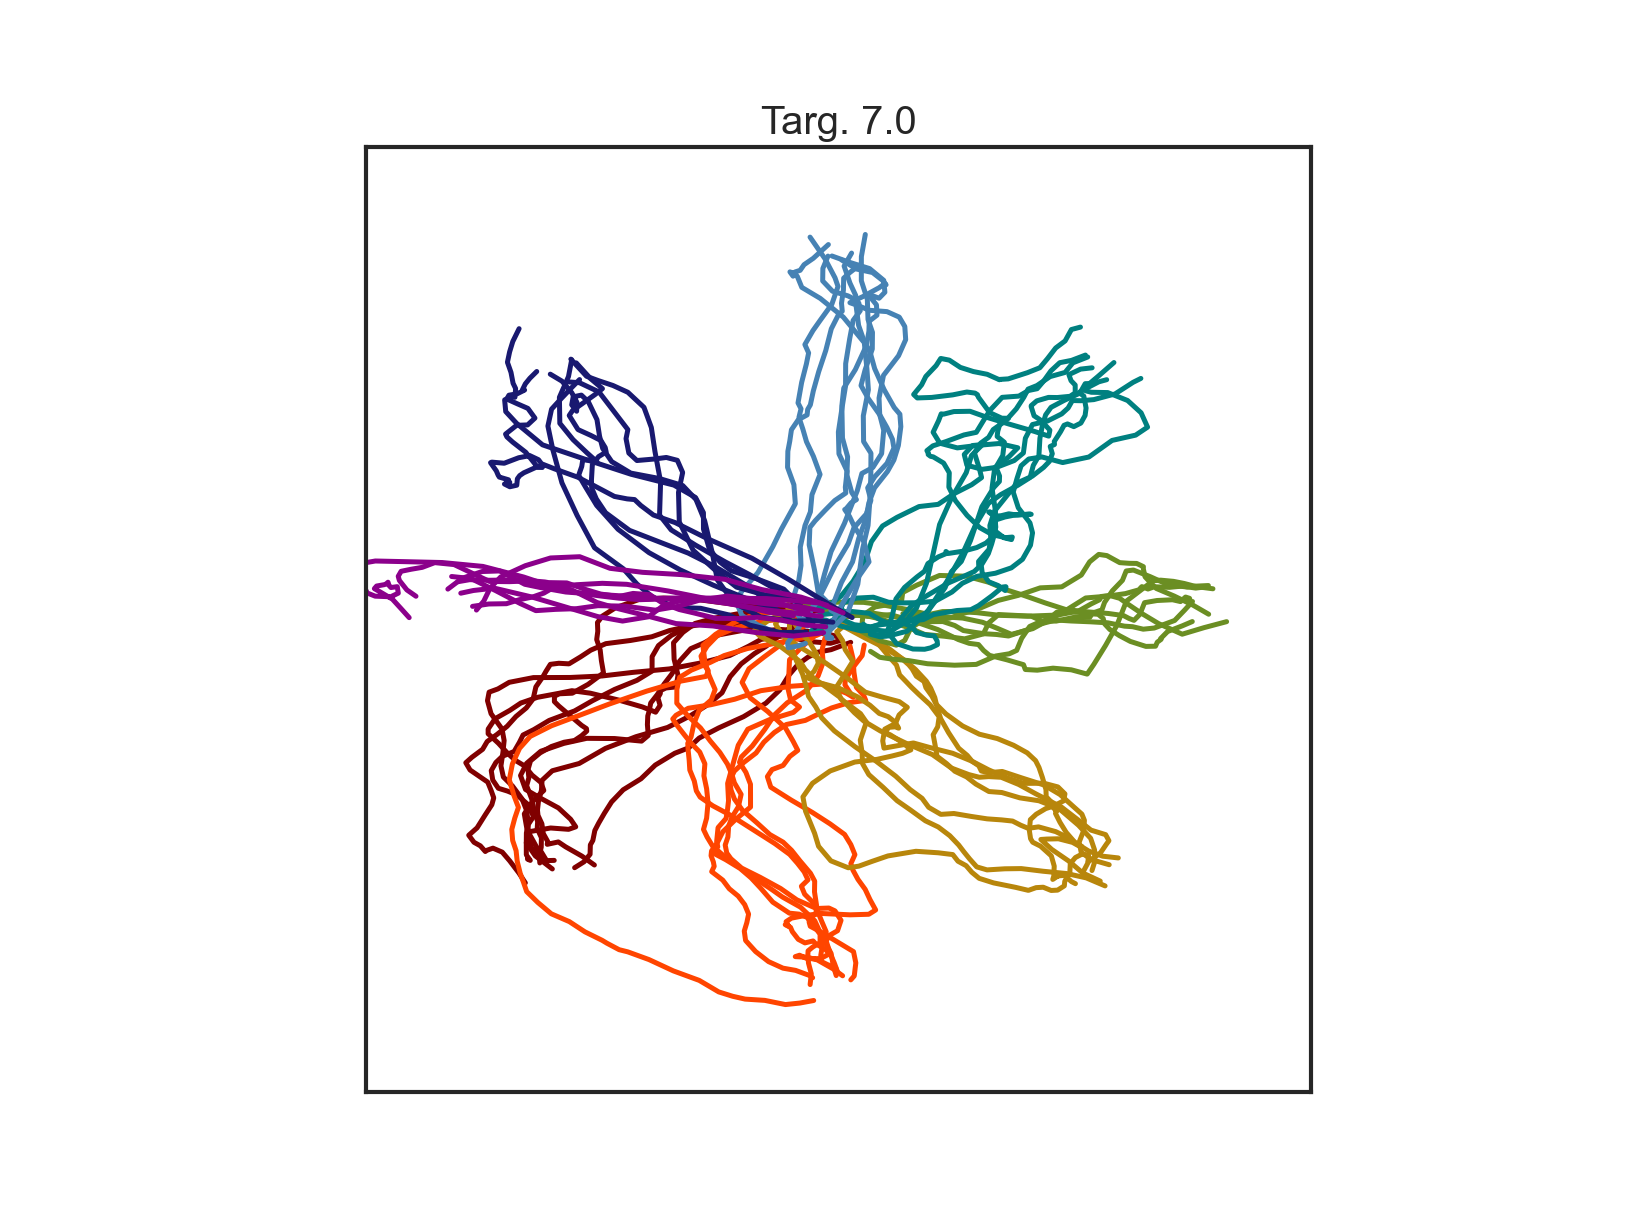

<IPython.core.display.Javascript object>


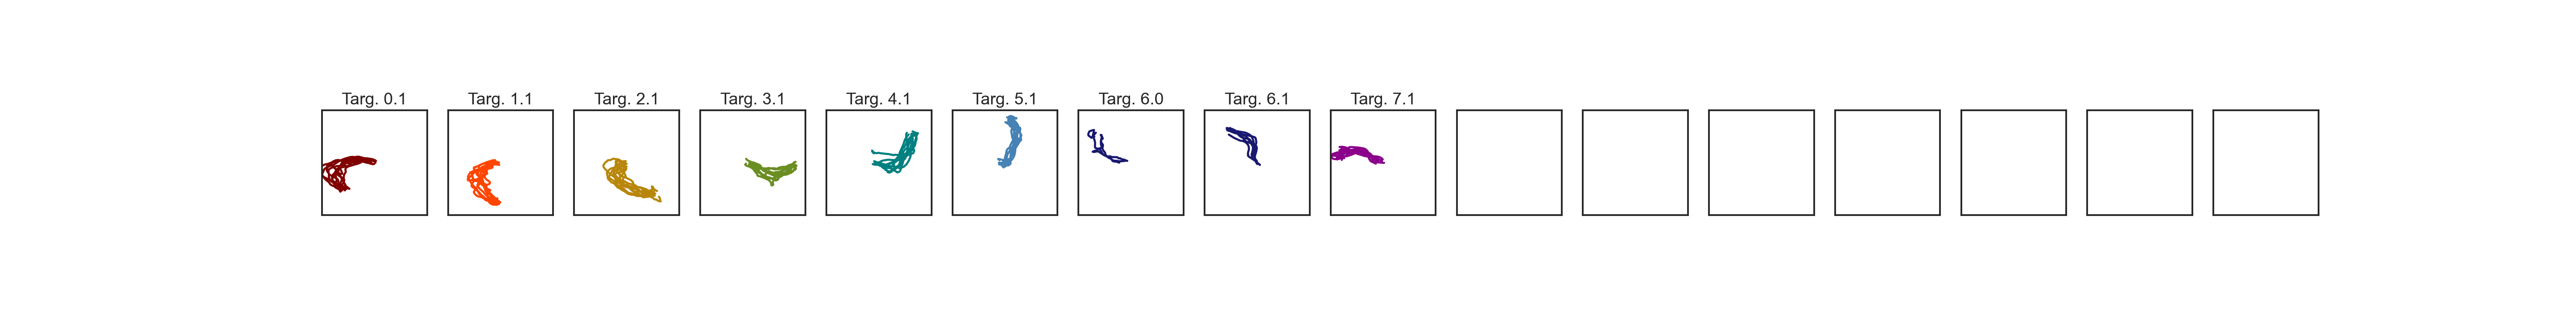

Animal grom, tsk 0, N = 2137
Tsk 0, Trg 0.00, N = 288
Tsk 0, Trg 1.00, N = 341
Tsk 0, Trg 2.00, N = 323
Tsk 0, Trg 3.00, N = 224
Tsk 0, Trg 4.00, N = 364
Tsk 0, Trg 5.00, N = 231
Tsk 0, Trg 6.00, N = 205
Tsk 0, Trg 7.00, N = 161
Animal grom, tsk 1, N = 2997
Tsk 1, Trg 0.10, N = 411
Tsk 1, Trg 1.10, N = 457
Tsk 1, Trg 2.10, N = 491
Tsk 1, Trg 3.10, N = 386
Tsk 1, Trg 4.10, N = 355
Tsk 1, Trg 5.10, N = 344
Tsk 1, Trg 6.00, N = 118
Tsk 1, Trg 6.10, N = 154
Tsk 1, Trg 7.10, N = 281
n spks in data 48
n spks in trls_train 48
training model ver 1


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

n spks in trls_train 48
training model ver 1


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

n spks in trls_train 48
training model ver 1


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

n spks in trls_train 48
training model ver 1


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

n spks in trls_train 48
training model ver 1


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

training model ver 1


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [9]:
for animal in ['grom']:#'jeev', 'grom']: 
    x = np.arange(analysis_config.data_params['%s_ndays'%animal])
    y = [xi for xi in x if np.logical_and(xi > 2, xi != 4)]
    
    for day in y: 

        ## Runnign with 10 model fitting iterations for speed; 
        print('########################################')
        print('########################################')
        print('########################################')
        print('########### STARTING %s, %d ############'%(animal, day))
        print('########################################')
        print('########################################')
        generate_models.sweep_slds_params(animal, day)